## IMPORTING THE NECESSARY LIBRARIES AND LOADING THE DATASET:-

In [137]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [138]:
df=pd.read_csv('big_mart_training_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


there are 8523 rows and 12 columns.

this is a regression task to predict the sales.

EXPLORATORY DATA  ANALYSIS:-- EXPLORATORY DATA ANALYSIS INVOLVES THE FOLLOWING PROCESS:-

1.READ THE DATA

2.VARIABLE IDENTIFICATION

3.UNIVARIATE ANALYSIS

4.BIVARIATE ANLAYSIS

5.DETECTING OUTLIERS/ANOMALY DETECTION

6.HANDLING /REMOVING NULL VALUES

7.HANDLING CATEGORICAL VARIABLES

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


THERE ARE MISSING VALUES IN THE 'ITEM_WEIGHT' AND 'OUTLET_SIZE' COLUMNS.

THERE ARE 4 FLOAT DATATYPE COLUMNS,1 INTEGER DATATYPE AND 7 OBJECT DATATYPE COLUMNS IN THE TRAINING DATASET.

In [140]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


There are numerous statistics for each column in the whole dataset;They tells us about the important information regarding the dataset

1.min--minimum value.

2.max--maximum value.

3.std--standard deviation from the mean.

4.25%--the 25th percentile.

5.mean--average for each column.

6.50%--median or the 50th percentile for each column.

7.75%--75th percentile.

8.count-- it shows the total number of counts for each column.

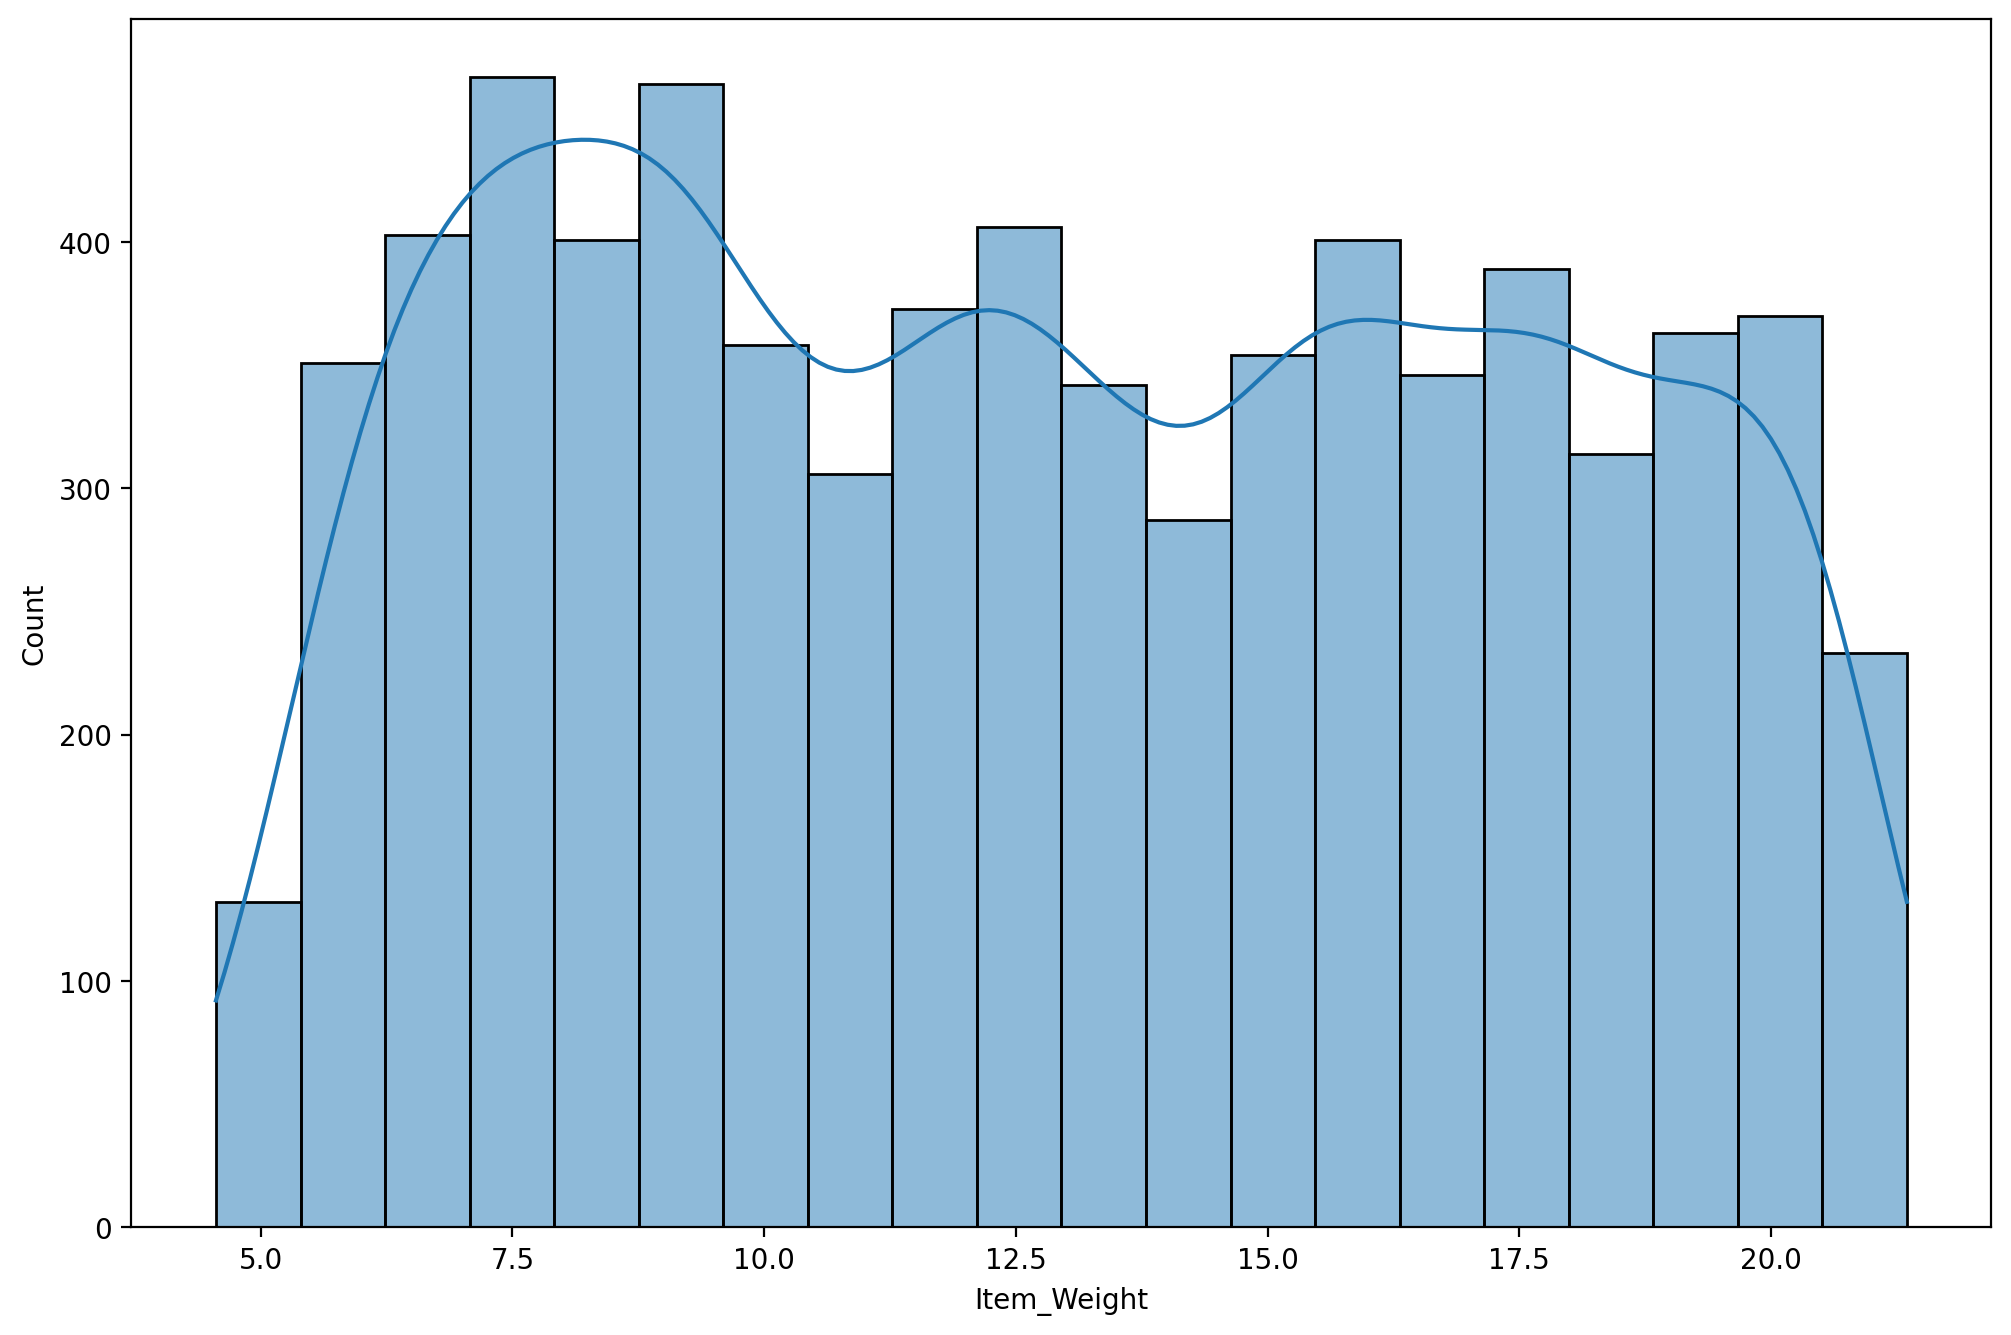

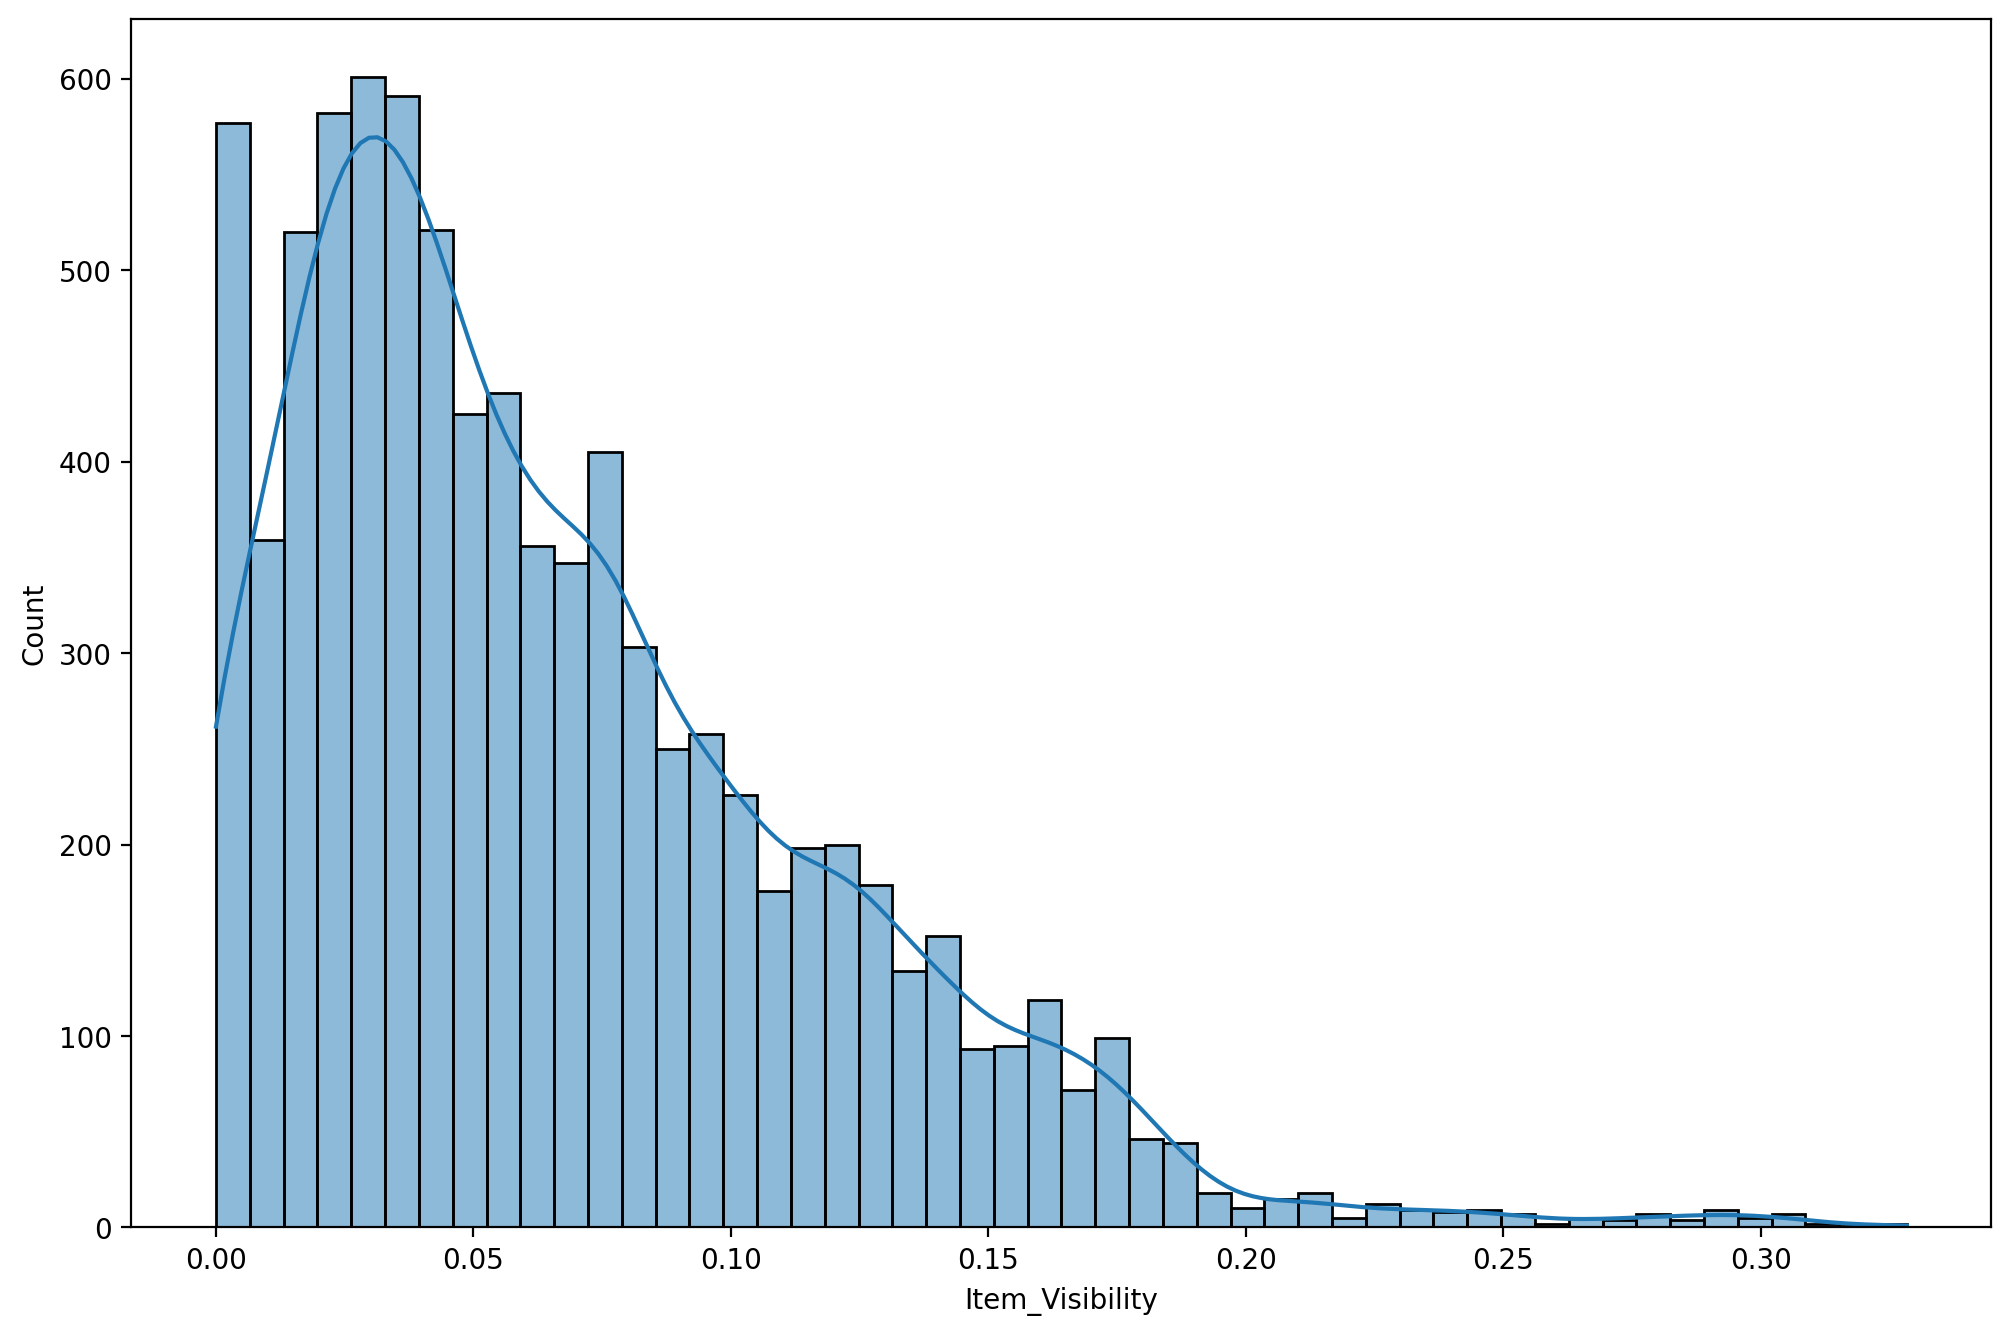

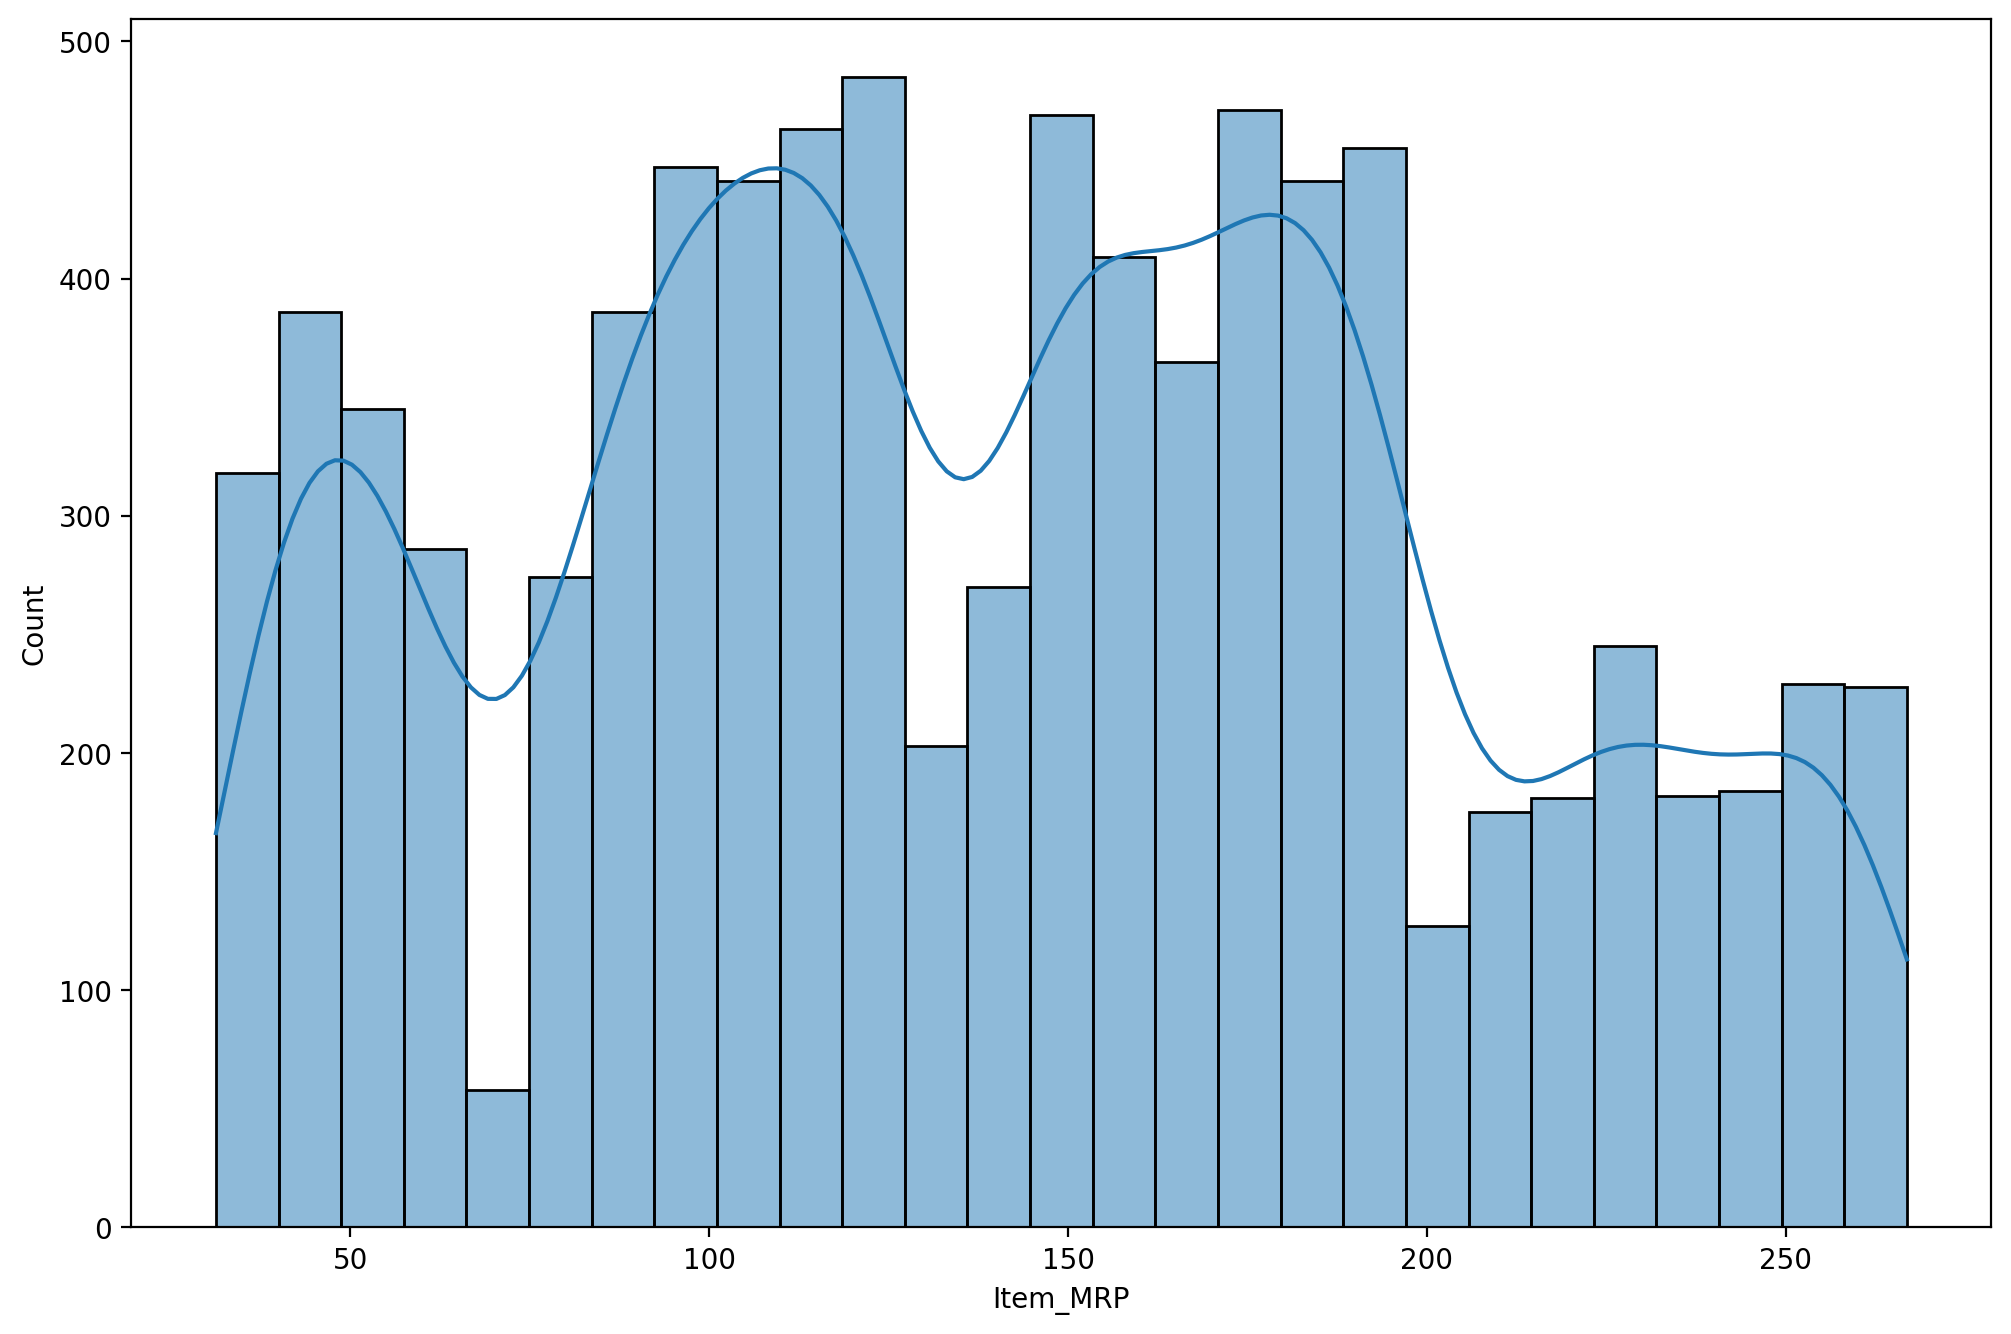

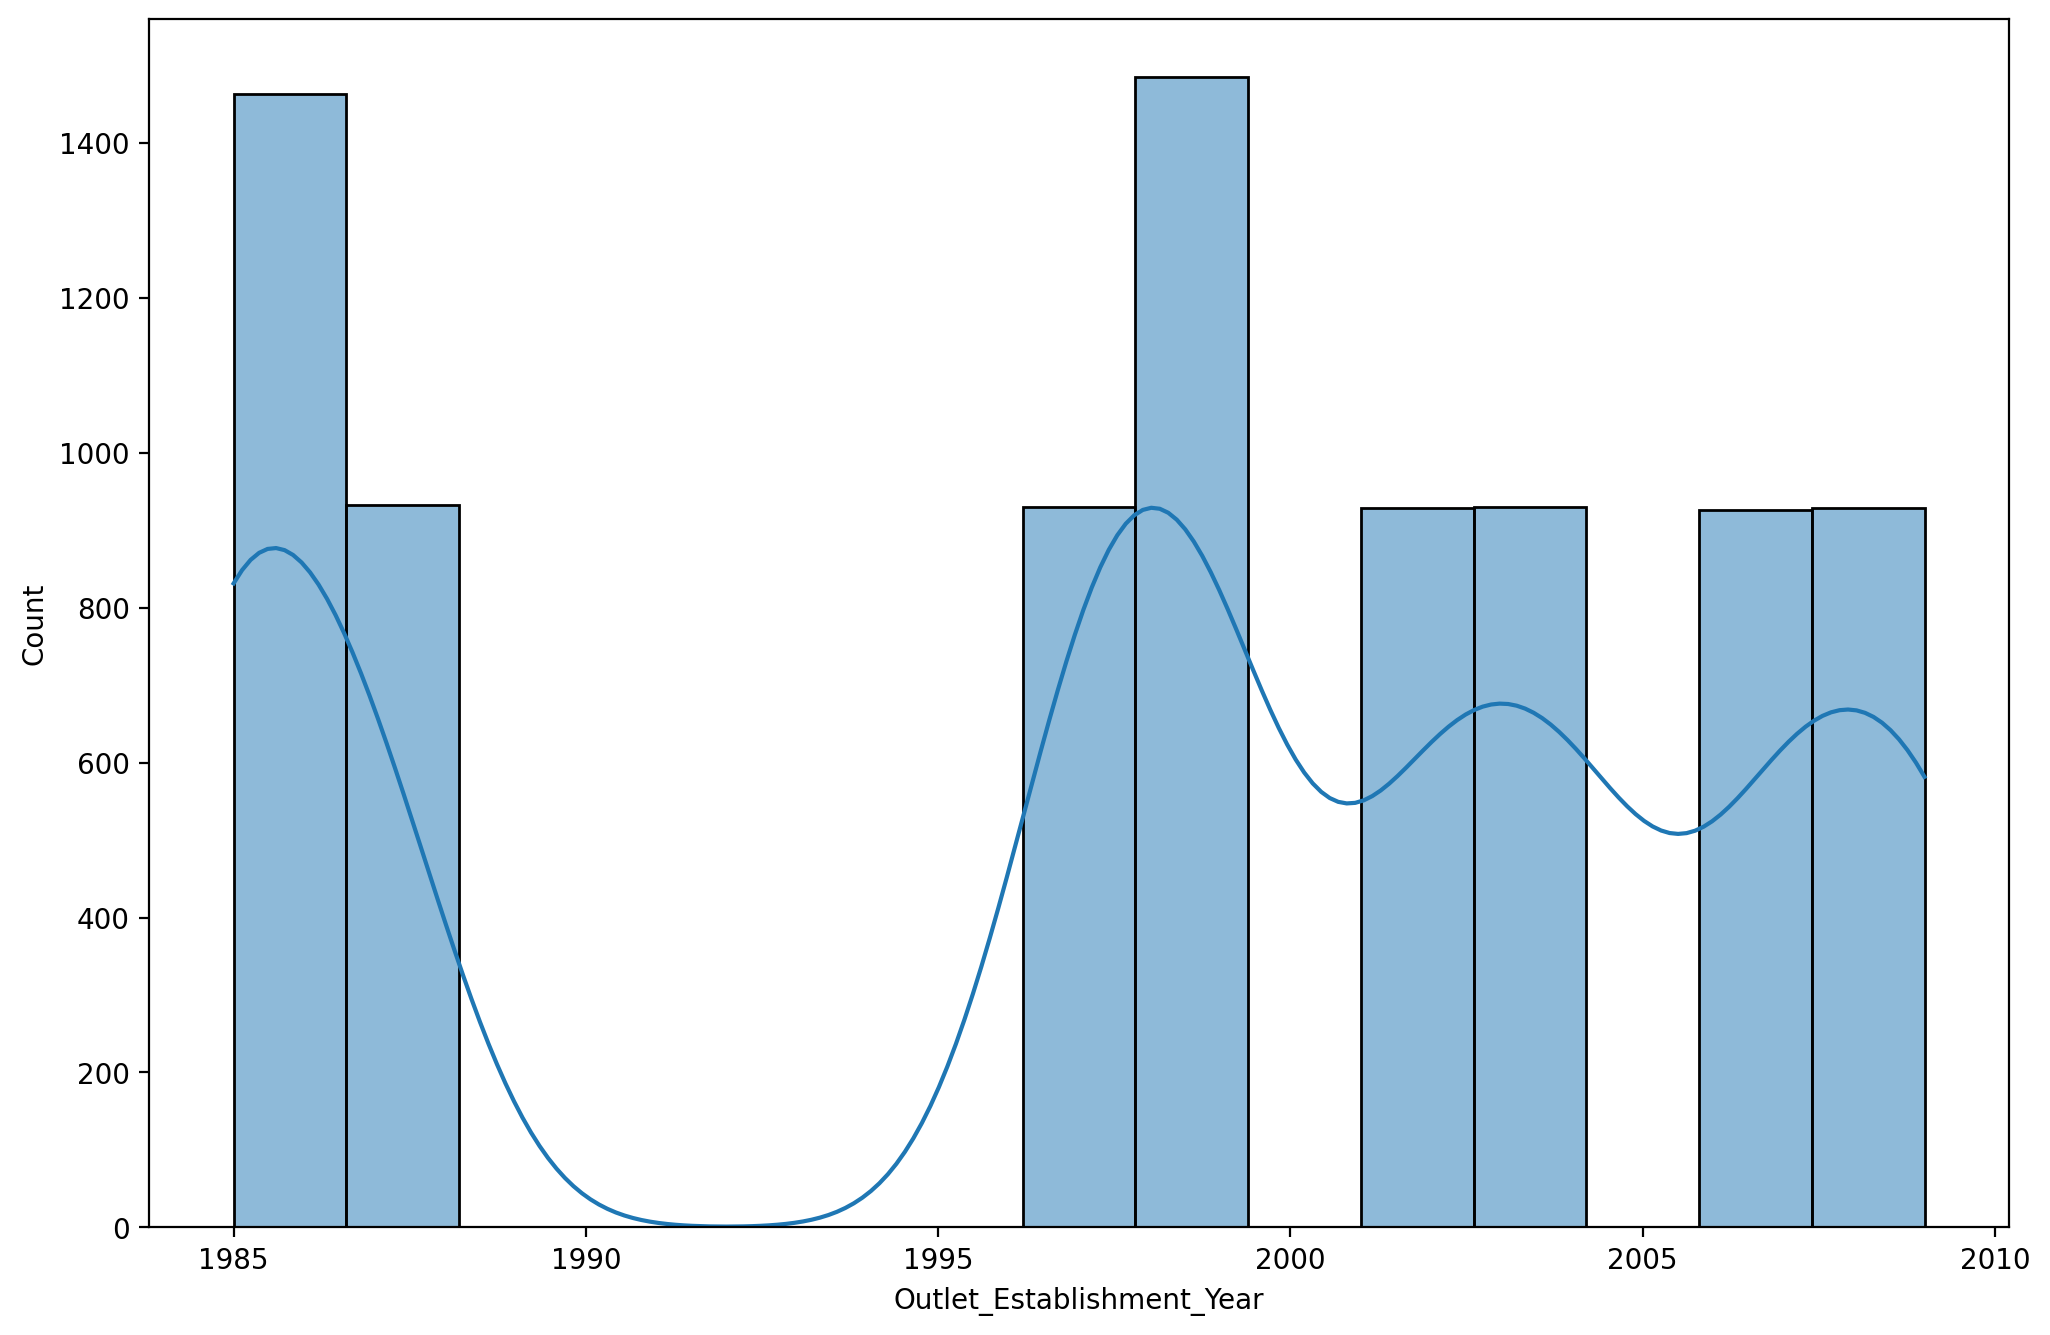

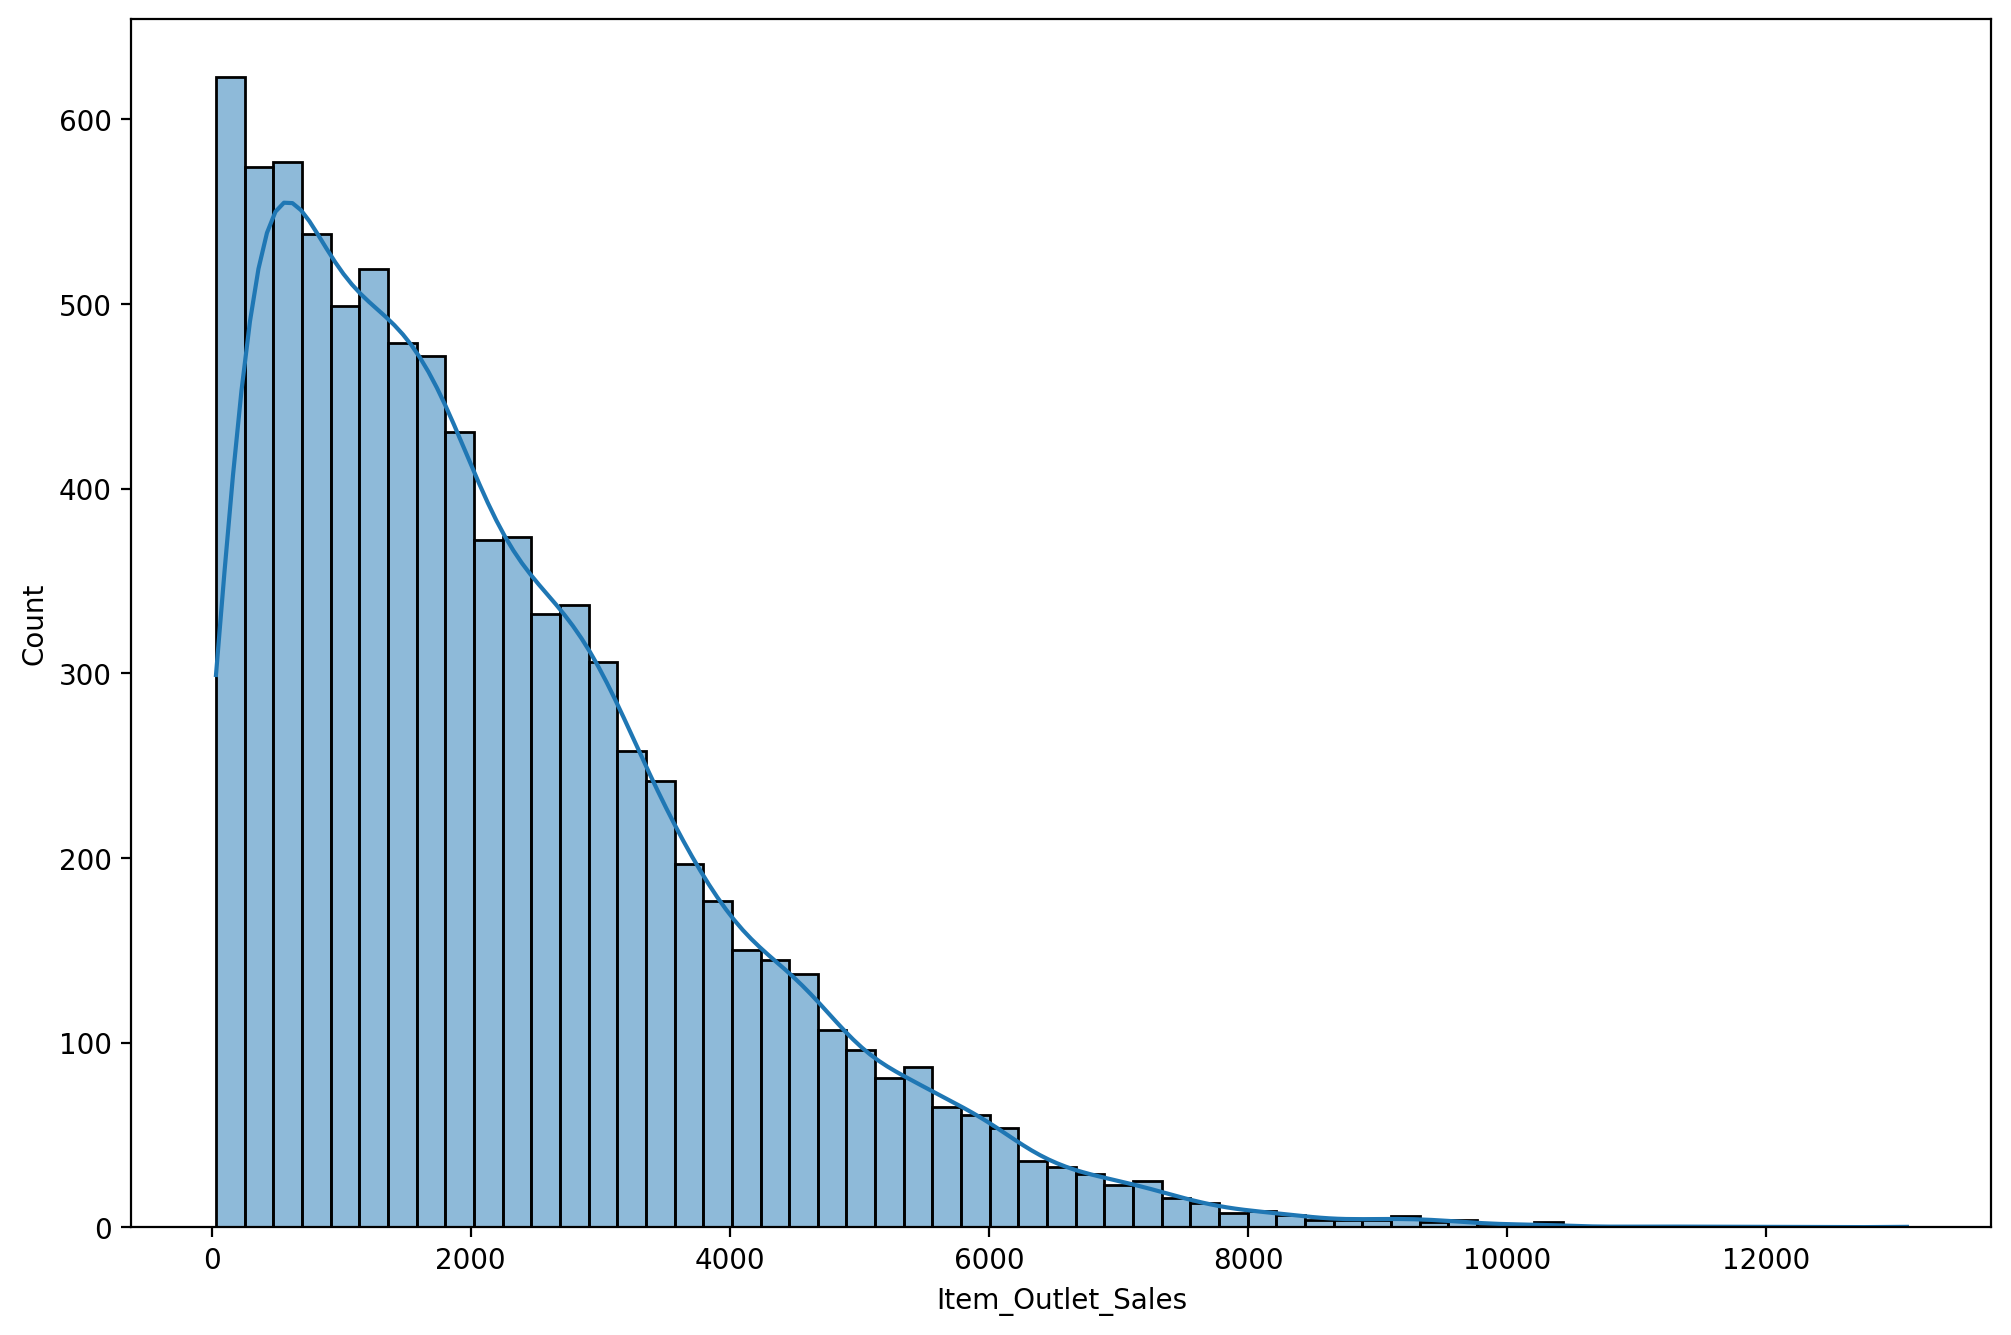

In [141]:
numericols=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
for i in numericols:
    plt.figure(figsize=(12,8),dpi=200)
    sns.histplot(x=df[i],data=df,kde=True)

numericals---> list of numerical columns of the dataset.

'Item_Weight'--> most value counts are around 12.5.


 'Item_Visibility'-->this distribution is rightly skewed.
 
 
 'Item_MRP'--> most value counts are around 100 and 200.
 
 
 'Outlet_Establishment_Year'--> most outlets were established around the year of 1985 and 2000.
 
 
 'Item_Outlet_Sales'--> this distribution is rightly skewed.

In [142]:
df.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


THIS IS A DESCRIPTION FOR OBJECT DATATYPE COLUMNS OF THE DATA.

THERE ARE HIGHEST FRQUENCIES FOR 'LOW-FAT',FRUITS AND VEGETABLES' AND 'MEDIUM' IN THE DATASET.

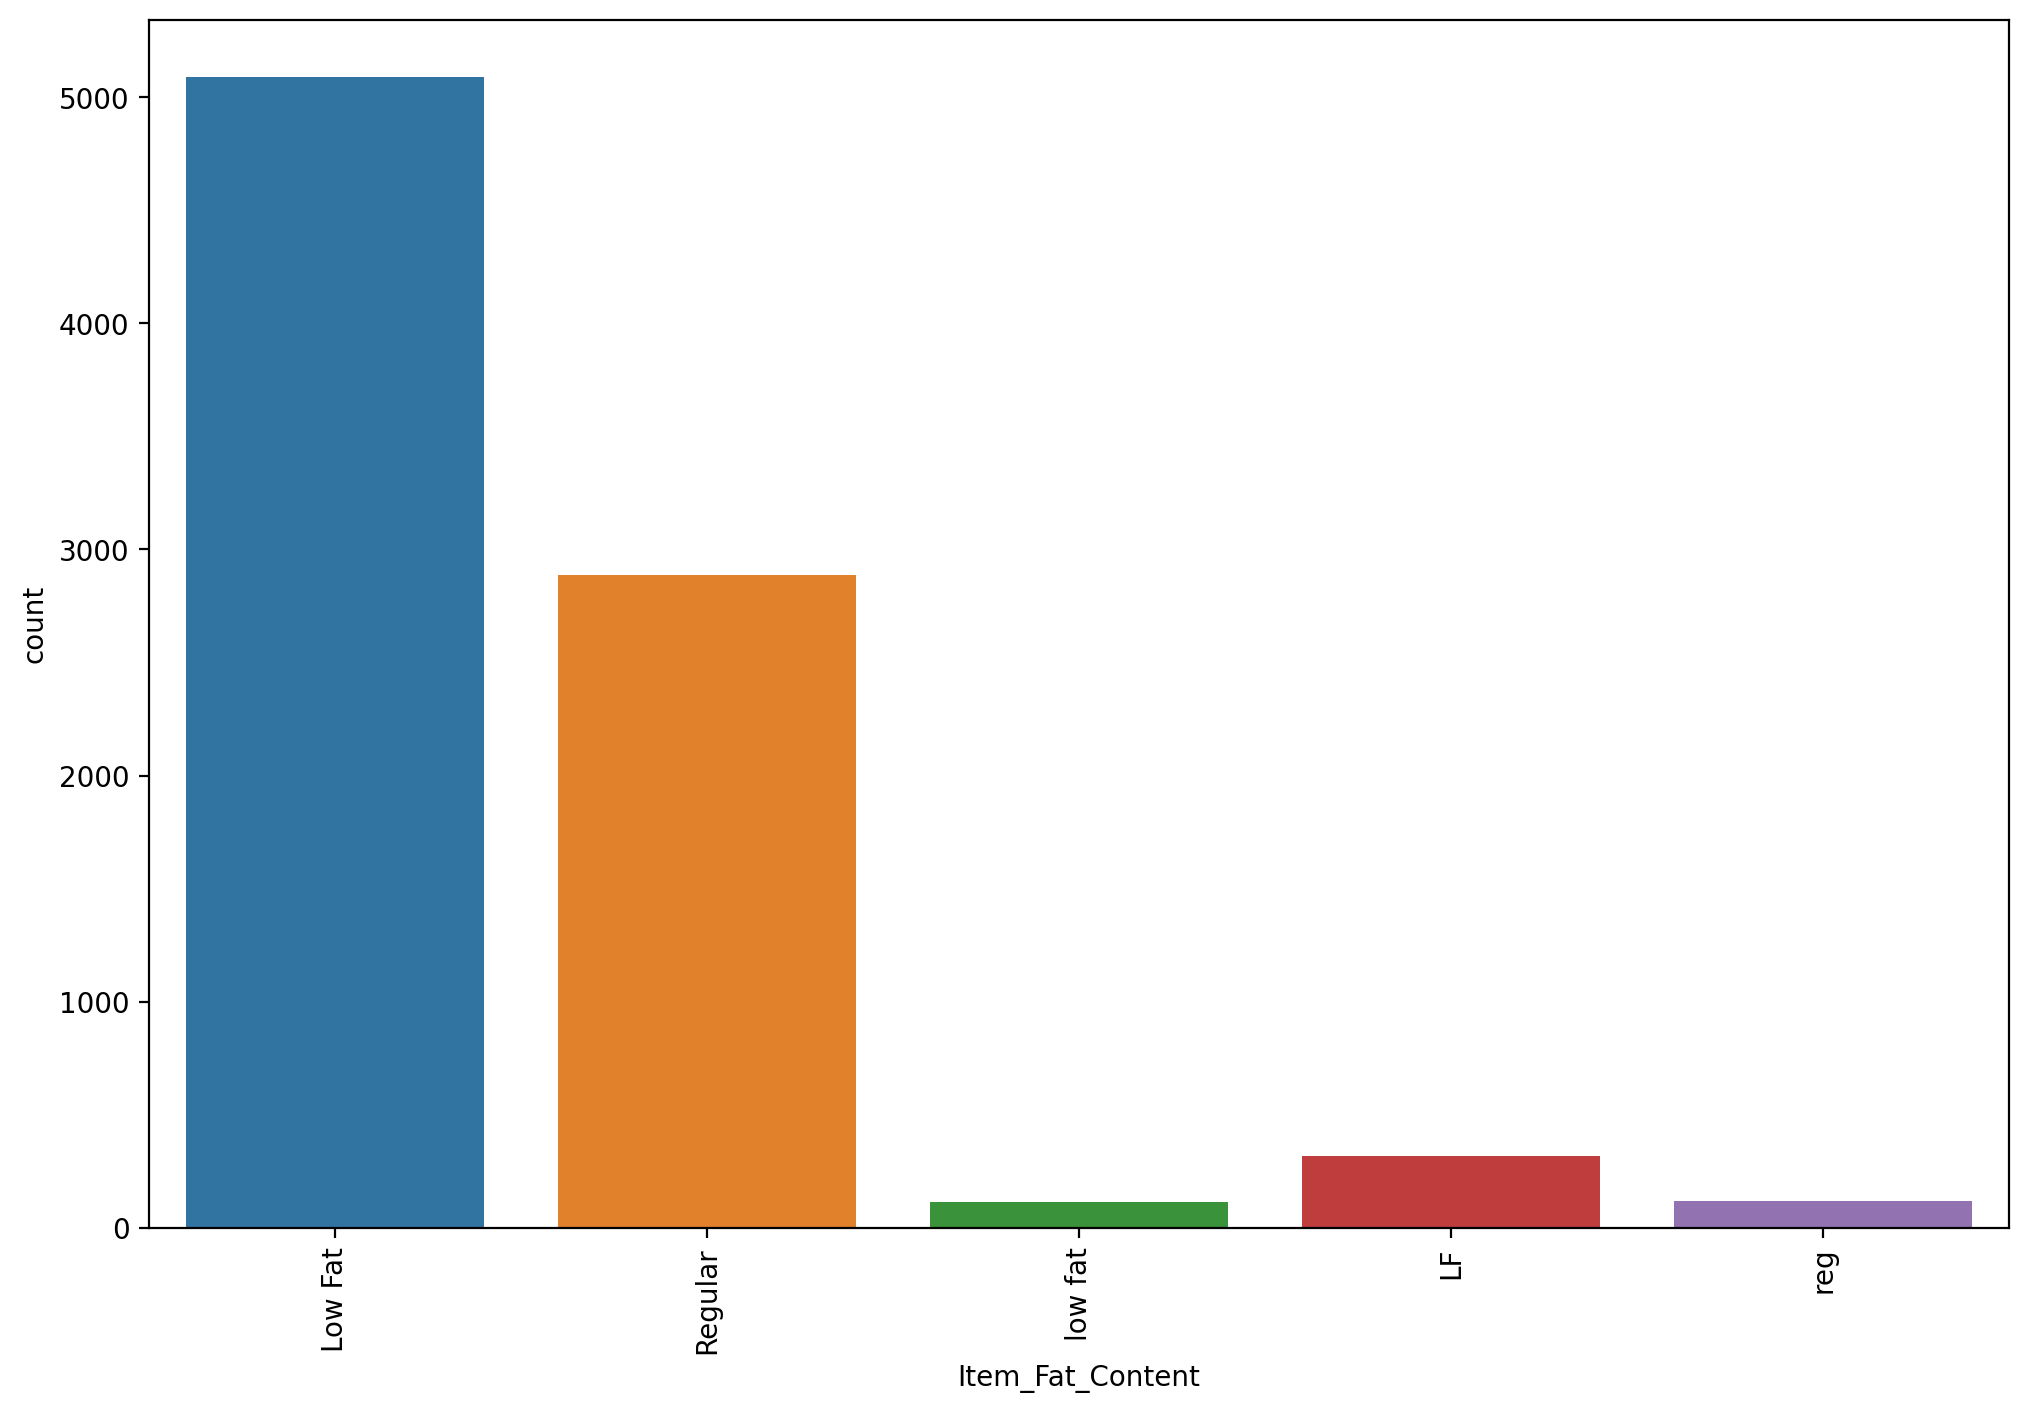

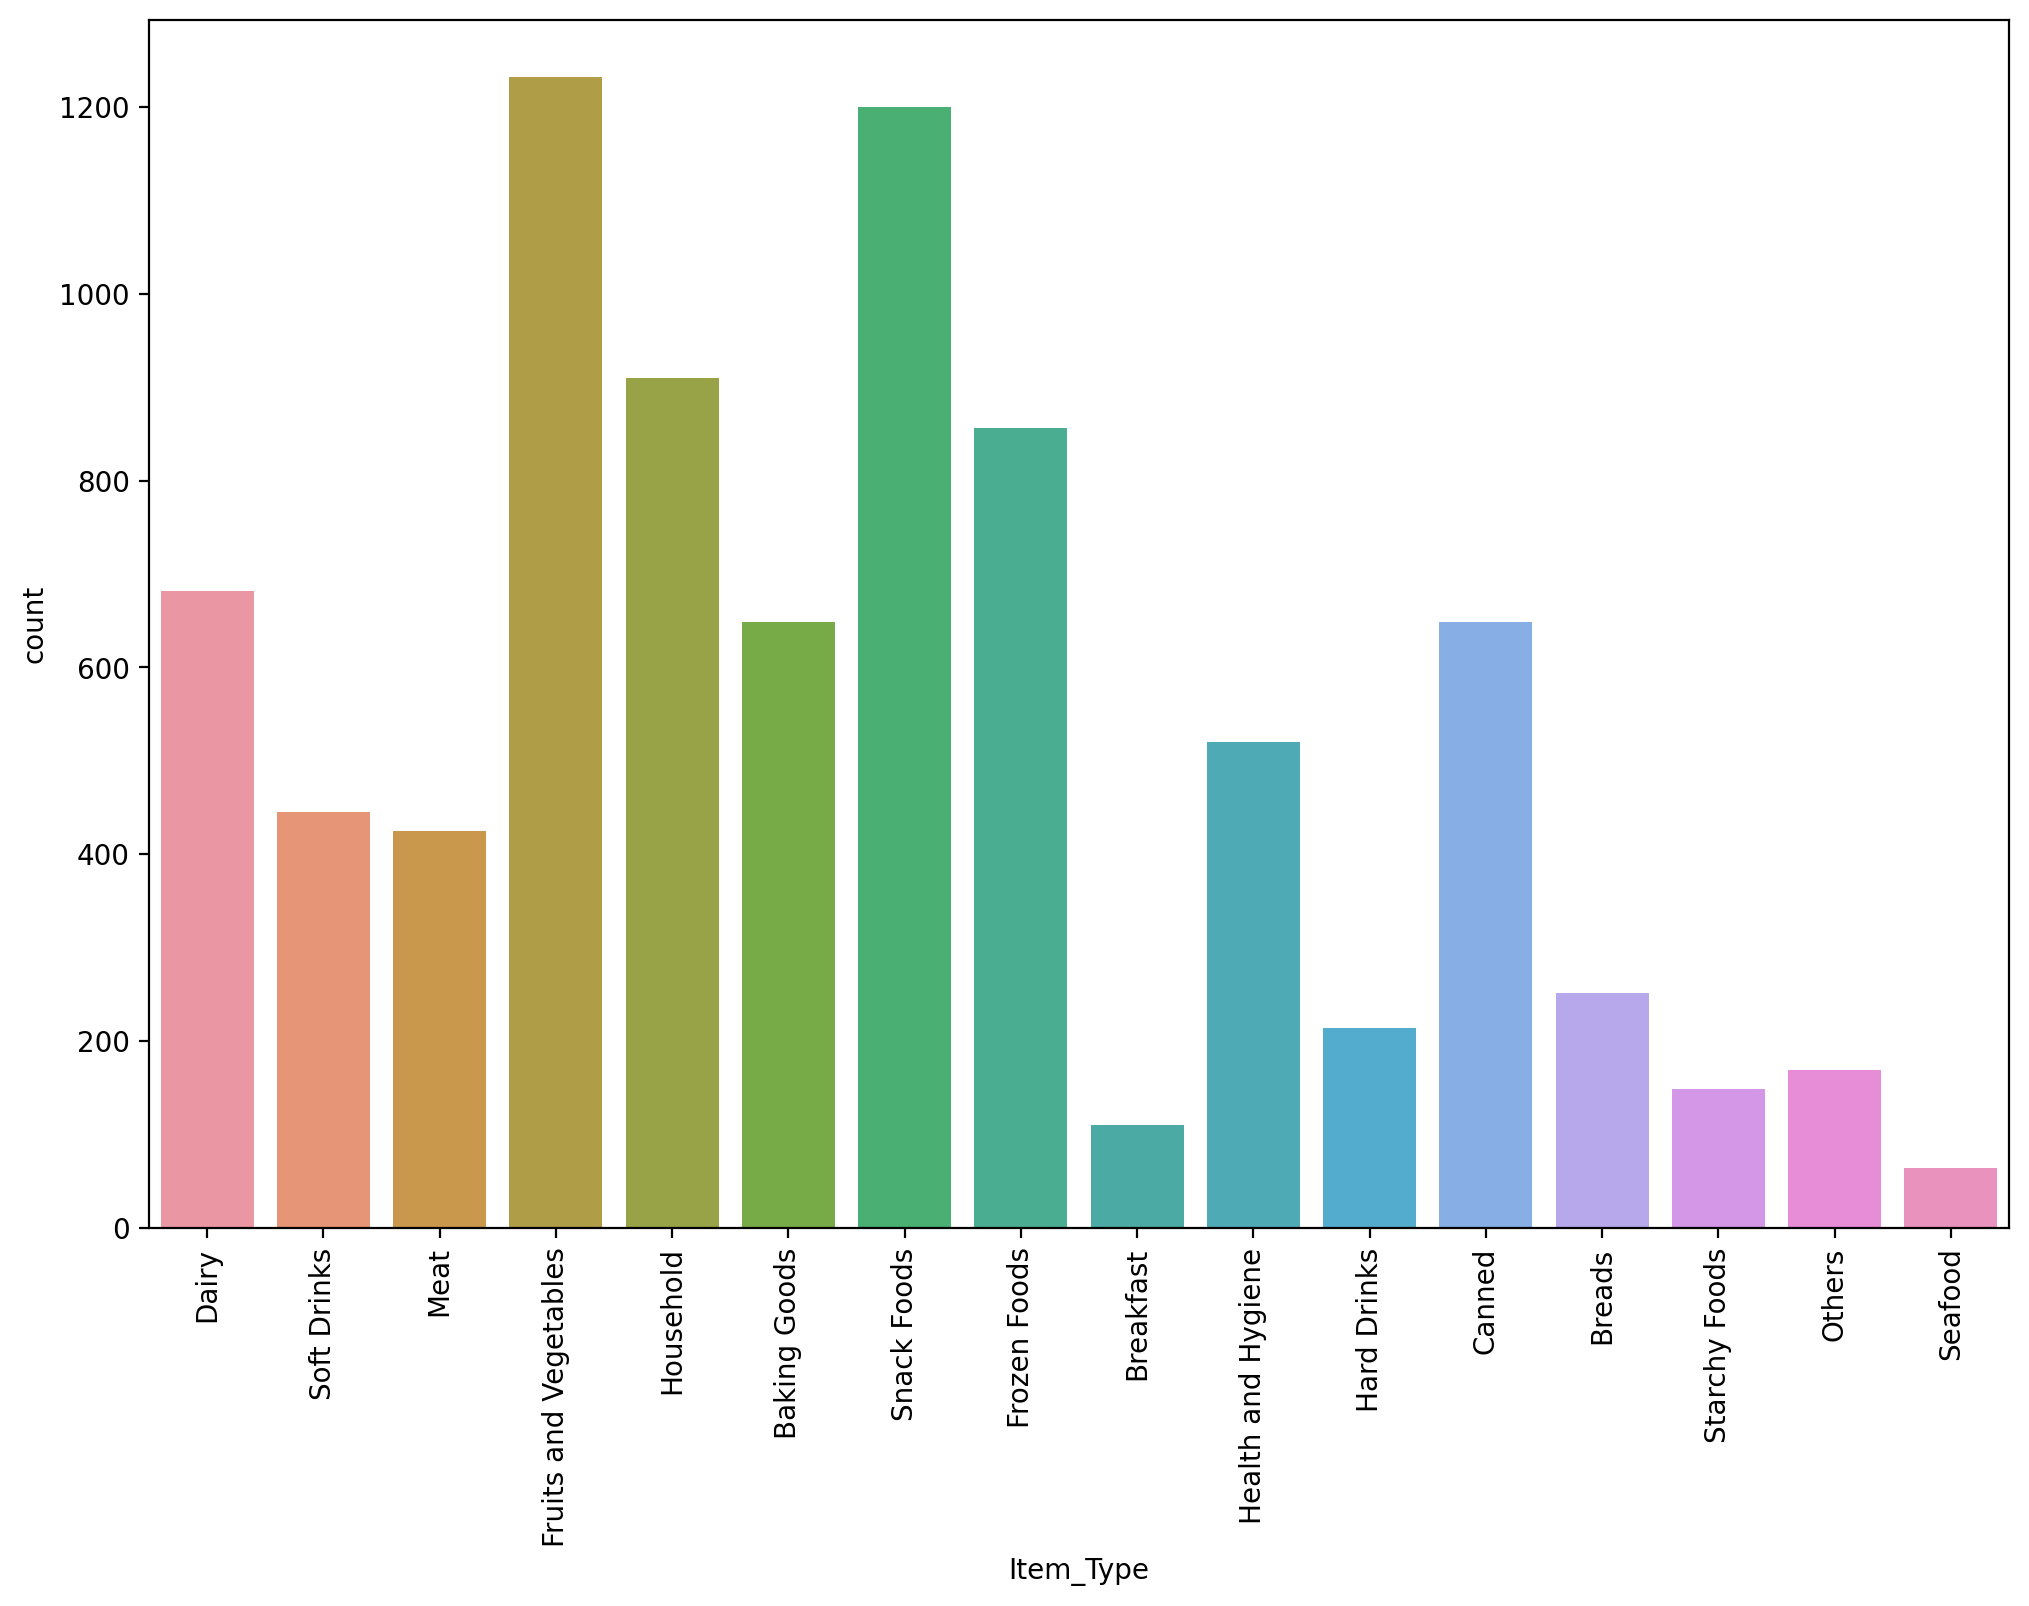

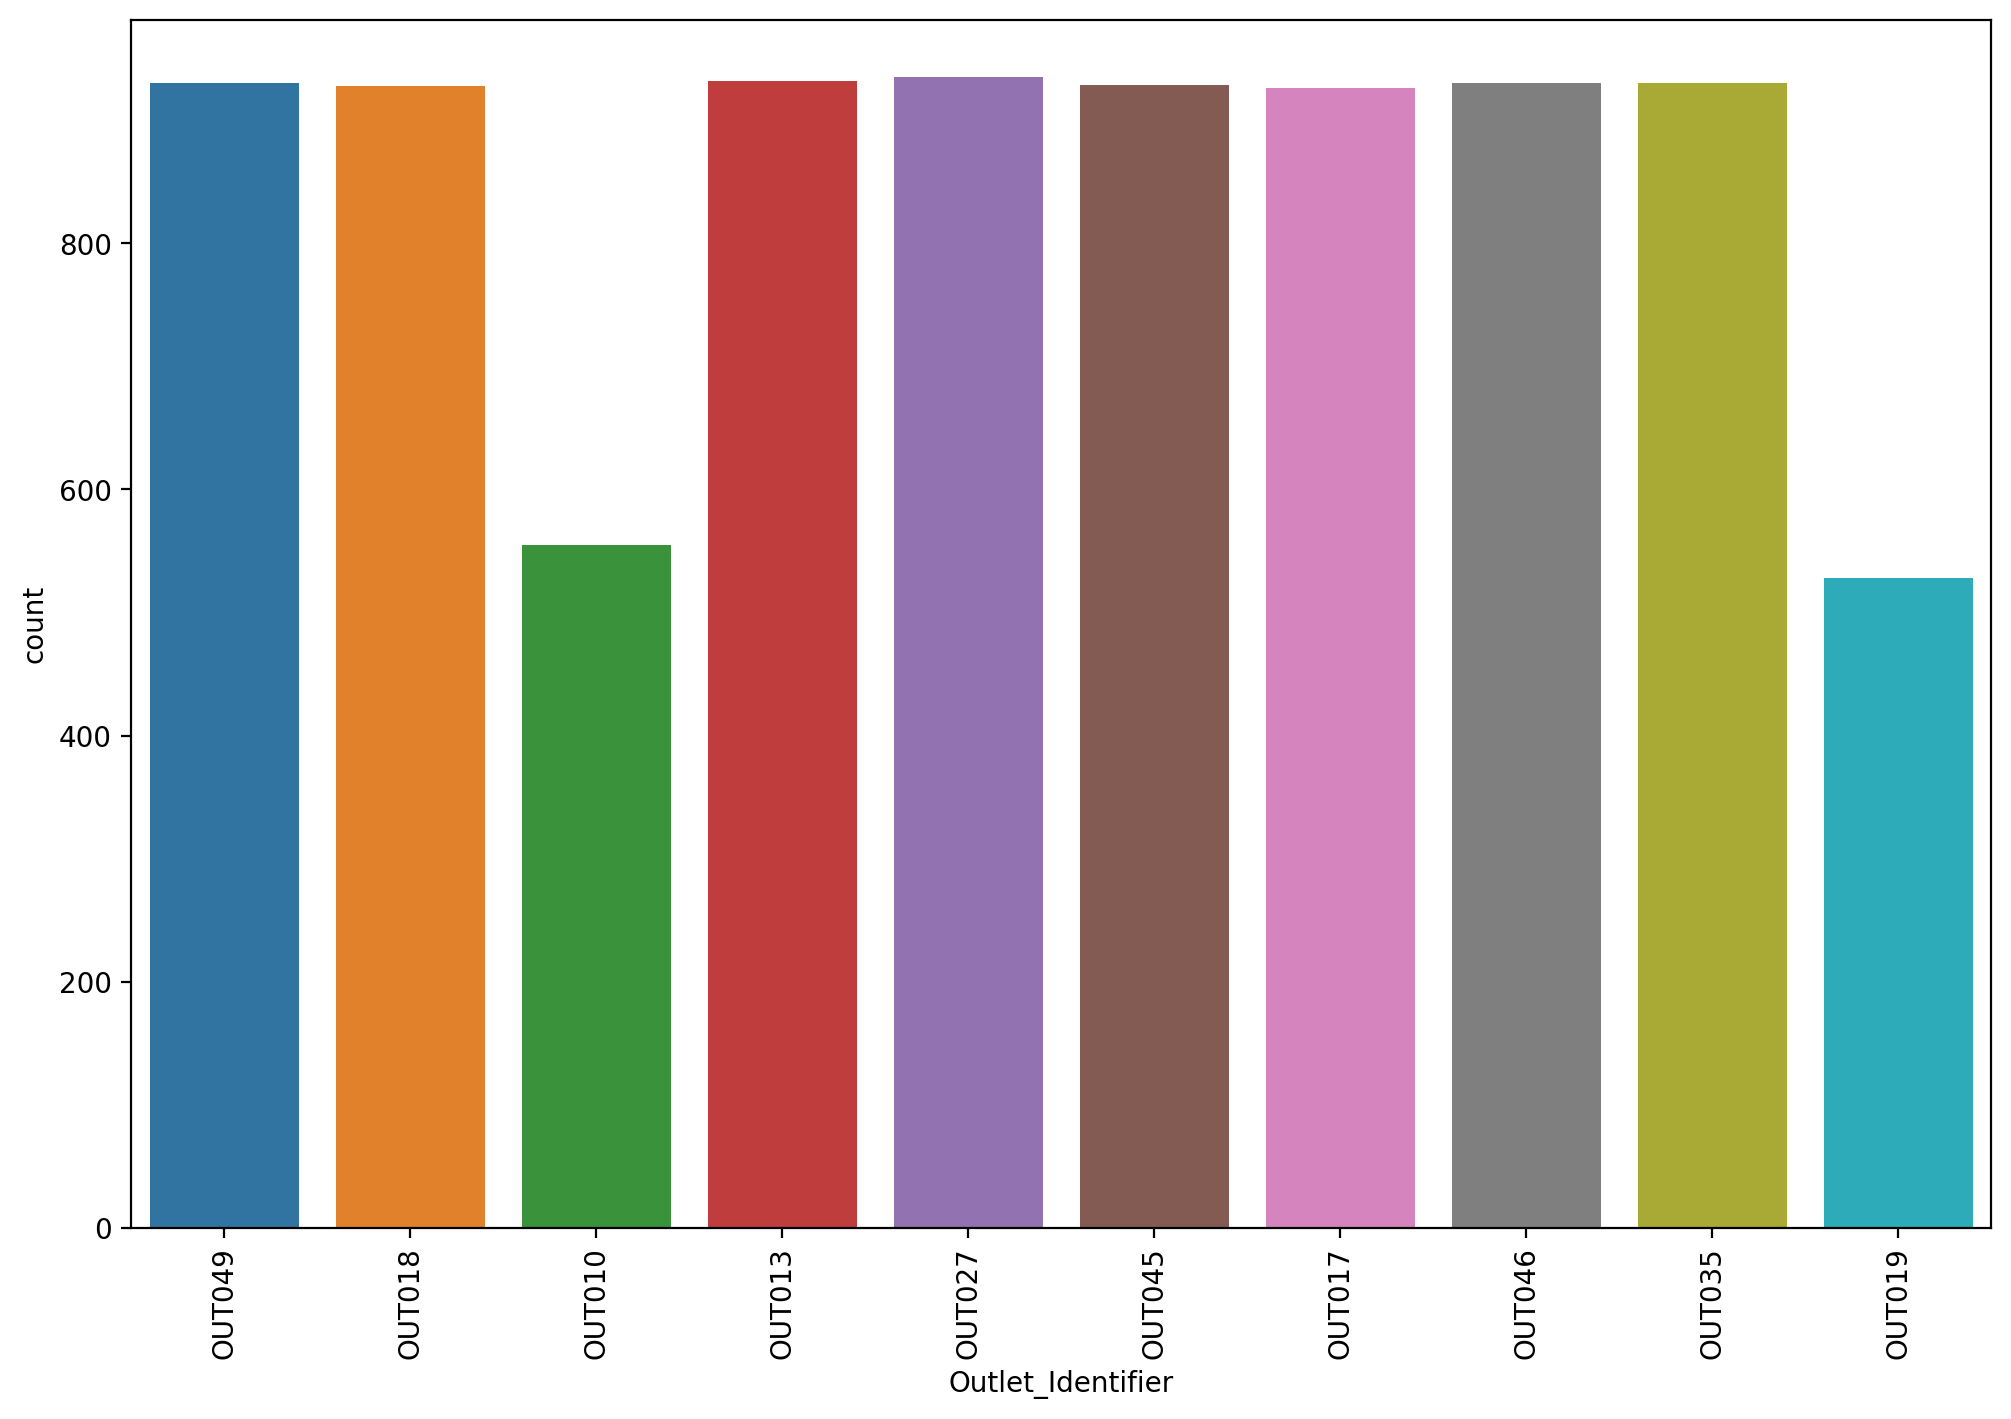

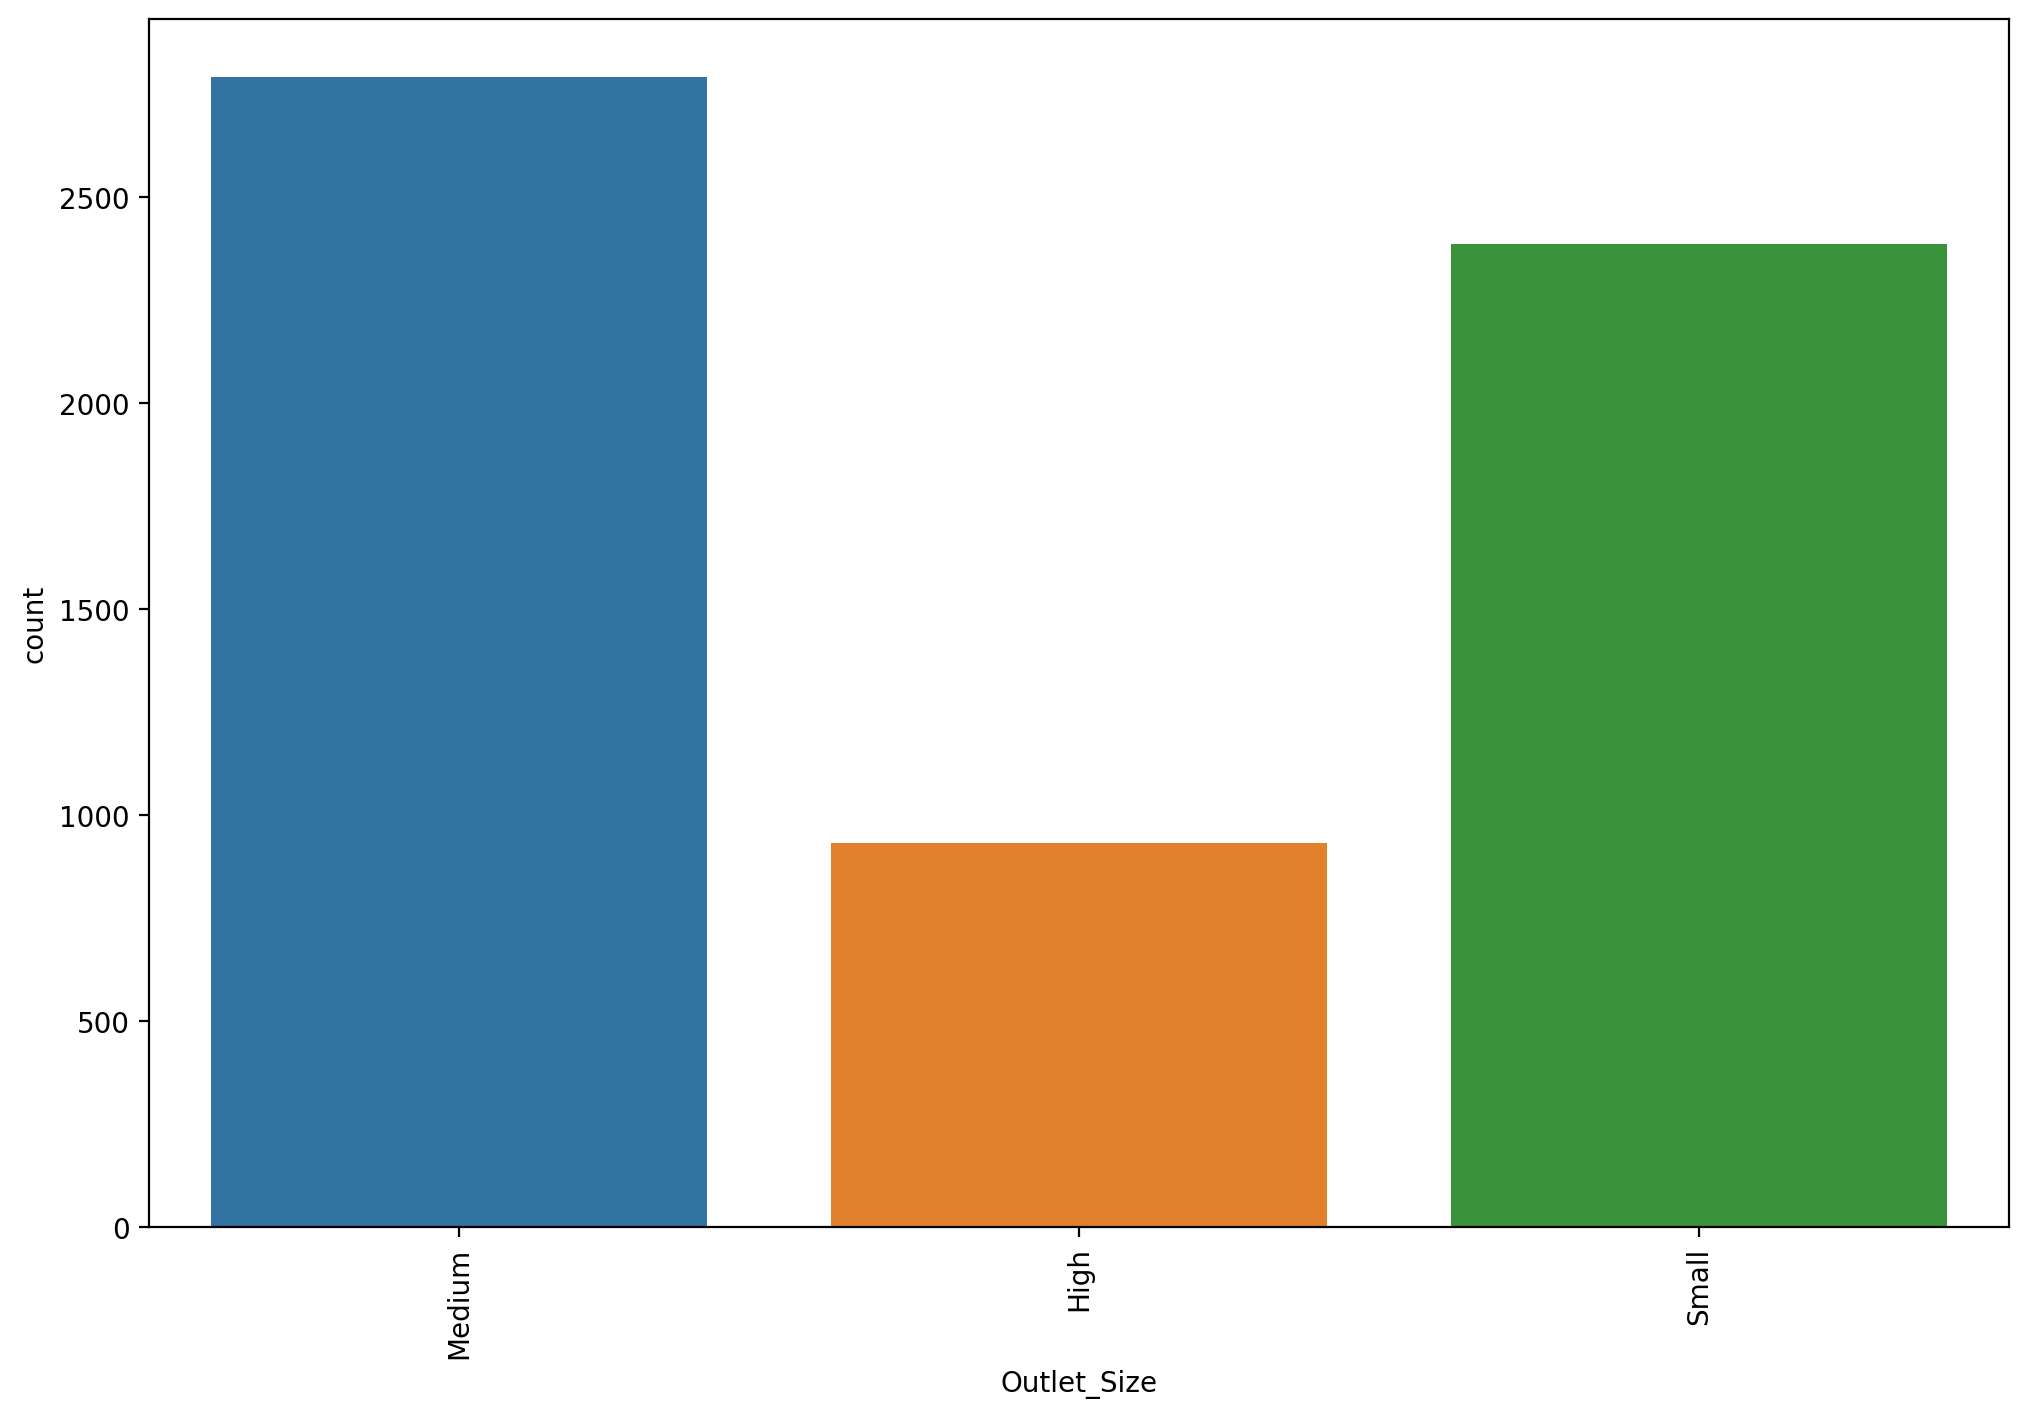

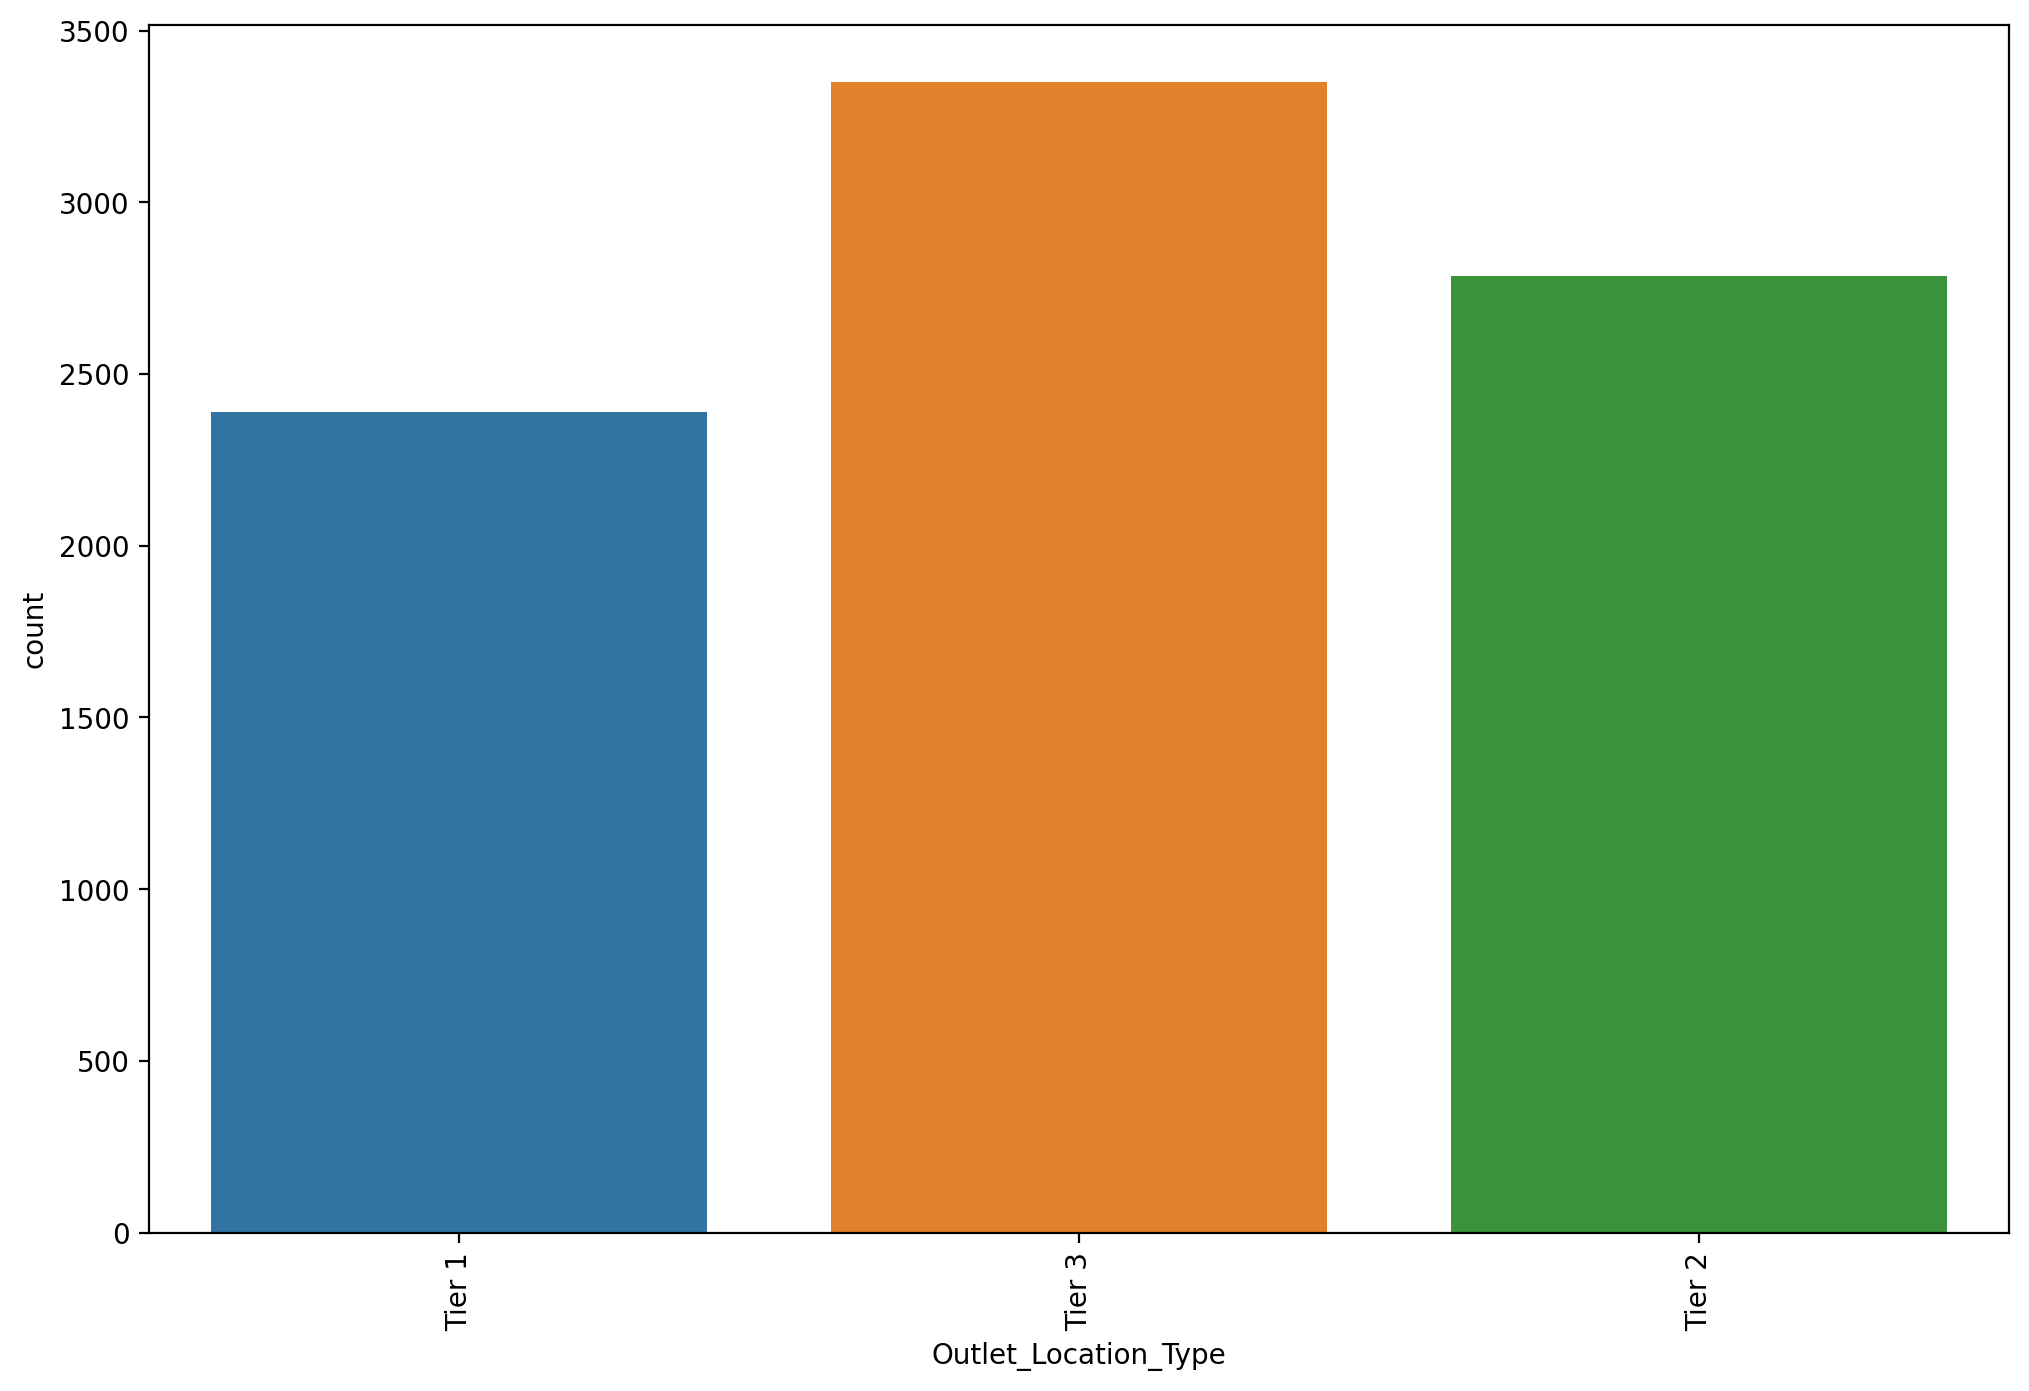

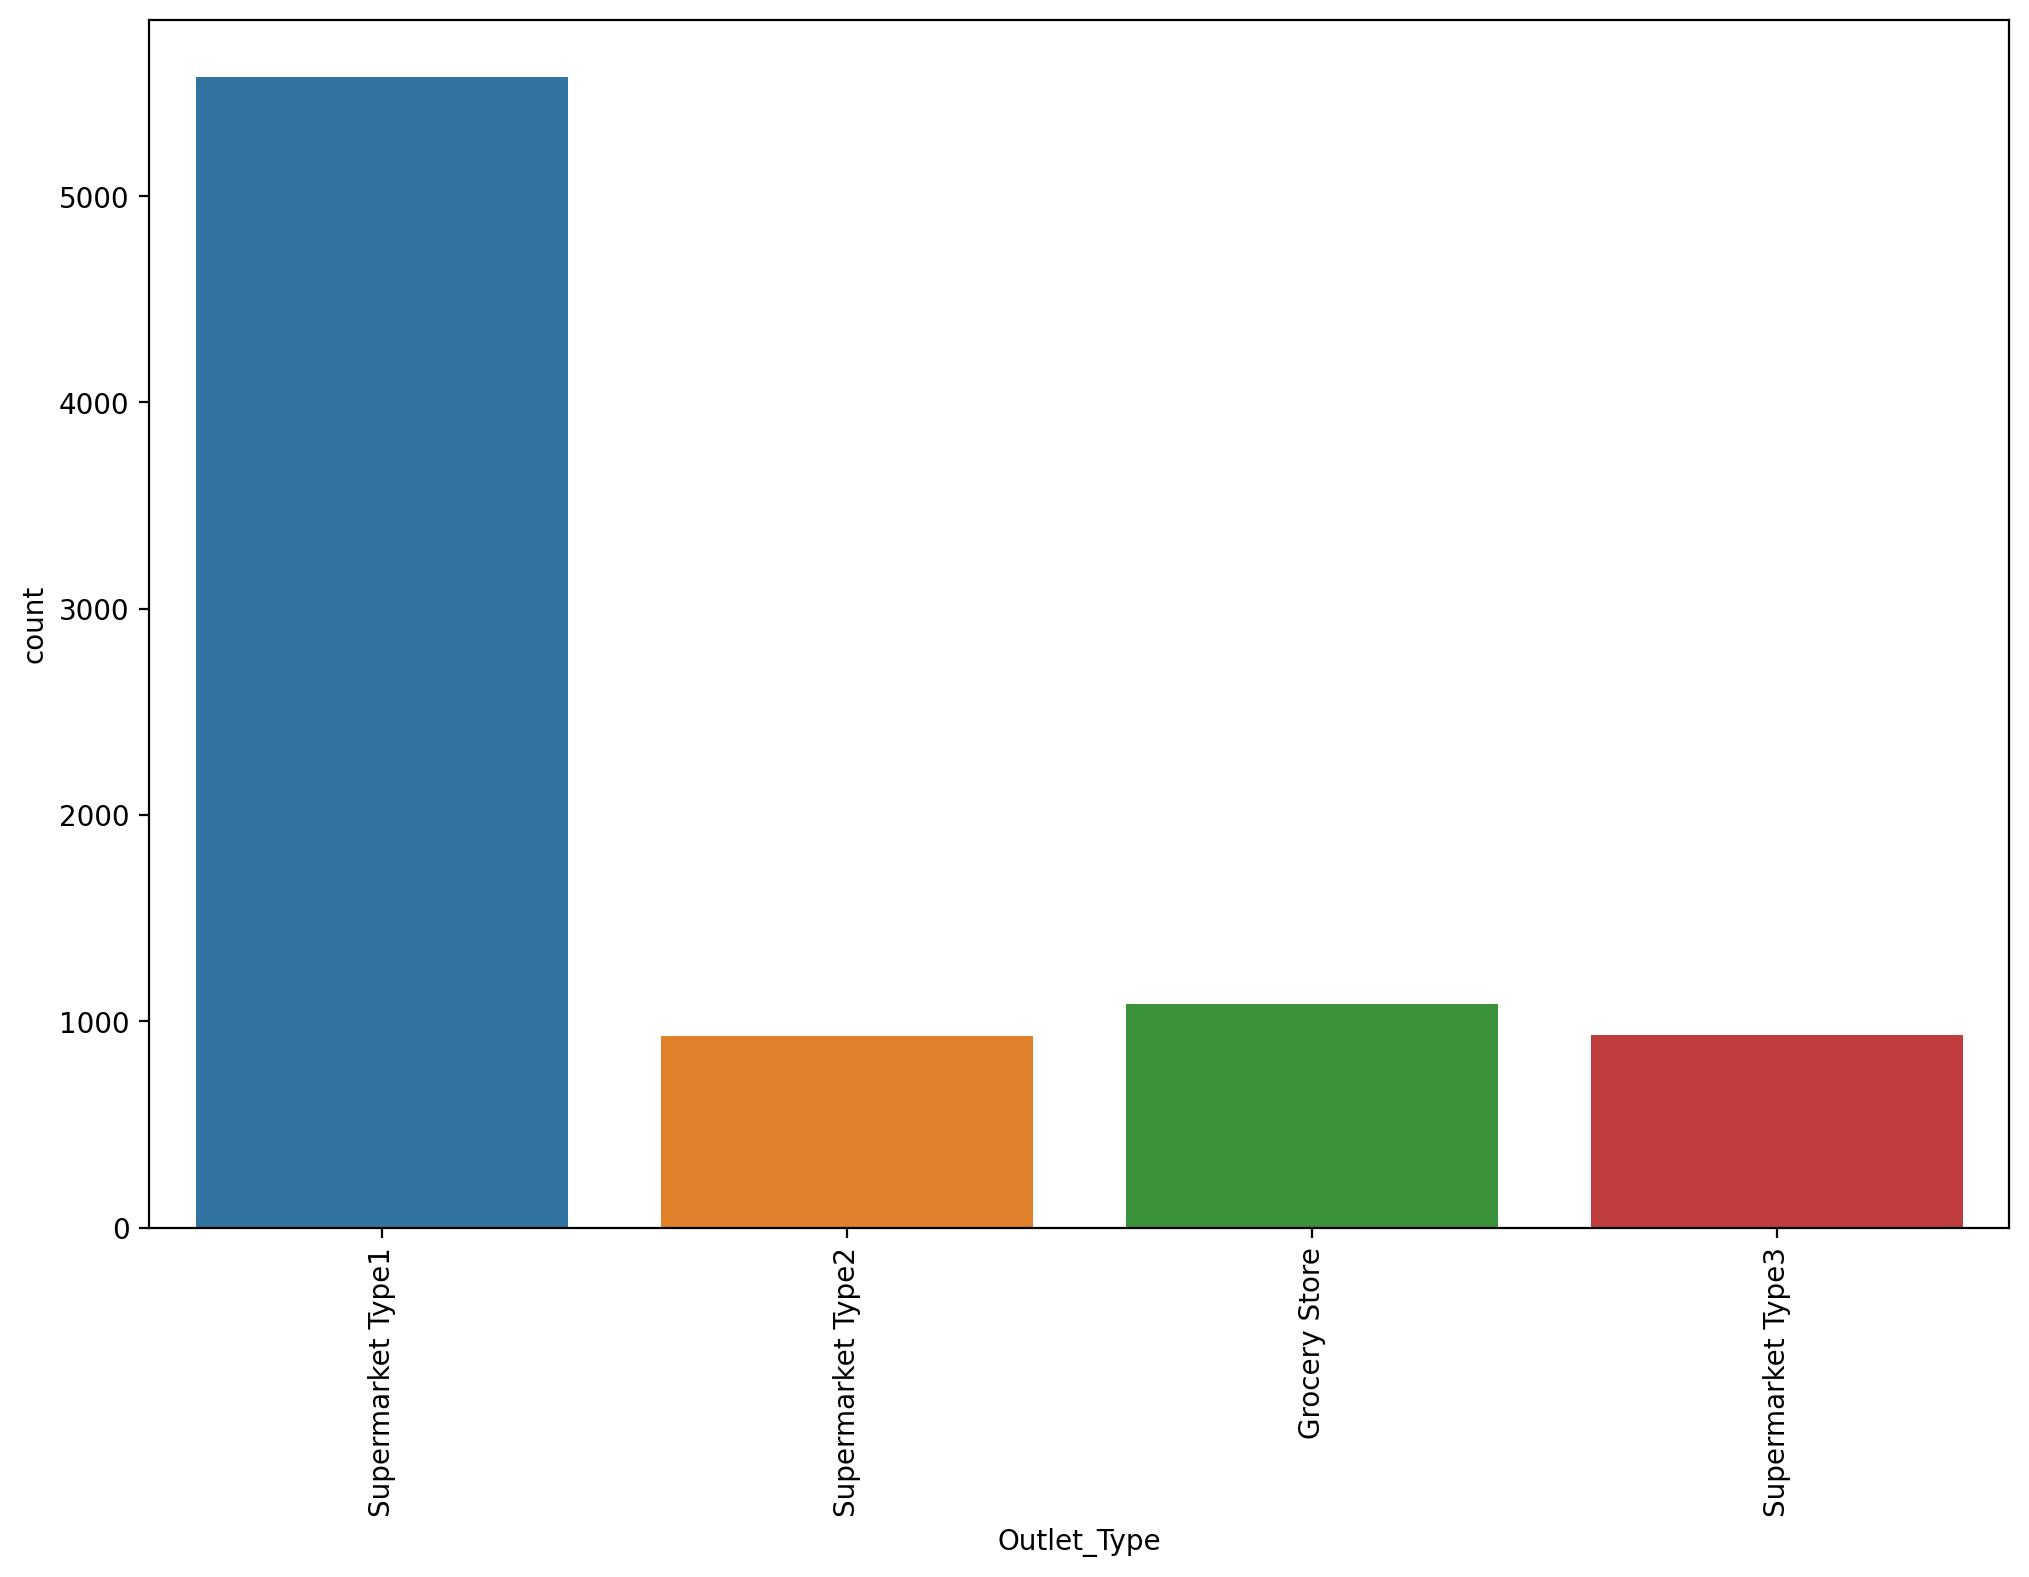

In [143]:
catcols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in catcols:
    plt.figure(figsize=(12,8),dpi=200)
    sns.countplot(x=df[i],data=df)
    plt.xticks(rotation=90);

'Item_Fat_Content'-->'low fat' has the most counts whereas the 'reg' has the least count.


 'Item_Type'-->'fruits and vegetables' has the most counts whereas the 'seafood' has the least count.
 
 
 'Outlet_Identifier'-->'OUT019' has the least count.
 
 
 'Outlet_Size'-->'medium' sized outlets has the most counts whereas the 'high-sized outlets' has the least count.
 
 
 'Outlet_Location_Type'-->most outlets are in tier 3 whereas tier 1 has the least number of outlets.
 
 
 'Outlet_Type'-->'supermarkets type1' outlets  has the most counts whereas the 'supermarket type2'outlets has the least count.
 
 

catcols--> list of categorical columns of the dataset.

### MISSING VALUES TREATMENT:-

In [144]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer()
imputer2 = SimpleImputer(strategy='most_frequent')
df['Item_Weight']=imputer1.fit_transform(df['Item_Weight'].values.reshape(-1,1))[:,0]
df['Outlet_Size']=imputer2.fit_transform(df['Outlet_Size'].values.reshape(-1,1))[:,0]

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


AFTER IMPUTATION OF OUTLET SIZE WITH MOST FREQUENT VALUES AND ITEM WEIGHT WITH MEAN VALUES,THERE ARE NO MISSING VALUES IN THE DATASET.

In [146]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [147]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [148]:
skew_data=df.skew()
skew_data

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [149]:
skew_data=skew_data.reset_index()
skew_data

,index,0
0,Item_Weight,0.090561
1,Item_Visibility,1.167091
2,Item_MRP,0.127202
3,Outlet_Establishment_Year,-0.396641
4,Item_Outlet_Sales,1.177531


In [150]:
skew_data.rename(columns={'index':'column_names',0:'skewness'},inplace=True)

In [151]:
skew_data

,column_names,skewness
0,Item_Weight,0.090561
1,Item_Visibility,1.167091
2,Item_MRP,0.127202
3,Outlet_Establishment_Year,-0.396641
4,Item_Outlet_Sales,1.177531


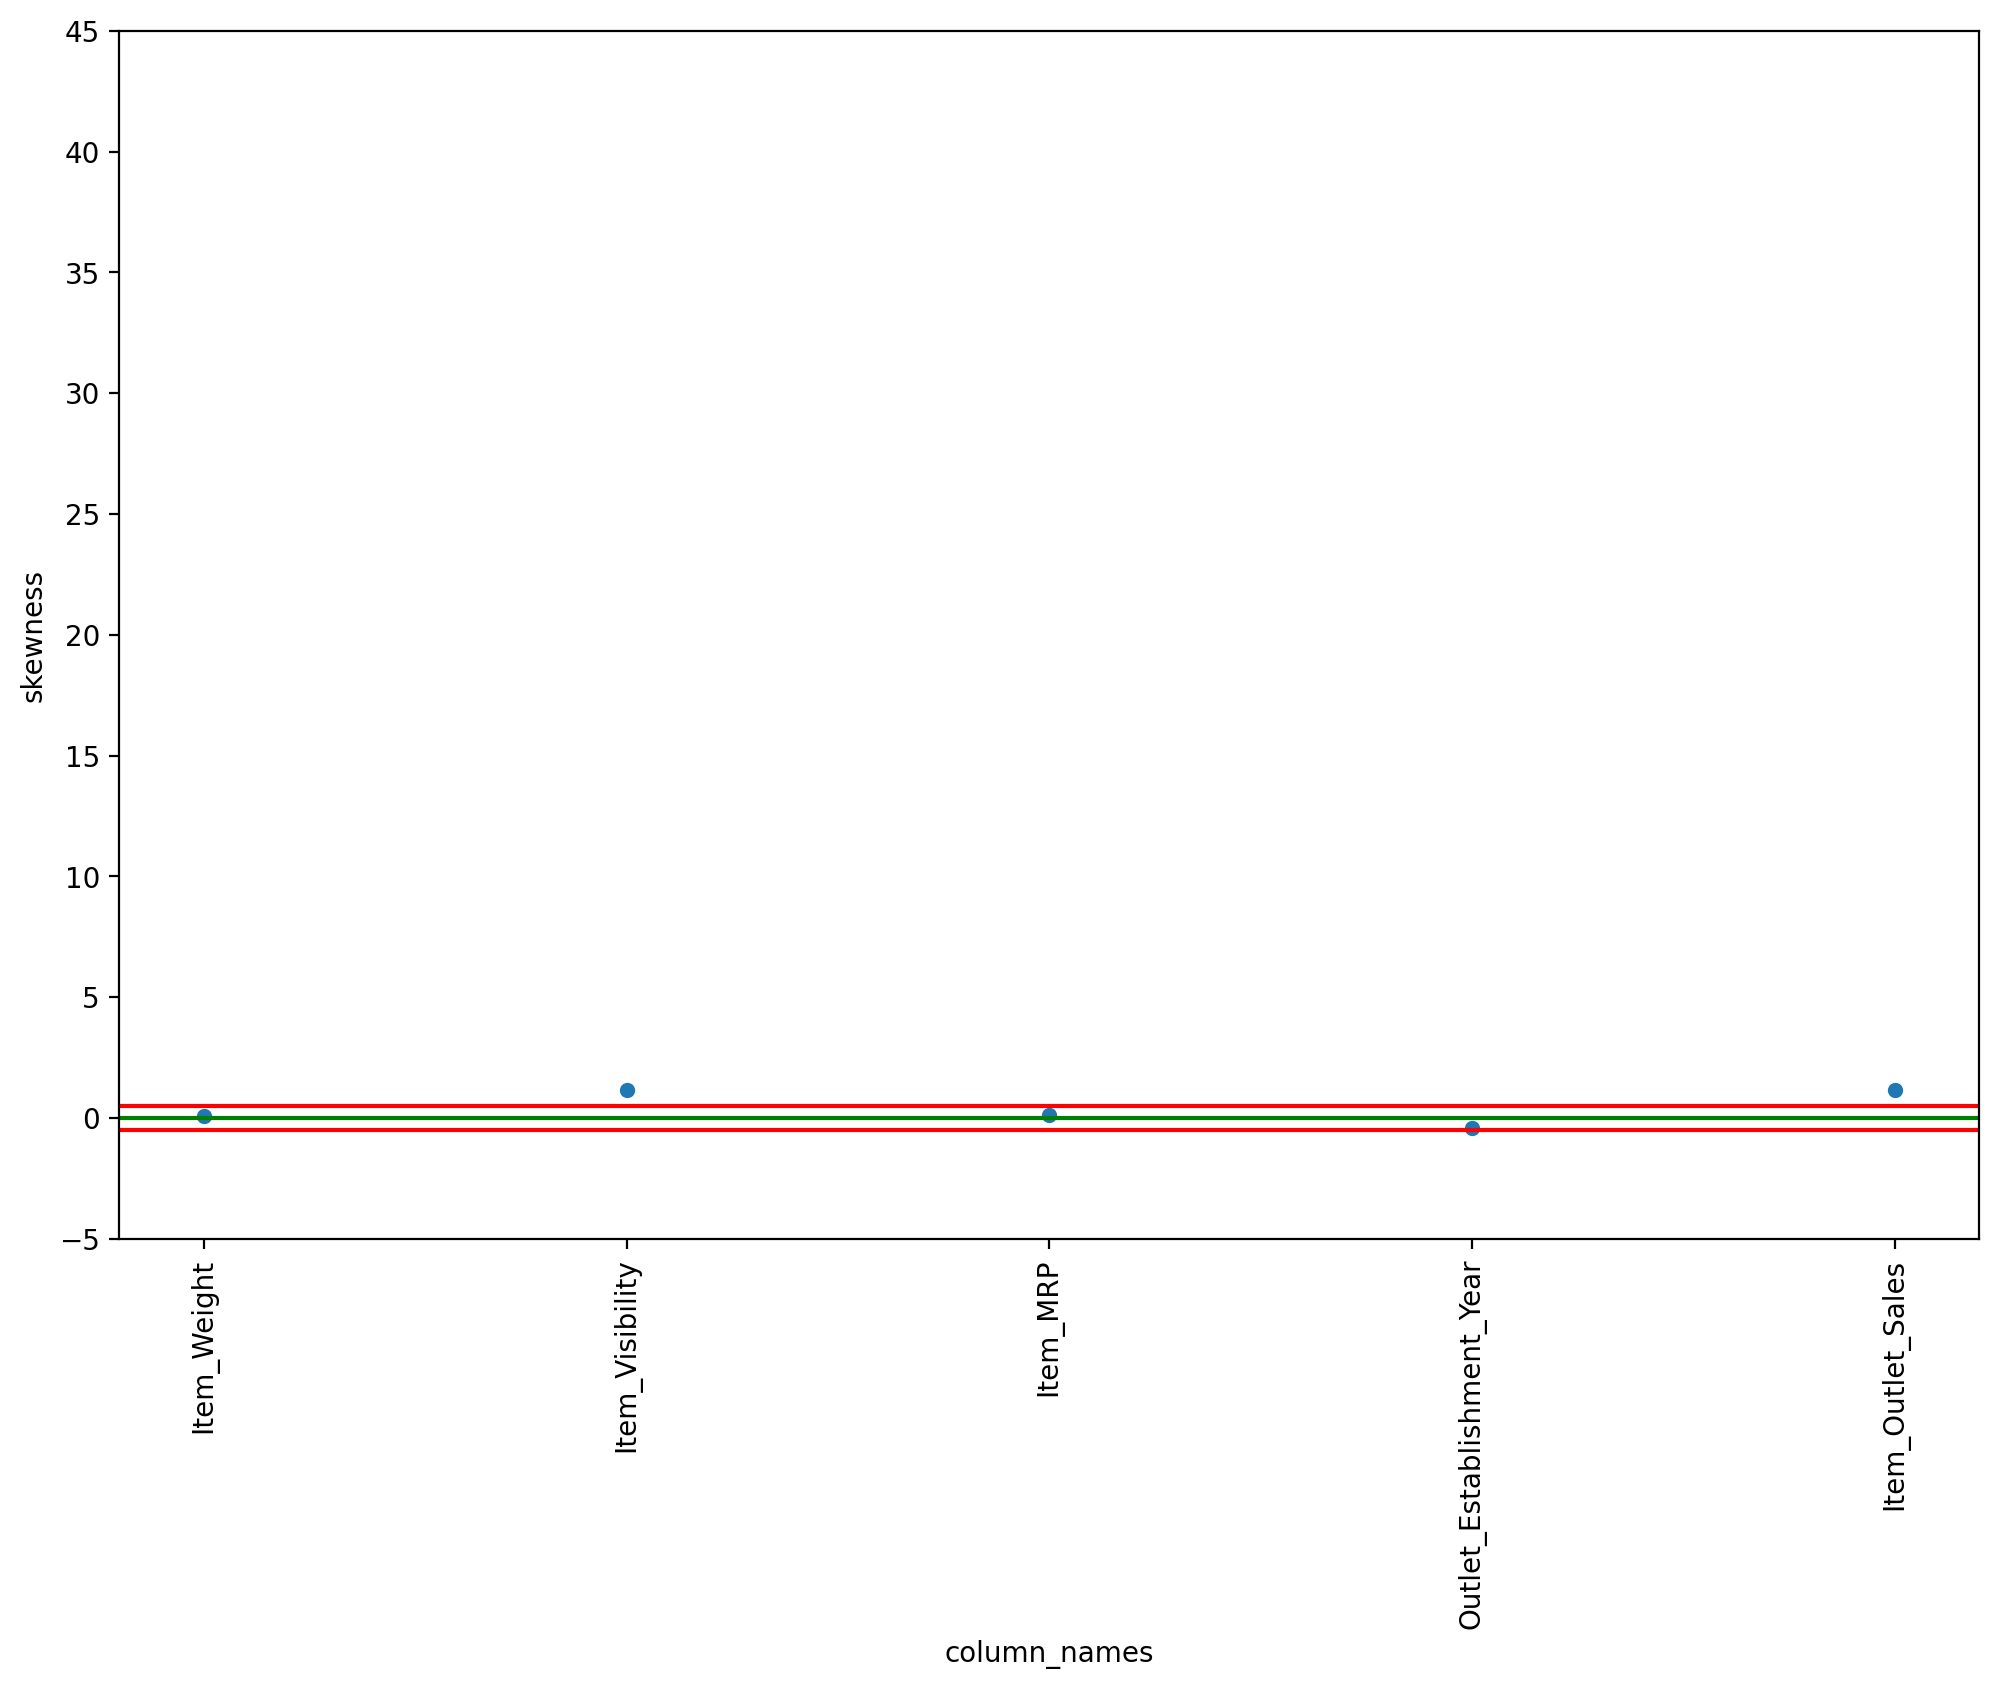

In [152]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skew_data,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 50, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

SKEWNESS CHECK AND OBSERVATIONS:- PLOTTED SKEWNESS FOR ALL DATA DISTRIBUTIONS AGAINST COLUMNS OF THE DATA. PLOTTED GREEN HORIZONTAL LINE FOR A SKEWNESS OF ZERO(NORMAL DISTRIBUTION HAS ASKEWNESS OF 0). PLOTTED RED LINES AROUND THE GREEN LINE DENOTING A RANGE OF(-0.5,0.5). IF DATA POINTS FALL WITHIN THE ABOVE MENTIONED RANGE,THEN THEY ARE APPROXIMATELY NORMALLY DISTRIBUTED .

FOUND NO DATA POINTS WITHIN THE RANGE. ALL THE DATA POINTS ARE HIGHLY SKEWED. The rule for skewness seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed), the data are moderately skewed.

Skewness of the normal distribution is zero. All the dataset columns seem to have a skewness of more than 0.5 (except for the label) and even more than 1,so they all are highly skewed.They all have a right-skewed data or a positively-skewed data curve since the right tail is longer and mass of the distribution is concentrated on the left of the figure.

THE COLUMNS 'ITEM VISIBILITY' AND 'ITEM_OUTLET_SALES' SEEMS TO BE HIGHLY SKEWED.

Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. Finally, a value of zero indicates no relationship between the two variables x and y.

<AxesSubplot:>

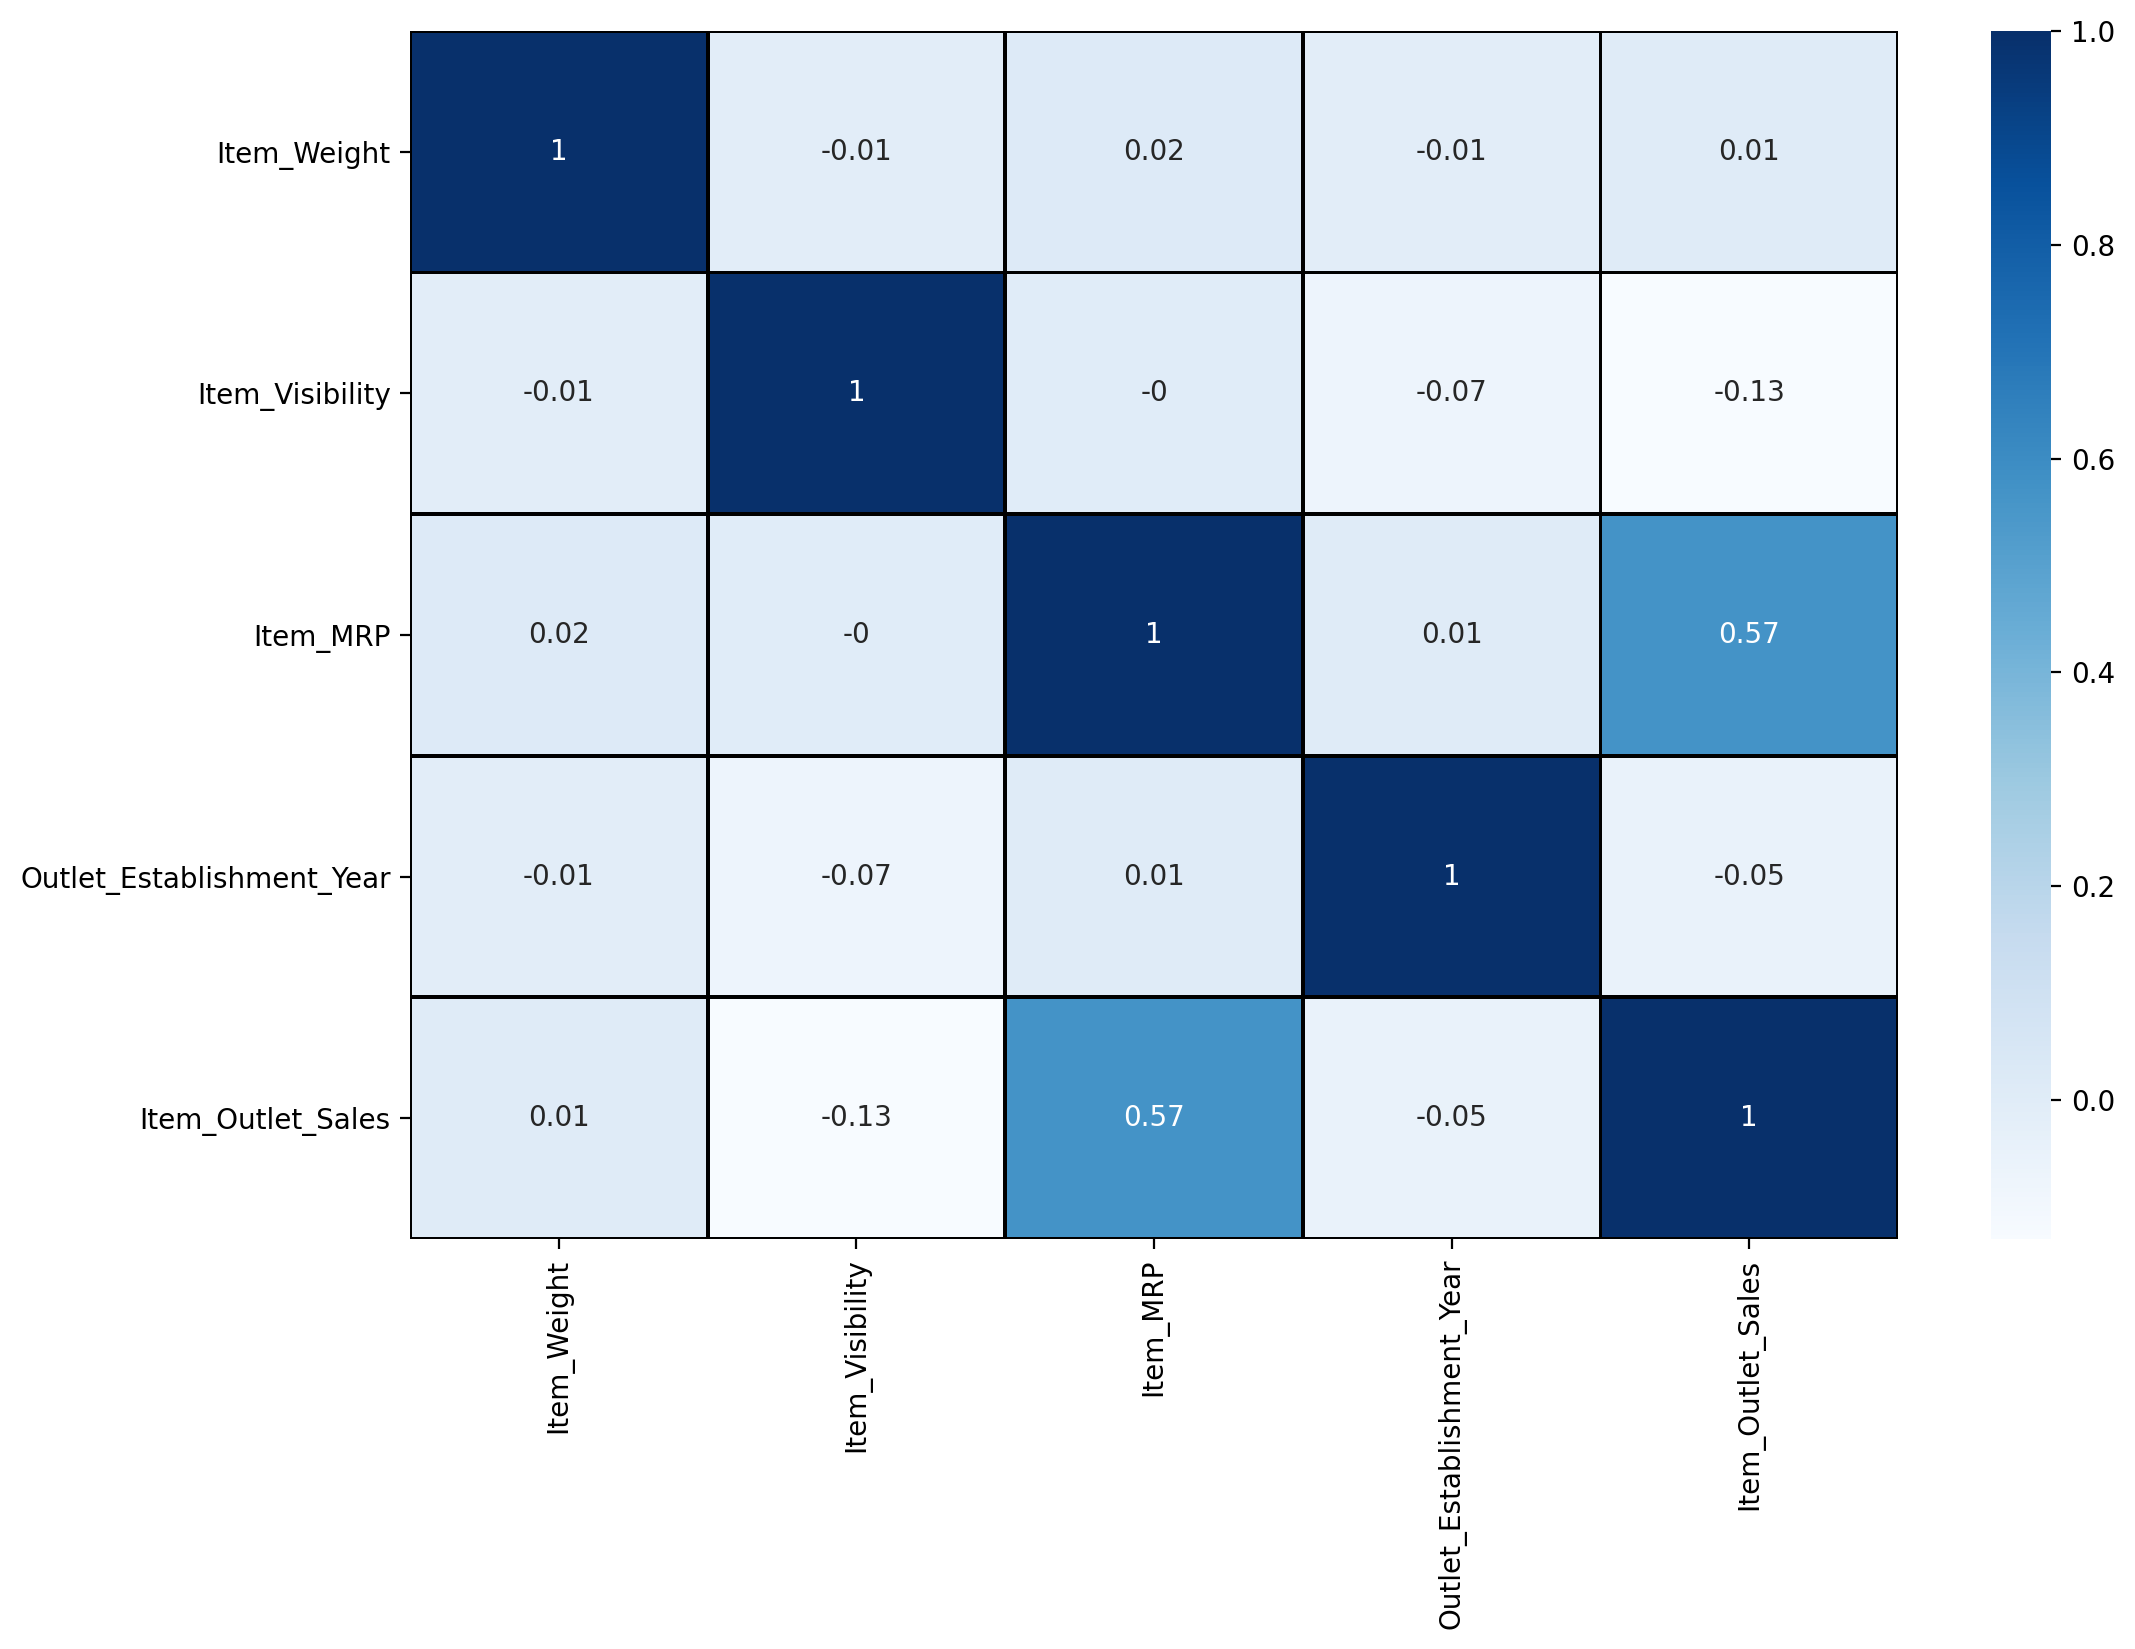

In [153]:
dfc=round(df.corr(),2)
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dfc,cmap='Blues',linewidth=1,linecolor='black',annot=True)

Correlation tells us about how strong the relationship is between the numerical variables of the dataset.It is in the range of(-1,1).

In [154]:
# columns having strong positive correlation is denoted as dfc_strong_positive.:--
dfc_strong_positive=dfc[(dfc>0.5)]
dfc_strong_positive

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.0,NaN,NaN,NaN,NaN
Item_Visibility,NaN,1.0,NaN,NaN,NaN
Item_MRP,NaN,NaN,1.00,NaN,0.57
Outlet_Establishment_Year,NaN,NaN,NaN,1.0,NaN
Item_Outlet_Sales,NaN,NaN,0.57,NaN,1.00


<AxesSubplot:>

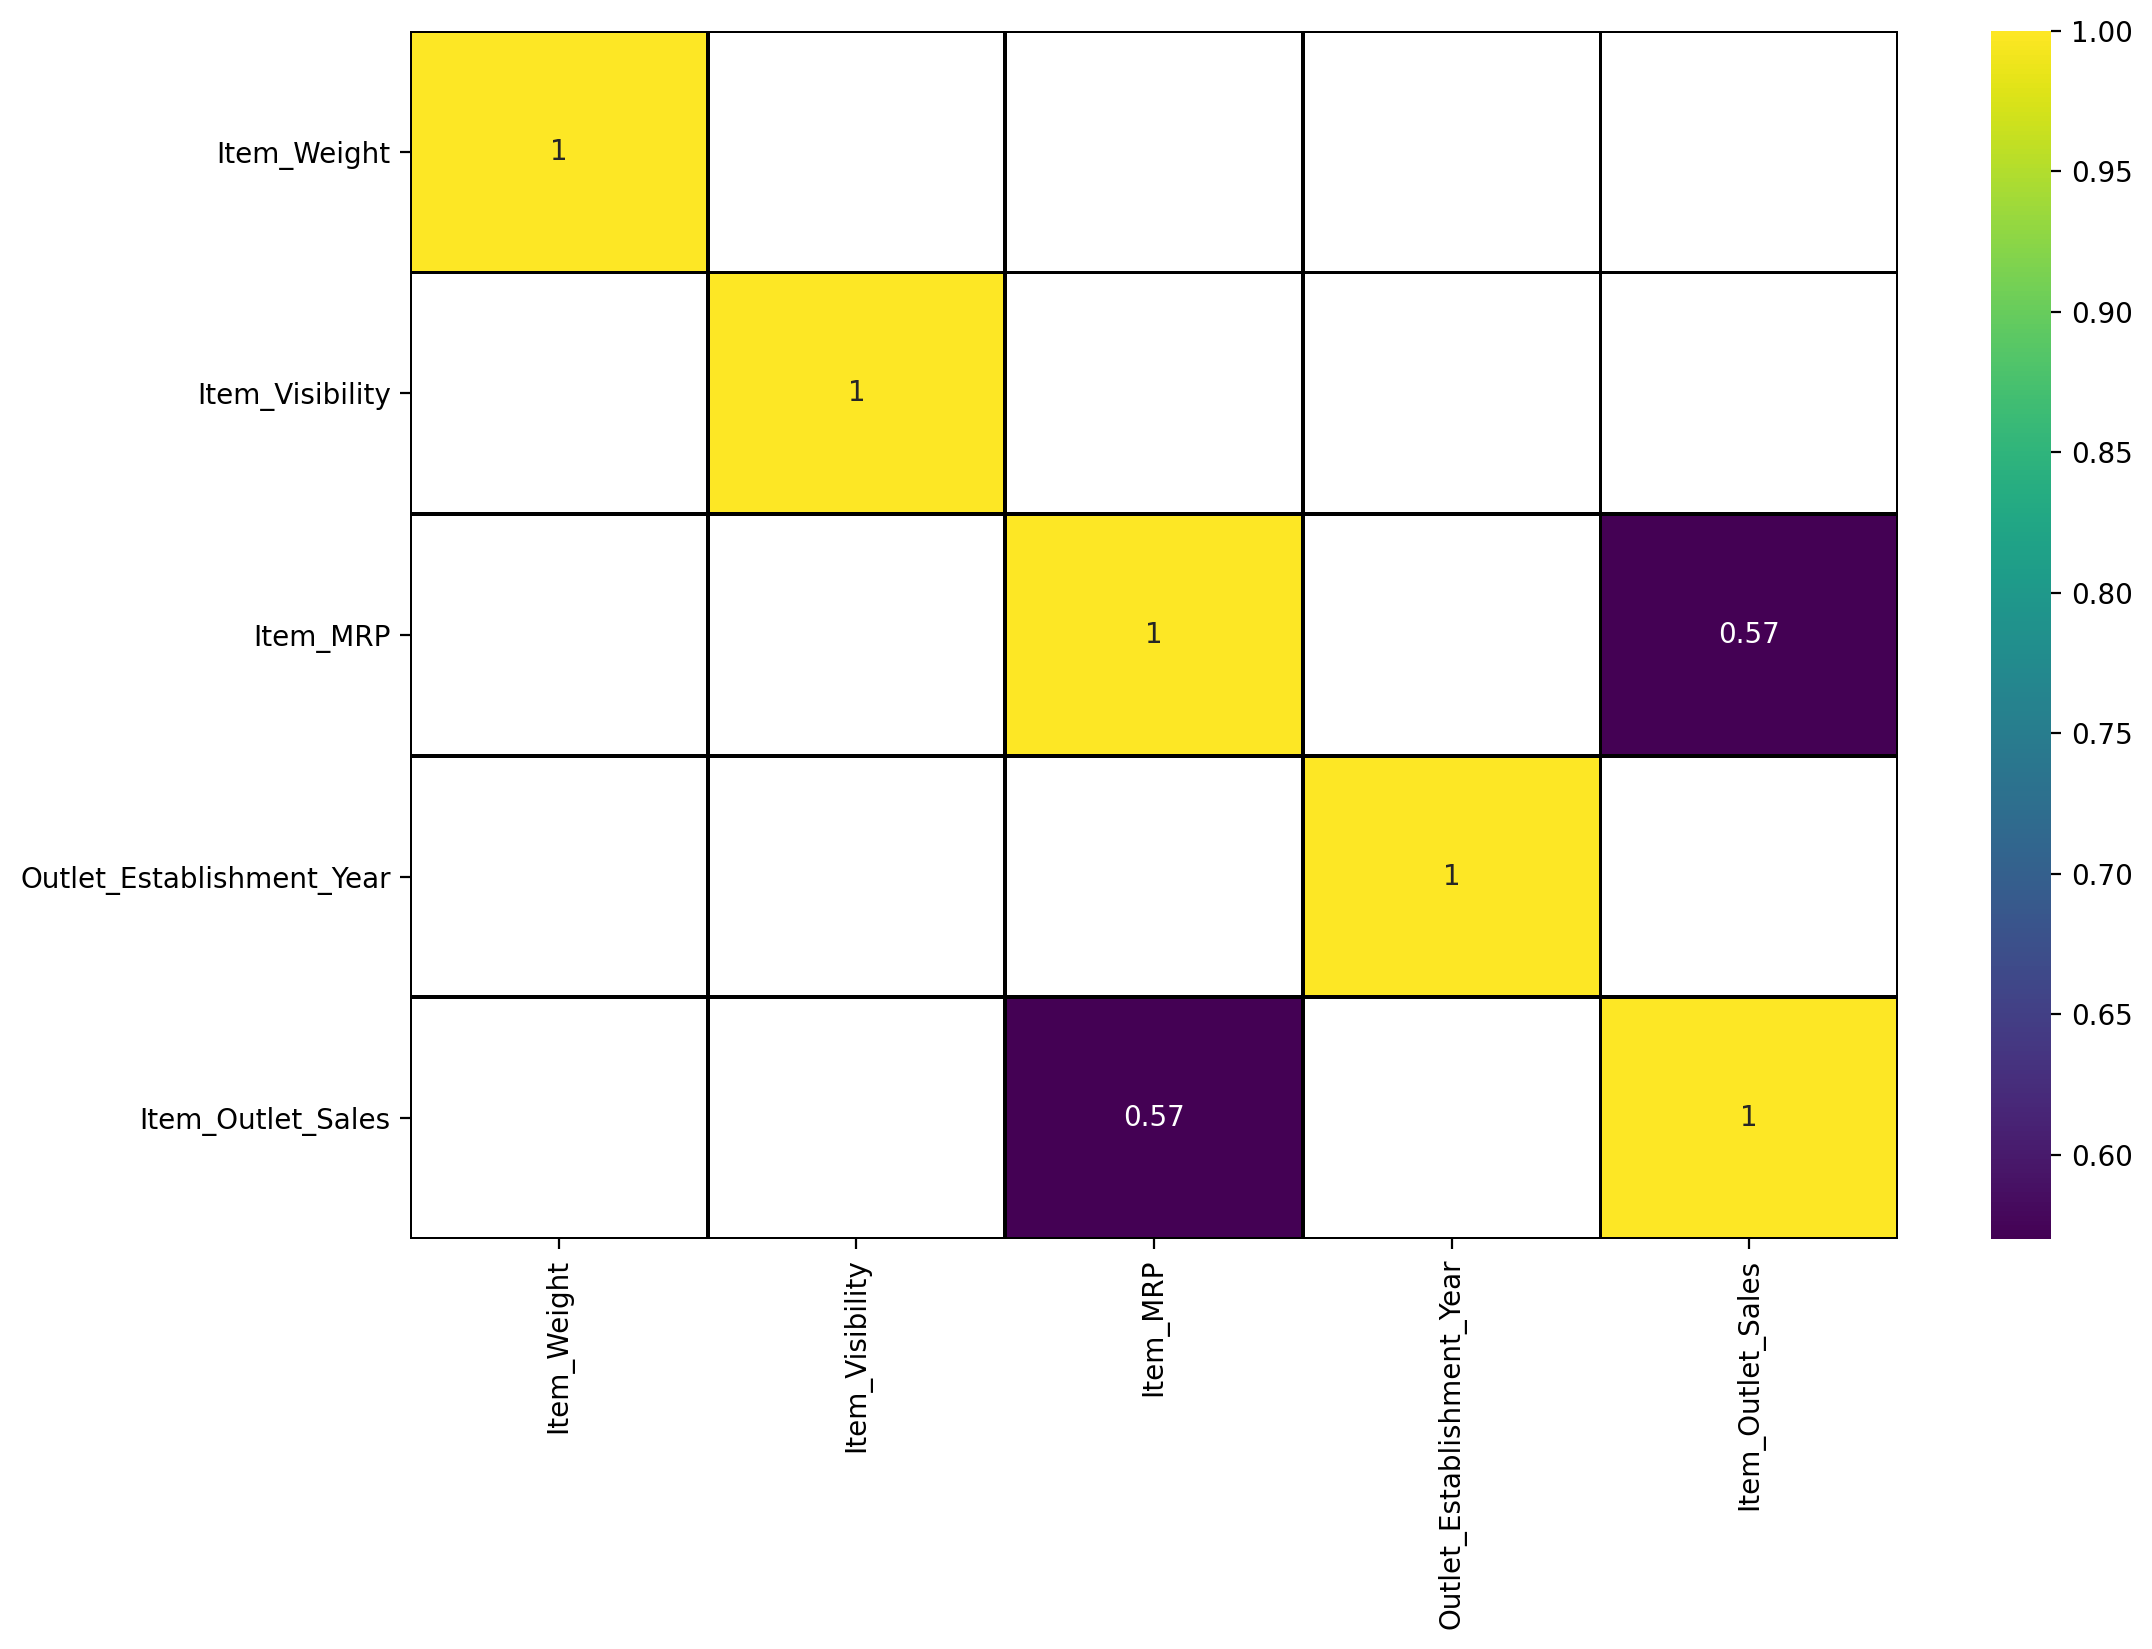

In [155]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dfc_strong_positive,cmap='viridis',annot=True,linecolor='black',linewidths=1)

THE 'ITEM_MRP' AND 'ITEM_OUTLET_SALES' HAS THE STRONG POSITIVE RELATIONSHIP.

In [156]:
#columns having strong negative correlation is denoted as dfc_strong_negative.
dfc_strong_negative=dfc[(dfc<-0.5)]
dfc_strong_negative

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,NaN,NaN,NaN,NaN,NaN
Item_Visibility,NaN,NaN,NaN,NaN,NaN
Item_MRP,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN
Item_Outlet_Sales,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

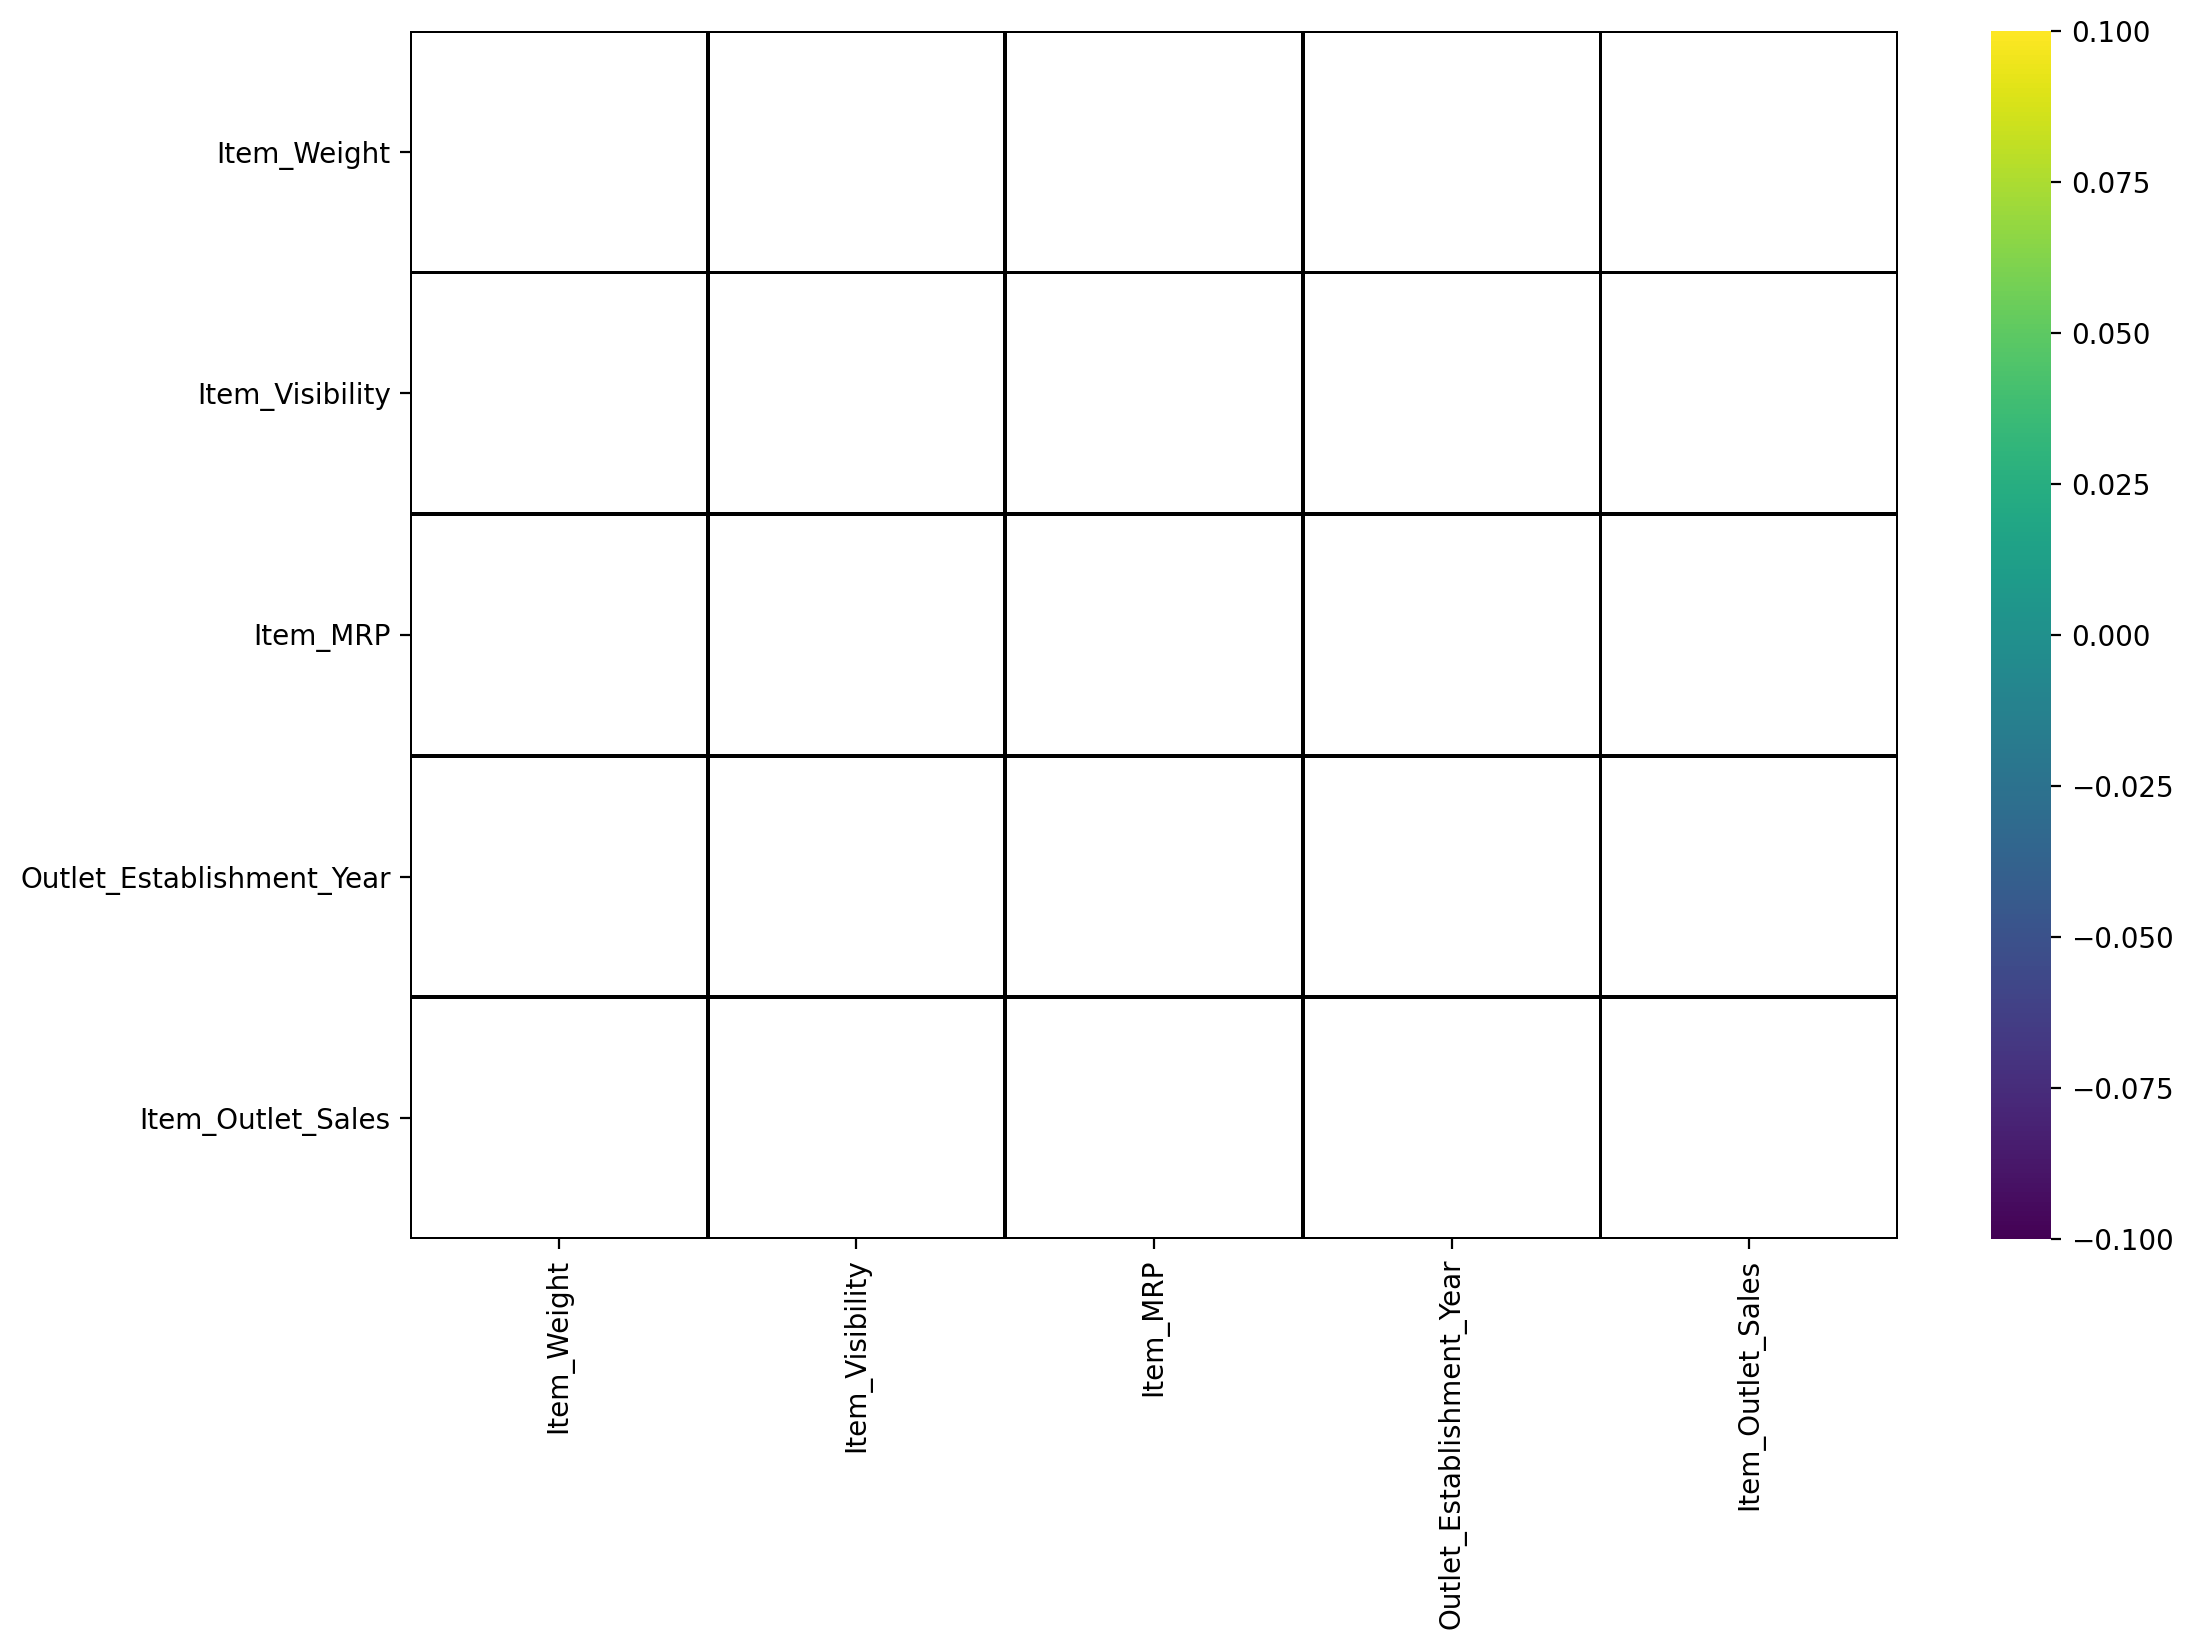

In [157]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dfc_strong_negative,cmap='viridis',annot=True,linecolor='black',linewidths=1)

THERE ARE NO VARIABLES HAVING STRONG NEGATIVE RELATIONSHIP BETWEEN THEM IN THE DATASET.

## CORRELATION IS USED TO DETERMINE THE RELATIONSHIP BETWEEN THE NUMERICAL VARIABLES OF THE DATASET.

### CHI-SQUARE TEST IS USED TO DETERMINE THE RELATIONSHIP BETWEEN THE CATEGORICAL VARIABLES OF THE DATASET

The Chi-square test of independence tests if there is a significant relationship between two categorical variables. The test is comparing the observed observations to the expected observations.

The null and alternative hyphothesis needs to be assumed. The H0 (Null Hypothesis): There is no relationship between variable one and variable two.

The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.

If the p-value is significant, you can reject the null hypothesis and claim that the findings support the alternative hypothesis.

In [158]:
from scipy.stats import chi2_contingency
def chi_square_results(x,y):
    nl='\n'
    crosstable=pd.crosstab(x,y,margins=True)
    chi2, p, dof, expected = chi2_contingency(crosstable)
    significant_value = 0.05
    print('chi2 value :',chi2)
    print('p-value :',p)
    print('Degrees of freedom :',dof)
    print('expected :',expected)
    #the significant value is 0.05
    print('significant_value :',significant_value)
    if p>significant_value:
        print('NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS')
    elif p<significant_value:
        print('ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS')
    else:
        pass
    results=[chi2,p,significant_value,dof]
    results_data=pd.DataFrame(list(zip(results)),index=['Chi2_value','P-value','significant_value',
                                                          'Degrees of freedom'],columns=['Analysis'])
    results_data
    results_data = results_data.transpose()
    results_data['Relationship between variables:YES or NO'] = np.where(results_data['P-value']> results_data['significant_value'], 0, 1)
    print(results_data)
    pd.DataFrame(results_data)
    return results_data

### FOR RELATIONSHIP STATUS:'YES', THE VALUE IS 1 AND FOR RELATIONSHIP STATUS: 'NO',THE VALUE IS 0.

In [159]:
catcols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [160]:
chi_square_results(df['Item_Fat_Content'],df['Item_Type'])

chi2 value : 1555.2321723869677
p-value : 5.47267141871545e-272
Degrees of freedom : 80
expected : [[2.40253432e+01 9.30611287e+00 4.07837616e+00 2.40624193e+01
  2.52859322e+01 3.17371817e+01 4.56778130e+01 7.93429544e+00
  1.92795964e+01 3.37392937e+01 1.57573624e+01 6.26586883e+00
  2.37287340e+00 4.44913763e+01 1.64988854e+01 5.48726974e+00
  3.16000000e+02]
 [3.86914467e+02 1.49869647e+02 6.56799249e+01 3.87511557e+02
  4.07215534e+02 5.11109234e+02 7.35615159e+02 1.27777308e+02
  3.10486918e+02 5.43352106e+02 2.53763346e+02 1.00908248e+02
  3.82137745e+01 7.16508272e+02 2.65705151e+02 8.83693535e+01
  5.08900000e+03]
 [2.19649419e+02 8.50802534e+01 3.72861668e+01 2.19988384e+02
  2.31174234e+02 2.90154171e+02 4.17605069e+02 7.25385428e+01
  1.76261880e+02 3.08458289e+02 1.44060190e+02 5.72851109e+01
  2.16937698e+01 4.06758184e+02 1.50839493e+02 5.01668427e+01
  2.88900000e+03]
 [8.51531151e+00 3.29836912e+00 1.44550041e+00 8.52845242e+00
  8.96210255e+00 1.12486214e+01 1.6189604

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,1555.232172,5.472671e-272,0.05,80.0,1


In [161]:
chi_square_results(df['Item_Fat_Content'],df['Outlet_Identifier'])

chi2 value : 34.008730548169865
p-value : 0.9592547142533975
Degrees of freedom : 50
expected : [[2.05772615e+01 3.45549689e+01 3.43325120e+01 3.44066643e+01
  1.95762056e+01 3.46661973e+01 3.44808166e+01 3.44437405e+01
  3.44808166e+01 3.44808166e+01 3.16000000e+02]
 [3.31385076e+02 5.56488091e+02 5.52905550e+02 5.54099730e+02
  3.15263640e+02 5.58279362e+02 5.55293911e+02 5.54696820e+02
  5.55293911e+02 5.55293911e+02 5.08900000e+03]
 [1.88125660e+02 3.15915523e+02 3.13881732e+02 3.14559662e+02
  1.78973601e+02 3.16932418e+02 3.15237592e+02 3.14898627e+02
  3.15237592e+02 3.15237592e+02 2.88900000e+03]
 [7.29320662e+00 1.22473308e+01 1.21684853e+01 1.21947671e+01
  6.93840197e+00 1.22867535e+01 1.22210489e+01 1.22079080e+01
  1.22210489e+01 1.22210489e+01 1.12000000e+02]
 [7.61879620e+00 1.27940866e+01 1.27117212e+01 1.27391763e+01
  7.24815206e+00 1.28352693e+01 1.27666315e+01 1.27529039e+01
  1.27666315e+01 1.27666315e+01 1.17000000e+02]
 [5.55000000e+02 9.32000000e+02 9.26000000e+

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,34.008731,0.959255,0.05,50.0,0


In [162]:
chi_square_results(df['Item_Fat_Content'],df['Outlet_Size'])

chi2 value : 5.482265234386993
p-value : 0.9871957973198792
Degrees of freedom : 15
expected : [[  34.55496891  192.9071923    88.53783879  316.        ]
 [ 556.48809105 3106.6604482  1425.85146075 5089.        ]
 [ 315.9155227  1763.63569166  809.44878564 2889.        ]
 [  12.24733075   68.37216942   31.38049982  112.        ]
 [  12.79408659   71.42449842   32.78141499  117.        ]
 [ 932.         5203.         2388.         8523.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    5.482265  0.987196               0.05                15.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,5.482265,0.987196,0.05,15.0,0


In [163]:
chi_square_results(df['Item_Fat_Content'],df['Outlet_Location_Type'])

chi2 value : 3.144093691682434
p-value : 0.9994626865533973
Degrees of freedom : 15
expected : [[  88.53783879  103.25706911  124.2050921   316.        ]
 [1425.85146075 1662.89628065 2000.25225859 5089.        ]
 [ 809.44878564  944.01795143 1135.53326294 2889.        ]
 [  31.38049982   36.59744222   44.02205796  112.        ]
 [  32.78141499   38.2312566    45.98732841  117.        ]
 [2388.         2785.         3350.         8523.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    3.144094  0.999463               0.05                15.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,3.144094,0.999463,0.05,15.0,0


In [164]:
chi_square_results(df['Item_Fat_Content'],df['Outlet_Type'])

chi2 value : 12.462836195419104
p-value : 0.899225230387768
Degrees of freedom : 20
expected : [[  40.15346709  206.77367124   34.40666432   34.66619735  316.        ]
 [ 646.64871524 3329.97219289  554.09973014  558.27936173 5089.        ]
 [ 367.09926082 1890.40865892  314.55966209  316.93241816 2889.        ]
 [  14.23160859   73.28687082   12.1947671    12.28675349  112.        ]
 [  14.86694826   76.55860612   12.73917635   12.83526927  117.        ]
 [1083.         5577.          928.          935.         8523.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis   12.462836  0.899225               0.05                20.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,12.462836,0.899225,0.05,20.0,0


In [165]:
catcols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [166]:
chi_square_results(df['Item_Type'],df['Outlet_Identifier'])

chi2 value : 61.39798669710826
p-value : 0.9999999999999027
Degrees of freedom : 160
expected : [[4.21964097e+01 7.08595565e+01 7.04033791e+01 7.05554382e+01
  4.01436114e+01 7.10876452e+01 7.07074974e+01 7.06314678e+01
  7.07074974e+01 7.07074974e+01 6.48000000e+02]
 [1.63445970e+01 2.74471430e+01 2.72704447e+01 2.73293441e+01
  1.55494544e+01 2.75354922e+01 2.73882436e+01 2.73587939e+01
  2.73882436e+01 2.73882436e+01 2.51000000e+02]
 [7.16297078e+00 1.20286284e+01 1.19511909e+01 1.19770034e+01
  6.81450194e+00 1.20673472e+01 1.20028159e+01 1.19899097e+01
  1.20028159e+01 1.20028159e+01 1.10000000e+02]
 [4.22615276e+01 7.09689077e+01 7.05120263e+01 7.06643201e+01
  4.02055614e+01 7.11973484e+01 7.08166139e+01 7.07404670e+01
  7.08166139e+01 7.08166139e+01 6.49000000e+02]
 [4.44104189e+01 7.45774962e+01 7.40973836e+01 7.42574211e+01
  4.22499120e+01 7.48175525e+01 7.44174586e+01 7.43374399e+01
  7.44174586e+01 7.44174586e+01 6.82000000e+02]
 [5.57409363e+01 9.36045993e+01 9.30019946e+

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,61.397987,1.0,0.05,160.0,0


In [167]:
chi_square_results(df['Item_Type'],df['Outlet_Size'])

chi2 value : 12.68920576291762
p-value : 0.9999999316268202
Degrees of freedom : 48
expected : [[7.08595565e+01 3.95581837e+02 1.81558606e+02 6.48000000e+02]
 [2.74471430e+01 1.53226915e+02 7.03259416e+01 2.51000000e+02]
 [1.20286284e+01 6.71512378e+01 3.08201338e+01 1.10000000e+02]
 [7.09689077e+01 3.96192303e+02 1.81838789e+02 6.49000000e+02]
 [7.45774962e+01 4.16337675e+02 1.91084829e+02 6.82000000e+02]
 [9.36045993e+01 5.22558723e+02 2.39836677e+02 8.56000000e+02]
 [1.34720638e+02 7.52093864e+02 3.45185498e+02 1.23200000e+03]
 [2.34011498e+01 1.30639681e+02 5.99591693e+01 2.14000000e+02]
 [5.68626071e+01 3.17442215e+02 1.45695178e+02 5.20000000e+02]
 [9.95095624e+01 5.55523877e+02 2.54966561e+02 9.10000000e+02]
 [4.64742462e+01 2.59447964e+02 1.19077790e+02 4.25000000e+02]
 [1.84803473e+01 1.03168720e+02 4.73509328e+01 1.69000000e+02]
 [6.99847472e+00 3.90698111e+01 1.79317142e+01 6.40000000e+01]
 [1.31221401e+02 7.32558958e+02 3.36219641e+02 1.20000000e+03]
 [4.86612695e+01 2.7165

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,12.689206,1.0,0.05,48.0,0


In [168]:
chi_square_results(df['Item_Type'],df['Outlet_Location_Type'])

chi2 value : 13.325444358497318
p-value : 0.9999998363623619
Degrees of freedom : 48
expected : [[ 181.55860612  211.74234424  254.69904963  648.        ]
 [  70.32594157   82.01748211   98.65657632  251.        ]
 [  30.82013376   35.94391646   43.23594978  110.        ]
 [ 181.83878916  212.06910712  255.09210372  649.        ]
 [ 191.08482929  222.85228206  268.06288865  682.        ]
 [ 239.83667723  279.70902264  336.45430013  856.        ]
 [ 345.18549806  402.57186437  484.24263757 1232.        ]
 [  59.95916931   69.92725566   84.11357503  214.        ]
 [ 145.69517775  169.916696    204.38812625  520.        ]
 [ 254.96656107  297.354218    357.67922093  910.        ]
 [ 119.07778951  138.87422269  167.0479878   425.        ]
 [  47.35093277   55.2229262    66.42614103  169.        ]
 [  17.93171419   20.91282412   25.15546169   64.        ]
 [ 336.21964097  392.11545231  471.66490672 1200.        ]
 [ 124.68145019  145.40948023  174.90906958  445.        ]
 [  41.46708905   4

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,13.325444,1.0,0.05,48.0,0


In [169]:
chi_square_results(df['Item_Type'],df['Outlet_Type'])

chi2 value : 21.358383347922537
p-value : 0.9999998947532984
Degrees of freedom : 64
expected : [[8.23400211e+01 4.24016895e+02 7.05554382e+01 7.10876452e+01
  6.48000000e+02]
 [3.18940514e+01 1.64241112e+02 2.73293441e+01 2.75354922e+01
  2.51000000e+02]
 [1.39774727e+01 7.19781767e+01 1.19770034e+01 1.20673472e+01
  1.10000000e+02]
 [8.24670891e+01 4.24671243e+02 7.06643201e+01 7.11973484e+01
  6.49000000e+02]
 [8.66603309e+01 4.46264696e+02 7.42574211e+01 7.48175525e+01
  6.82000000e+02]
 [1.08770151e+02 5.60121084e+02 9.32028628e+01 9.39059017e+01
  8.56000000e+02]
 [1.56547694e+02 8.06155579e+02 1.34142438e+02 1.35154288e+02
  1.23200000e+03]
 [2.71925378e+01 1.40030271e+02 2.33007157e+01 2.34764754e+01
  2.14000000e+02]
 [6.60753256e+01 3.40260472e+02 5.66185615e+01 5.70456412e+01
  5.20000000e+02]
 [1.15631820e+02 5.95455825e+02 9.90824827e+01 9.98298721e+01
  9.10000000e+02]
 [5.40038719e+01 2.78097501e+02 4.62747859e+01 4.66238414e+01
  4.25000000e+02]
 [2.14744808e+01 1.10584

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,21.358383,1.0,0.05,64.0,0


In [170]:
catcols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [171]:
chi_square_results(df['Outlet_Identifier'],df['Outlet_Size'])

chi2 value : 17046.0
p-value : 0.0
Degrees of freedom : 30
expected : [[  60.68989792  338.80851813  155.50158395  555.        ]
 [ 101.91528804  568.95412413  261.13058782  932.        ]
 [ 101.25918104  565.29132934  259.44948962  926.        ]
 [ 101.47788337  566.51226094  260.00985568  928.        ]
 [  57.7374164   322.32594157  147.93664203  528.        ]
 [ 102.24334155  570.78552153  261.97113692  935.        ]
 [ 101.69658571  567.73319254  260.57022175  930.        ]
 [ 101.58723454  567.12272674  260.29003872  929.        ]
 [ 101.69658571  567.73319254  260.57022175  930.        ]
 [ 101.69658571  567.73319254  260.57022175  930.        ]
 [ 932.         5203.         2388.         8523.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis     17046.0      0.0               0.05                30.0   

        

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,17046.0,0.0,0.05,30.0,1


In [172]:
chi_square_results(df['Outlet_Identifier'],df['Outlet_Location_Type'])

chi2 value : 17046.0
p-value : 0.0
Degrees of freedom : 30
expected : [[ 155.50158395  181.35339669  218.14501936  555.        ]
 [ 261.13058782  304.54300129  366.32641089  932.        ]
 [ 259.44948962  302.58242403  363.96808635  926.        ]
 [ 260.00985568  303.23594978  364.75419453  928.        ]
 [ 147.93664203  172.53079901  207.53255896  528.        ]
 [ 261.97113692  305.52328992  367.50557315  935.        ]
 [ 260.57022175  303.88947554  365.54030271  930.        ]
 [ 260.29003872  303.56271266  365.14724862  929.        ]
 [ 260.57022175  303.88947554  365.54030271  930.        ]
 [ 260.57022175  303.88947554  365.54030271  930.        ]
 [2388.         2785.         3350.         8523.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis     17046.0      0.0               0.05                30.0   

        

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,17046.0,0.0,0.05,30.0,1


In [173]:
chi_square_results(df['Outlet_Identifier'],df['Outlet_Type'])

chi2 value : 25569.0
p-value : 0.0
Degrees of freedom : 40
expected : [[  70.52270327  363.1626188    60.42942626   60.88525167  555.        ]
 [ 118.42731433  609.85146075  101.47788337  102.24334155  932.        ]
 [ 117.66490672  605.92537839  100.82459228  101.58512261  926.        ]
 [ 117.91904259  607.23407251  101.04235598  101.80452892  928.        ]
 [  67.09186906  345.49524815   57.48961633   57.92326646  528.        ]
 [ 118.80851813  611.81450194  101.80452892  102.57245101  935.        ]
 [ 118.17317846  608.54276663  101.26011968  102.02393523  930.        ]
 [ 118.04611052  607.88841957  101.15123783  101.91423208  929.        ]
 [ 118.17317846  608.54276663  101.26011968  102.02393523  930.        ]
 [ 118.17317846  608.54276663  101.26011968  102.02393523  930.        ]
 [1083.         5577.          928.          935.         8523.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS

,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,25569.0,0.0,0.05,40.0,1


In [174]:
catcols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [175]:
chi_square_results(df['Outlet_Size'],df['Outlet_Location_Type'])

chi2 value : 3609.940183344779
p-value : 0.0
Degrees of freedom : 9
expected : [[ 261.13058782  304.54300129  366.32641089  932.        ]
 [1457.79232665 1700.14724862 2045.06042473 5203.        ]
 [ 669.07708553  780.30975009  938.61316438 2388.        ]
 [2388.         2785.         3350.         8523.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
           Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis  3609.940183      0.0               0.05                 9.0   

          Relationship between variables:YES or NO  
Analysis                                         1  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,3609.940183,0.0,0.05,9.0,1


In [176]:
chi_square_results(df['Outlet_Size'],df['Outlet_Type'])

chi2 value : 1829.9543018584493
p-value : 0.0
Degrees of freedom : 12
expected : [[ 118.42731433  609.85146075  101.47788337  102.24334155  932.        ]
 [ 661.1344597  3404.56775783  566.51226094  570.78552153 5203.        ]
 [ 303.43822598 1562.58078141  260.00985568  261.97113692 2388.        ]
 [1083.         5577.          928.          935.         8523.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
           Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis  1829.954302      0.0               0.05                12.0   

          Relationship between variables:YES or NO  
Analysis                                         1  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,1829.954302,0.0,0.05,12.0,1


In [177]:
chi_square_results(df['Outlet_Location_Type'],df['Outlet_Type'])

chi2 value : 4725.606588766826
p-value : 0.0
Degrees of freedom : 12
expected : [[ 303.43822598 1562.58078141  260.00985568  261.97113692 2388.        ]
 [ 353.88419571 1822.35656459  303.23594978  305.52328992 2785.        ]
 [ 425.67757832 2192.062654    364.75419453  367.50557315 3350.        ]
 [1083.         5577.          928.          935.         8523.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
           Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis  4725.606589      0.0               0.05                12.0   

          Relationship between variables:YES or NO  
Analysis                                         1  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,4725.606589,0.0,0.05,12.0,1


In [178]:
catcols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [179]:
arr = np.arange(36).reshape(6,6)
for i in range(len(catcols)):
    for j in range(len(catcols)):
        arr[i][j] = chi_square_results(df[catcols[i]],df[catcols[j]])['Relationship between variables:YES or NO'][0]
        

chi_square_matrix = pd.DataFrame(data = arr,index = catcols, columns = catcols)

chi2 value : 34092.0
p-value : 0.0
Degrees of freedom : 25
expected : [[1.17160624e+01 1.88680512e+02 1.07112988e+02 4.15252845e+00
  4.33790919e+00 3.16000000e+02]
 [1.88680512e+02 3.03859216e+03 1.72499366e+03 6.68741054e+01
  6.98595565e+01 5.08900000e+03]
 [1.07112988e+02 1.72499366e+03 9.79270327e+02 3.79640971e+01
  3.96589229e+01 2.88900000e+03]
 [4.15252845e+00 6.68741054e+01 3.79640971e+01 1.47178224e+00
  1.53748680e+00 1.12000000e+02]
 [4.33790919e+00 6.98595565e+01 3.96589229e+01 1.53748680e+00
  1.60612460e+00 1.17000000e+02]
 [3.16000000e+02 5.08900000e+03 2.88900000e+03 1.12000000e+02
  1.17000000e+02 8.52300000e+03]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis     34092.0      0.0               0.05                25.0   

          Relationship between variables:YES or NO  
Analysis                          

expected : [[4.92671595e+01 1.90834213e+01 8.36325238e+00 4.93431890e+01
  5.18521647e+01 6.50813094e+01 9.36684266e+01 1.62703273e+01
  3.95353749e+01 6.91869060e+01 3.23125660e+01 1.28489968e+01
  4.86589229e+00 9.12354805e+01 3.38331573e+01 1.12523759e+01
  6.48000000e+02]
 [1.90834213e+01 7.39188079e+00 3.23946967e+00 1.91128711e+01
  2.00847120e+01 2.52089640e+01 3.62820603e+01 6.30224099e+00
  1.53138566e+01 2.67992491e+01 1.25161328e+01 4.97700340e+00
  1.88478235e+00 3.53396691e+01 1.31051273e+01 4.35855919e+00
  2.51000000e+02]
 [8.36325238e+00 3.23946967e+00 1.41968790e+00 8.37615863e+00
  8.80206500e+00 1.10477531e+01 1.59005045e+01 2.76193828e+00
  6.71125191e+00 1.17446908e+01 5.48515781e+00 2.18115687e+00
  8.26000235e-01 1.54875044e+01 5.74328288e+00 1.91012554e+00
  1.10000000e+02]
 [4.93431890e+01 1.91128711e+01 8.37615863e+00 4.94193359e+01
  5.19321835e+01 6.51817435e+01 9.38129767e+01 1.62954359e+01
  3.95963862e+01 6.92936759e+01 3.23624311e+01 1.28688255e+01
  4.8

          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis   12.689206      1.0               0.05                48.0   

          Relationship between variables:YES or NO  
Analysis                                         0  
chi2 value : 13.325444358497318
p-value : 0.9999998363623619
Degrees of freedom : 48
expected : [[ 181.55860612  211.74234424  254.69904963  648.        ]
 [  70.32594157   82.01748211   98.65657632  251.        ]
 [  30.82013376   35.94391646   43.23594978  110.        ]
 [ 181.83878916  212.06910712  255.09210372  649.        ]
 [ 191.08482929  222.85228206  268.06288865  682.        ]
 [ 239.83667723  279.70902264  336.45430013  856.        ]
 [ 345.18549806  402.57186437  484.24263757 1232.        ]
 [  59.95916931   69.92725566   84.11357503  214.        ]
 [ 145.69517775  169.916696    204.38812625  520.        ]
 [ 254.96656107  297.354218    357.67922093  910.        ]
 [ 119.07778951  138.87422269  167.0479878   425.        ]
 [  

chi2 value : 76707.0
p-value : 0.0
Degrees of freedom : 100
expected : [[  36.14044351   60.68989792   60.29919043   60.42942626   34.38225977
    60.88525167   60.55966209   60.49454417   60.55966209   60.55966209
   555.        ]
 [  60.68989792  101.91528804  101.25918104  101.47788337   57.7374164
   102.24334155  101.69658571  101.58723454  101.69658571  101.69658571
   932.        ]
 [  60.29919043  101.25918104  100.6072979   100.82459228   57.3657163
   101.58512261  101.04188666  100.93323947  101.04188666  101.04188666
   926.        ]
 [  60.42942626  101.47788337  100.82459228  101.04235598   57.48961633
   101.80452892  101.26011968  101.15123783  101.26011968  101.26011968
   928.        ]
 [  34.38225977   57.7374164    57.3657163    57.48961633   32.70960929
    57.92326646   57.61351637   57.55156635   57.61351637   57.61351637
   528.        ]
 [  60.88525167  102.24334155  101.58512261  101.80452892   57.92326646
   102.57245101  102.02393523  101.91423208  102.02393

          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis     17046.0      0.0               0.05                 9.0   

          Relationship between variables:YES or NO  
Analysis                                         1  
chi2 value : 3609.940183344779
p-value : 0.0
Degrees of freedom : 9
expected : [[ 261.13058782  304.54300129  366.32641089  932.        ]
 [1457.79232665 1700.14724862 2045.06042473 5203.        ]
 [ 669.07708553  780.30975009  938.61316438 2388.        ]
 [2388.         2785.         3350.         8523.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
           Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis  3609.940183      0.0               0.05                 9.0   

          Relationship between variables:YES or NO  
Analysis                                         1  
chi2 value : 1829.9543018584493
p-value : 0.0
Degrees

chi2 value : 25569.0
p-value : 0.0
Degrees of freedom : 40
expected : [[  70.52270327  118.42731433  117.66490672  117.91904259   67.09186906
   118.80851813  118.17317846  118.04611052  118.17317846  118.17317846
  1083.        ]
 [ 363.1626188   609.85146075  605.92537839  607.23407251  345.49524815
   611.81450194  608.54276663  607.88841957  608.54276663  608.54276663
  5577.        ]
 [  60.42942626  101.47788337  100.82459228  101.04235598   57.48961633
   101.80452892  101.26011968  101.15123783  101.26011968  101.26011968
   928.        ]
 [  60.88525167  102.24334155  101.58512261  101.80452892   57.92326646
   102.57245101  102.02393523  101.91423208  102.02393523  102.02393523
   935.        ]
 [ 555.          932.          926.          928.          528.
   935.          930.          929.          930.          930.
  8523.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi

<AxesSubplot:>

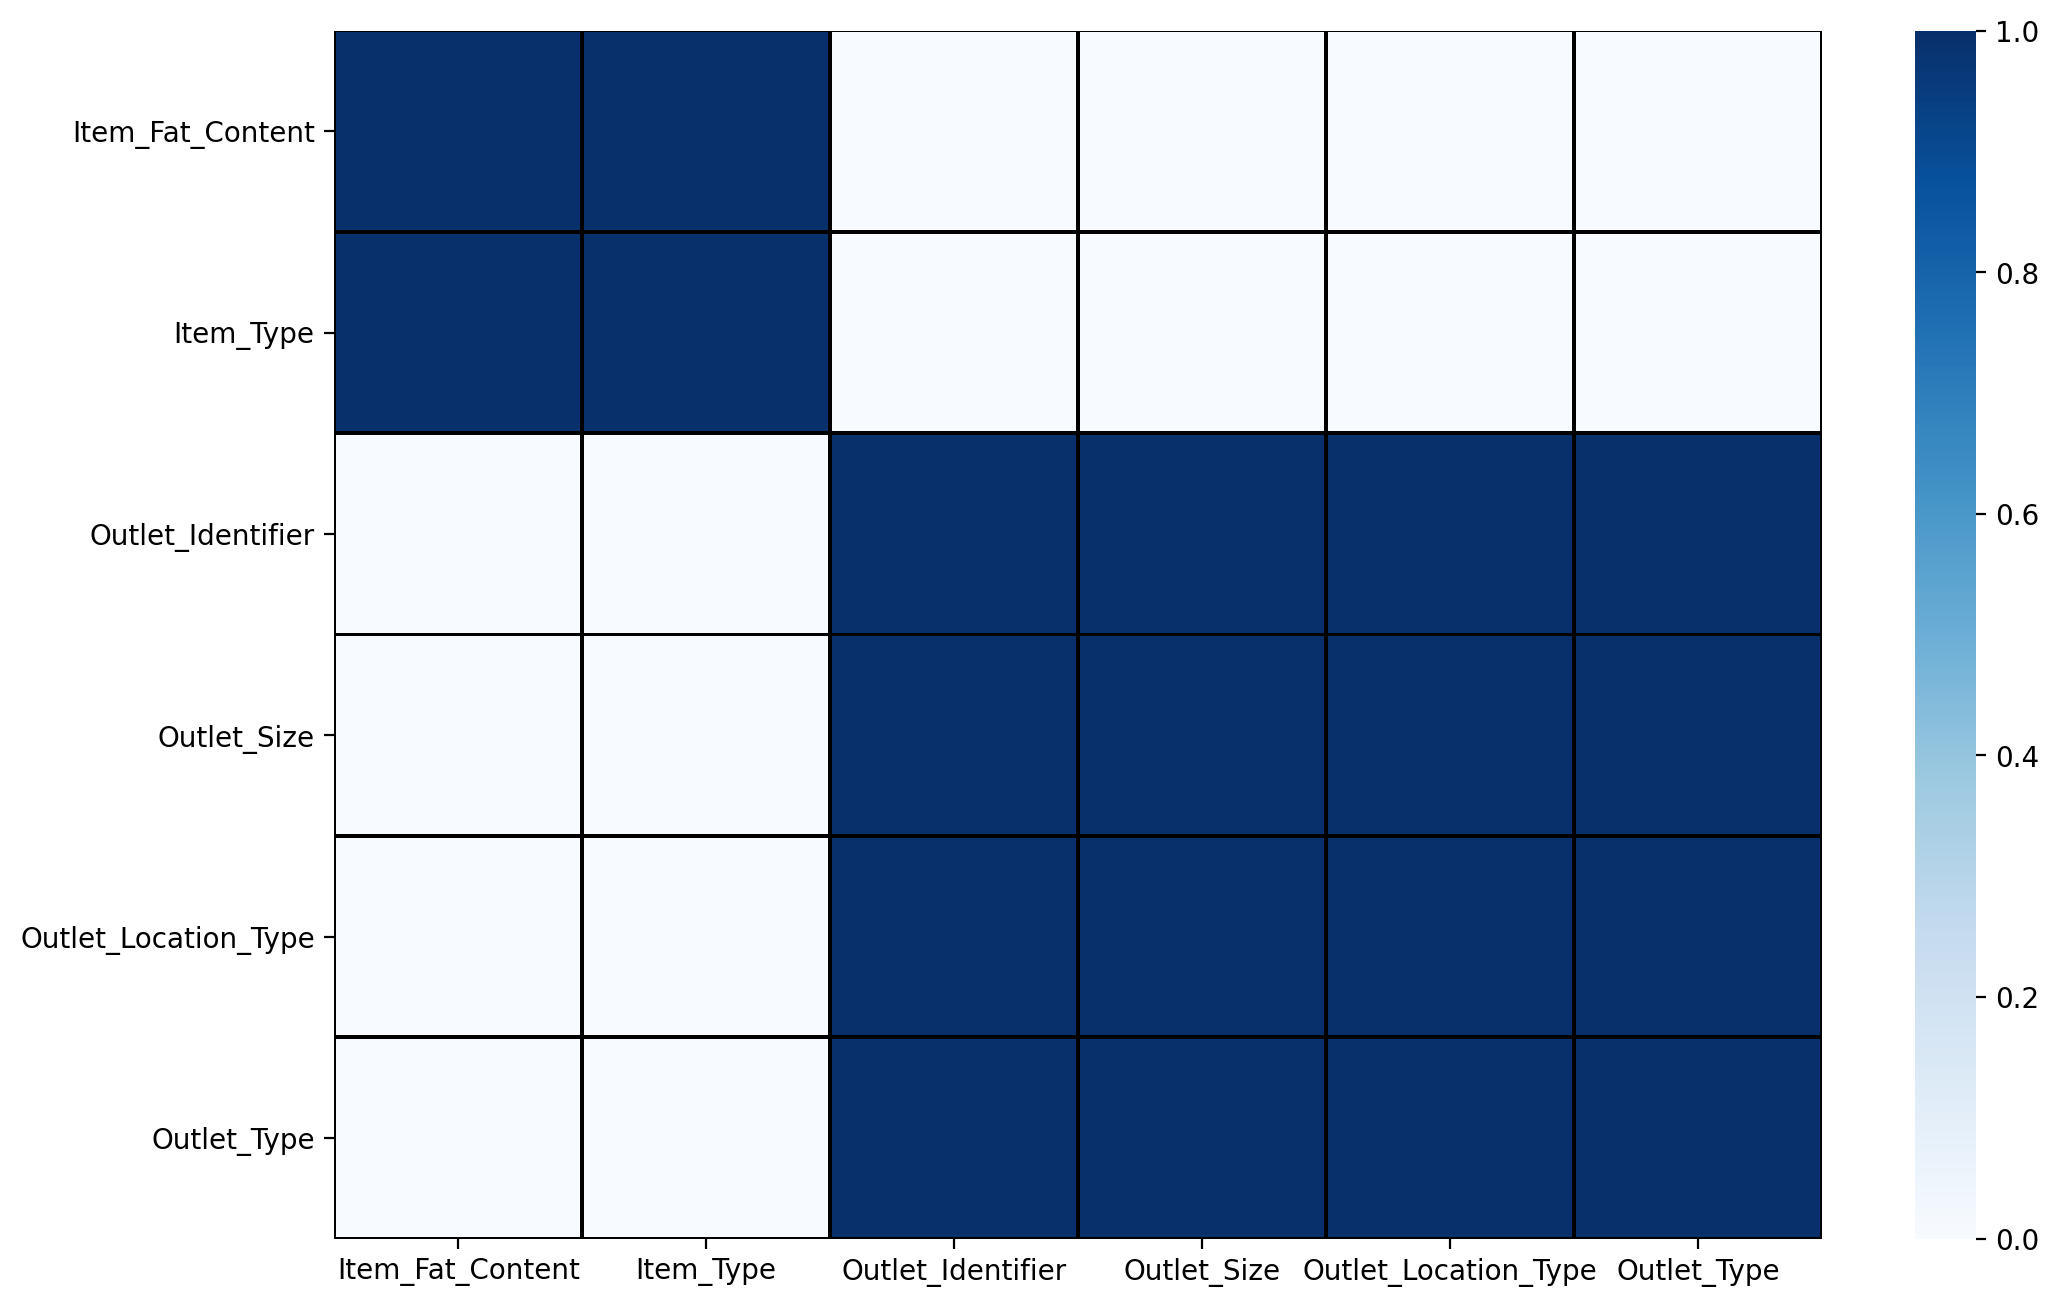

In [180]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(chi_square_matrix,linecolor='black',linewidths=1,cmap='Blues')

As shown in the above heatmap figure,the 'blue' colour shows the relationship status to be 'yes'or (1),whereas the 'white' colour shows the relationship status to be 'no'or (0) between the variables of the dataset.

## ENCODING:-

In [181]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [182]:
catcols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [183]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])

ENCODED THE CATEGORICAL FEATURES AND OBJECT DATATYPE COLUMNS OF THE DATASET.

In [184]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


## OUTLIERS DETECTION AND REMOVAL:-

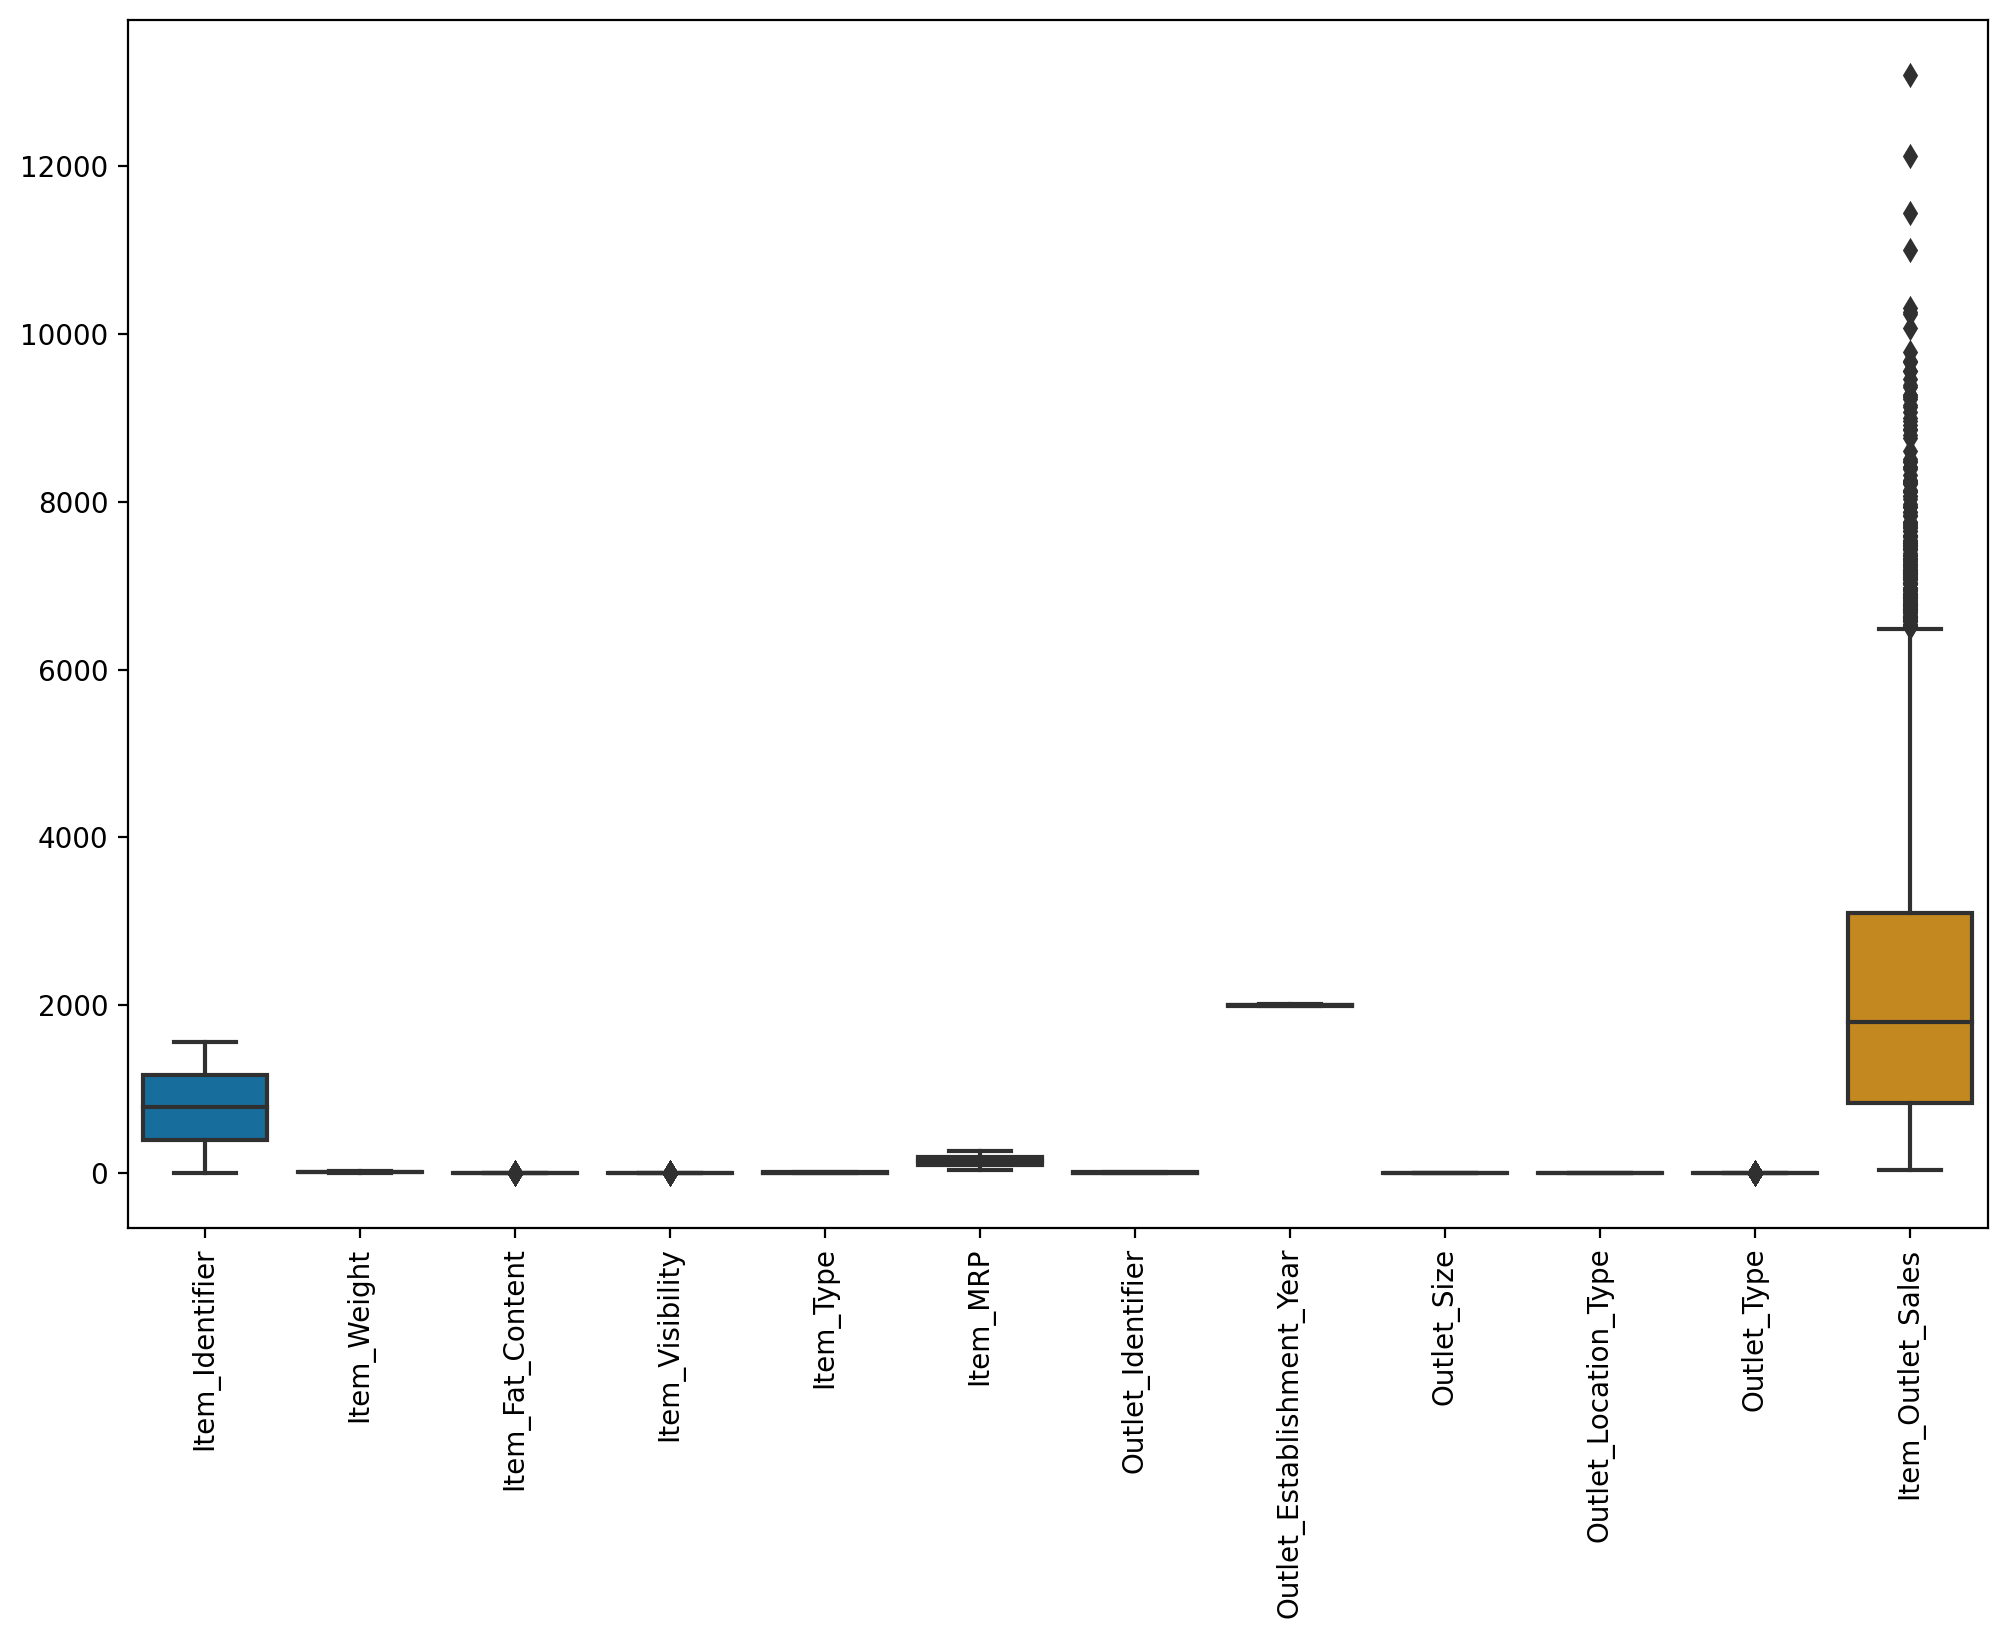

In [185]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(data=df,palette='colorblind')
plt.xticks(rotation=90);

There are some outliers present in the dataset shown by boxplot denoted by 'black diamonds'.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [187]:
#Outliers Removal:-ZSCORE METHOD
from scipy.stats import zscore
threshold=3
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
print(dfn.shape)
print(df.shape)

(8222, 12)
(8523, 12)


In [188]:
#Outliers Removal:-IQR METHOD
from scipy import stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape


(5419, 12)

In [189]:
8222/8523*100

96.46837967851695

BY REMOVING OUTLIERS USING IQR METHOD, MORE THAN 3000 ROWS OF THE DATA ARE REMOVED AND USING ZCSORE METHOD,WE LOOSE AROUND 4% OF  THE DATA. 

In [190]:
dfn

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [191]:
dfn= dfn.reset_index(drop=True)
dfn

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8218,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8219,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8220,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


SKEWNESS REMOVAL:-

In [192]:
numericols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [193]:
dfn.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [194]:
skew_new = dfn.skew()
skew_new

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [195]:
skew_new = skew_new.reset_index()
skew_new

,index,0
0,Item_Identifier,-0.011945
1,Item_Weight,0.087821
2,Item_Fat_Content,0.291106
3,Item_Visibility,0.794506
4,Item_Type,0.094578
5,Item_MRP,0.139153
6,Outlet_Identifier,-0.067611
7,Outlet_Establishment_Year,-0.420927
8,Outlet_Size,-0.089519
9,Outlet_Location_Type,-0.202794


In [196]:
skew_new.rename(columns={'index':'column_names',0:'skewness'},inplace= True)
skew_new

,column_names,skewness
0,Item_Identifier,-0.011945
1,Item_Weight,0.087821
2,Item_Fat_Content,0.291106
3,Item_Visibility,0.794506
4,Item_Type,0.094578
5,Item_MRP,0.139153
6,Outlet_Identifier,-0.067611
7,Outlet_Establishment_Year,-0.420927
8,Outlet_Size,-0.089519
9,Outlet_Location_Type,-0.202794


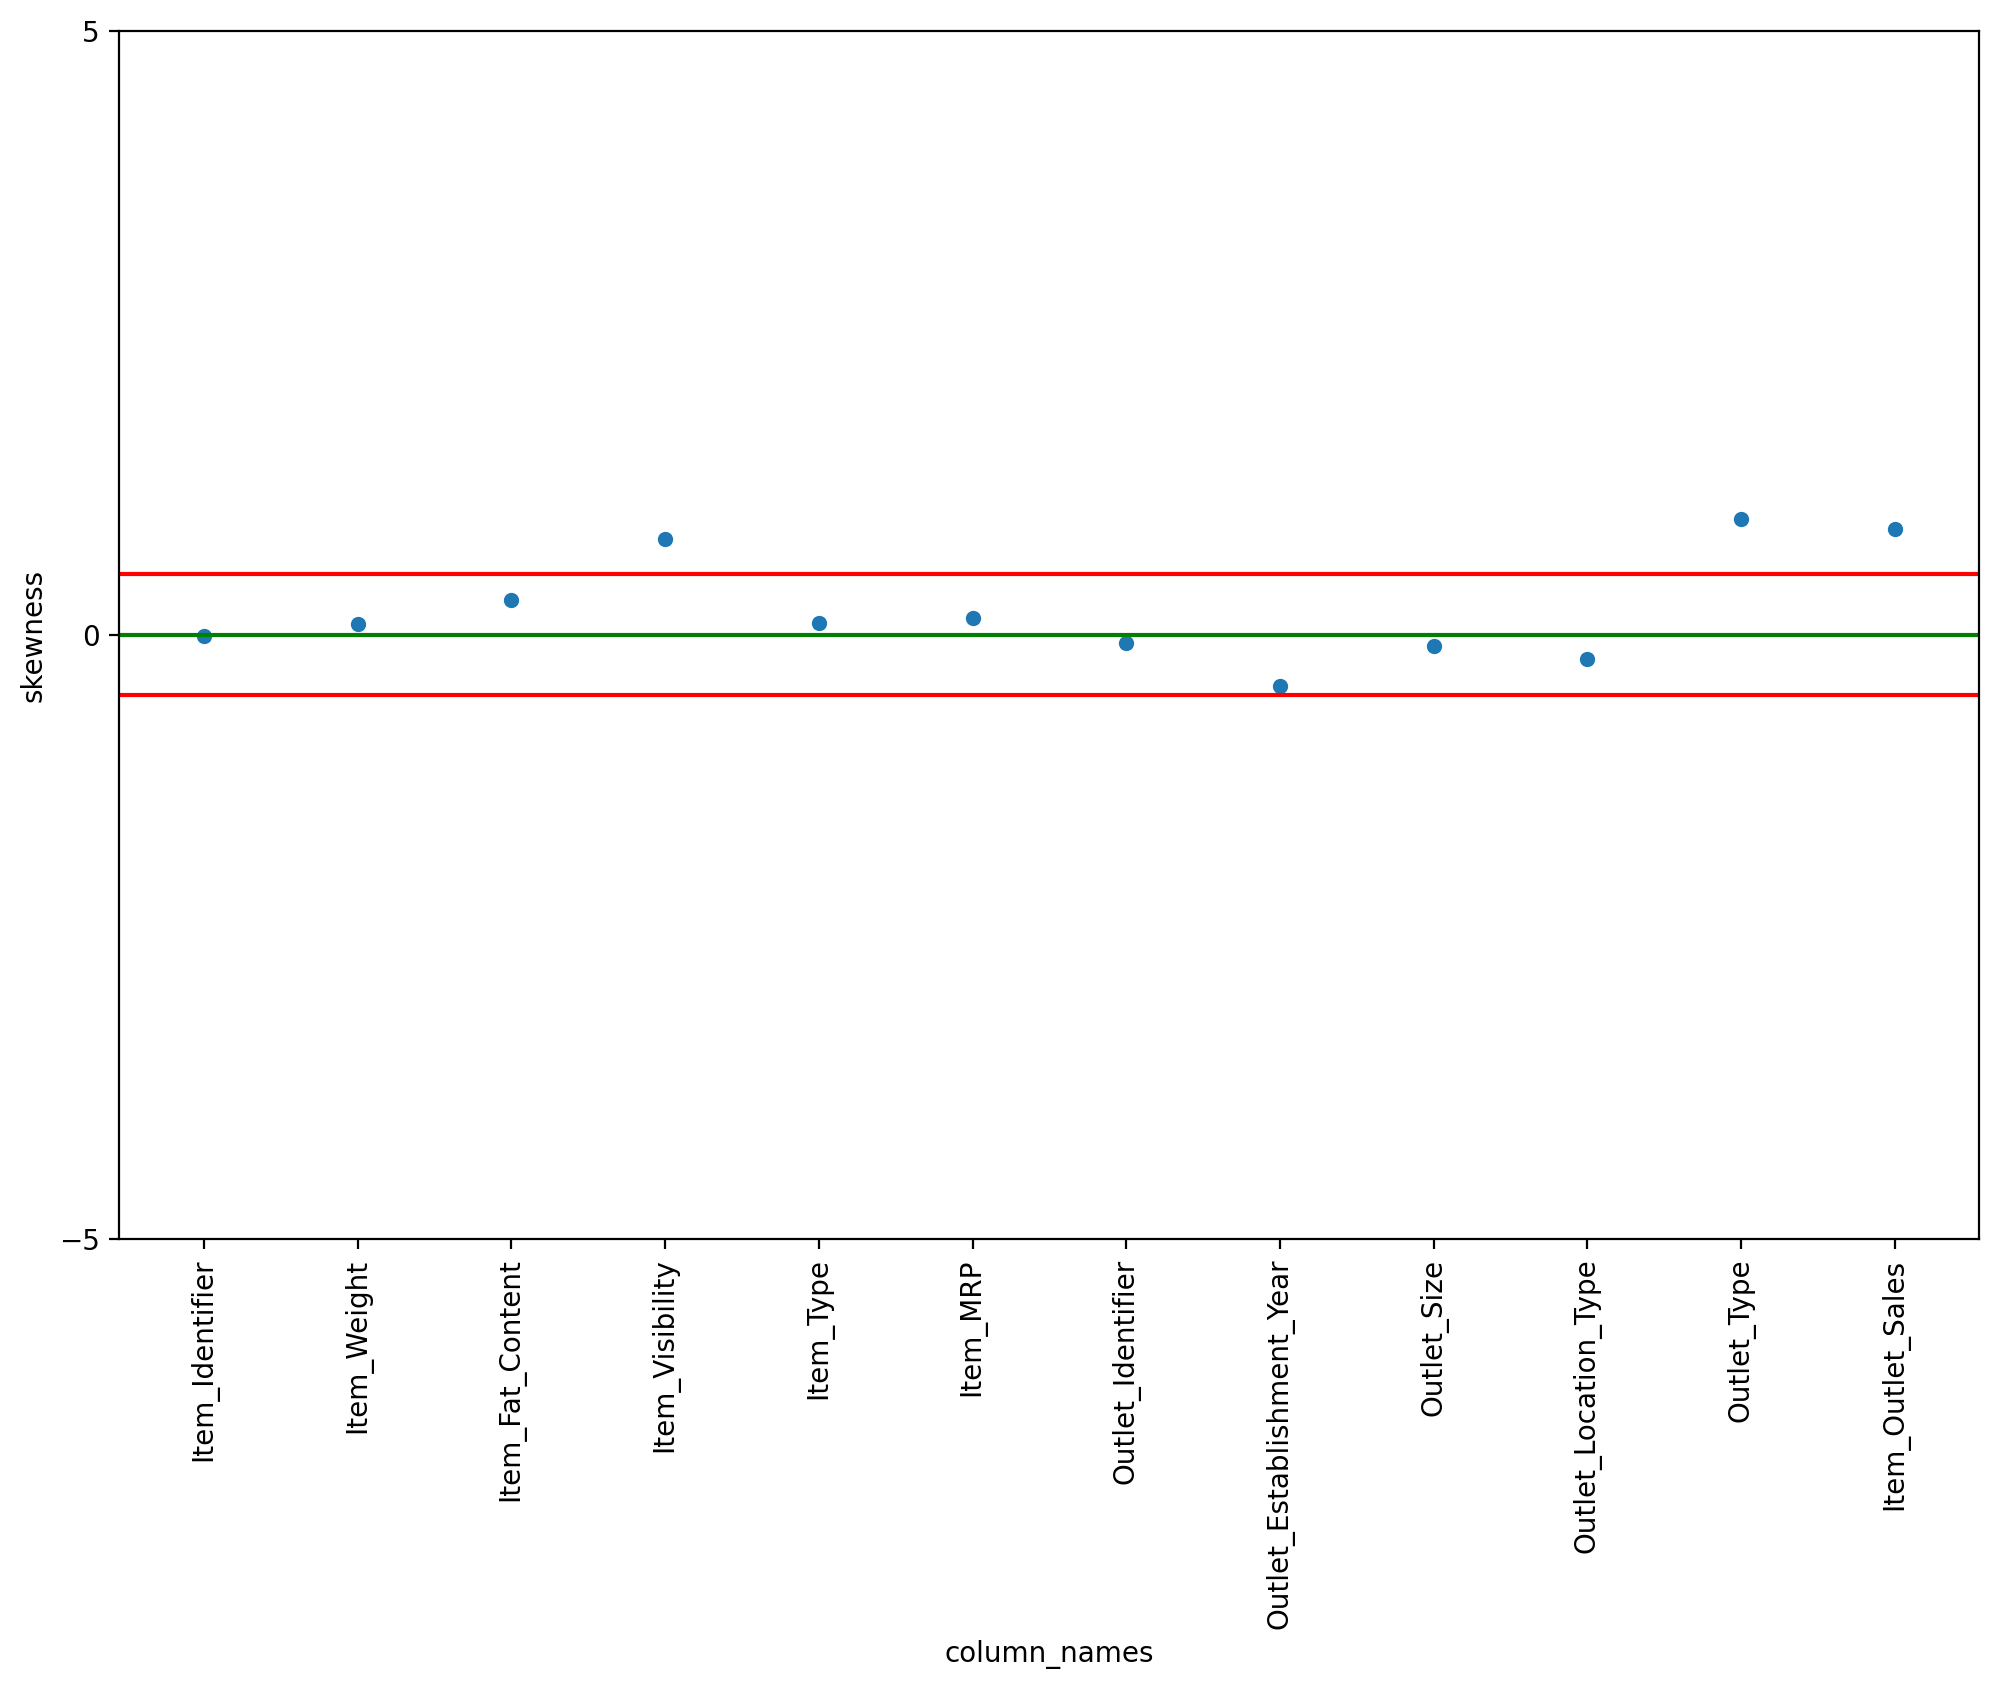

In [197]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skew_new,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 10, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

In [198]:
dfn['Item_Visibility']=np.sqrt(dfn['Item_Visibility'])
dfn['Item_Outlet_Sales']=np.sqrt(dfn['Item_Outlet_Sales'])

In [199]:
dfn.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility             -0.244803
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.111301
dtype: float64

In [200]:
skewness_after_adjustment = dfn.skew()

In [201]:
skewness_after_adjustment=skewness_after_adjustment.reset_index()
skewness_after_adjustment.rename(columns={'index':'column_names',0:'skewness'},inplace= True)
skewness_after_adjustment

,column_names,skewness
0,Item_Identifier,-0.011945
1,Item_Weight,0.087821
2,Item_Fat_Content,0.291106
3,Item_Visibility,-0.244803
4,Item_Type,0.094578
5,Item_MRP,0.139153
6,Outlet_Identifier,-0.067611
7,Outlet_Establishment_Year,-0.420927
8,Outlet_Size,-0.089519
9,Outlet_Location_Type,-0.202794


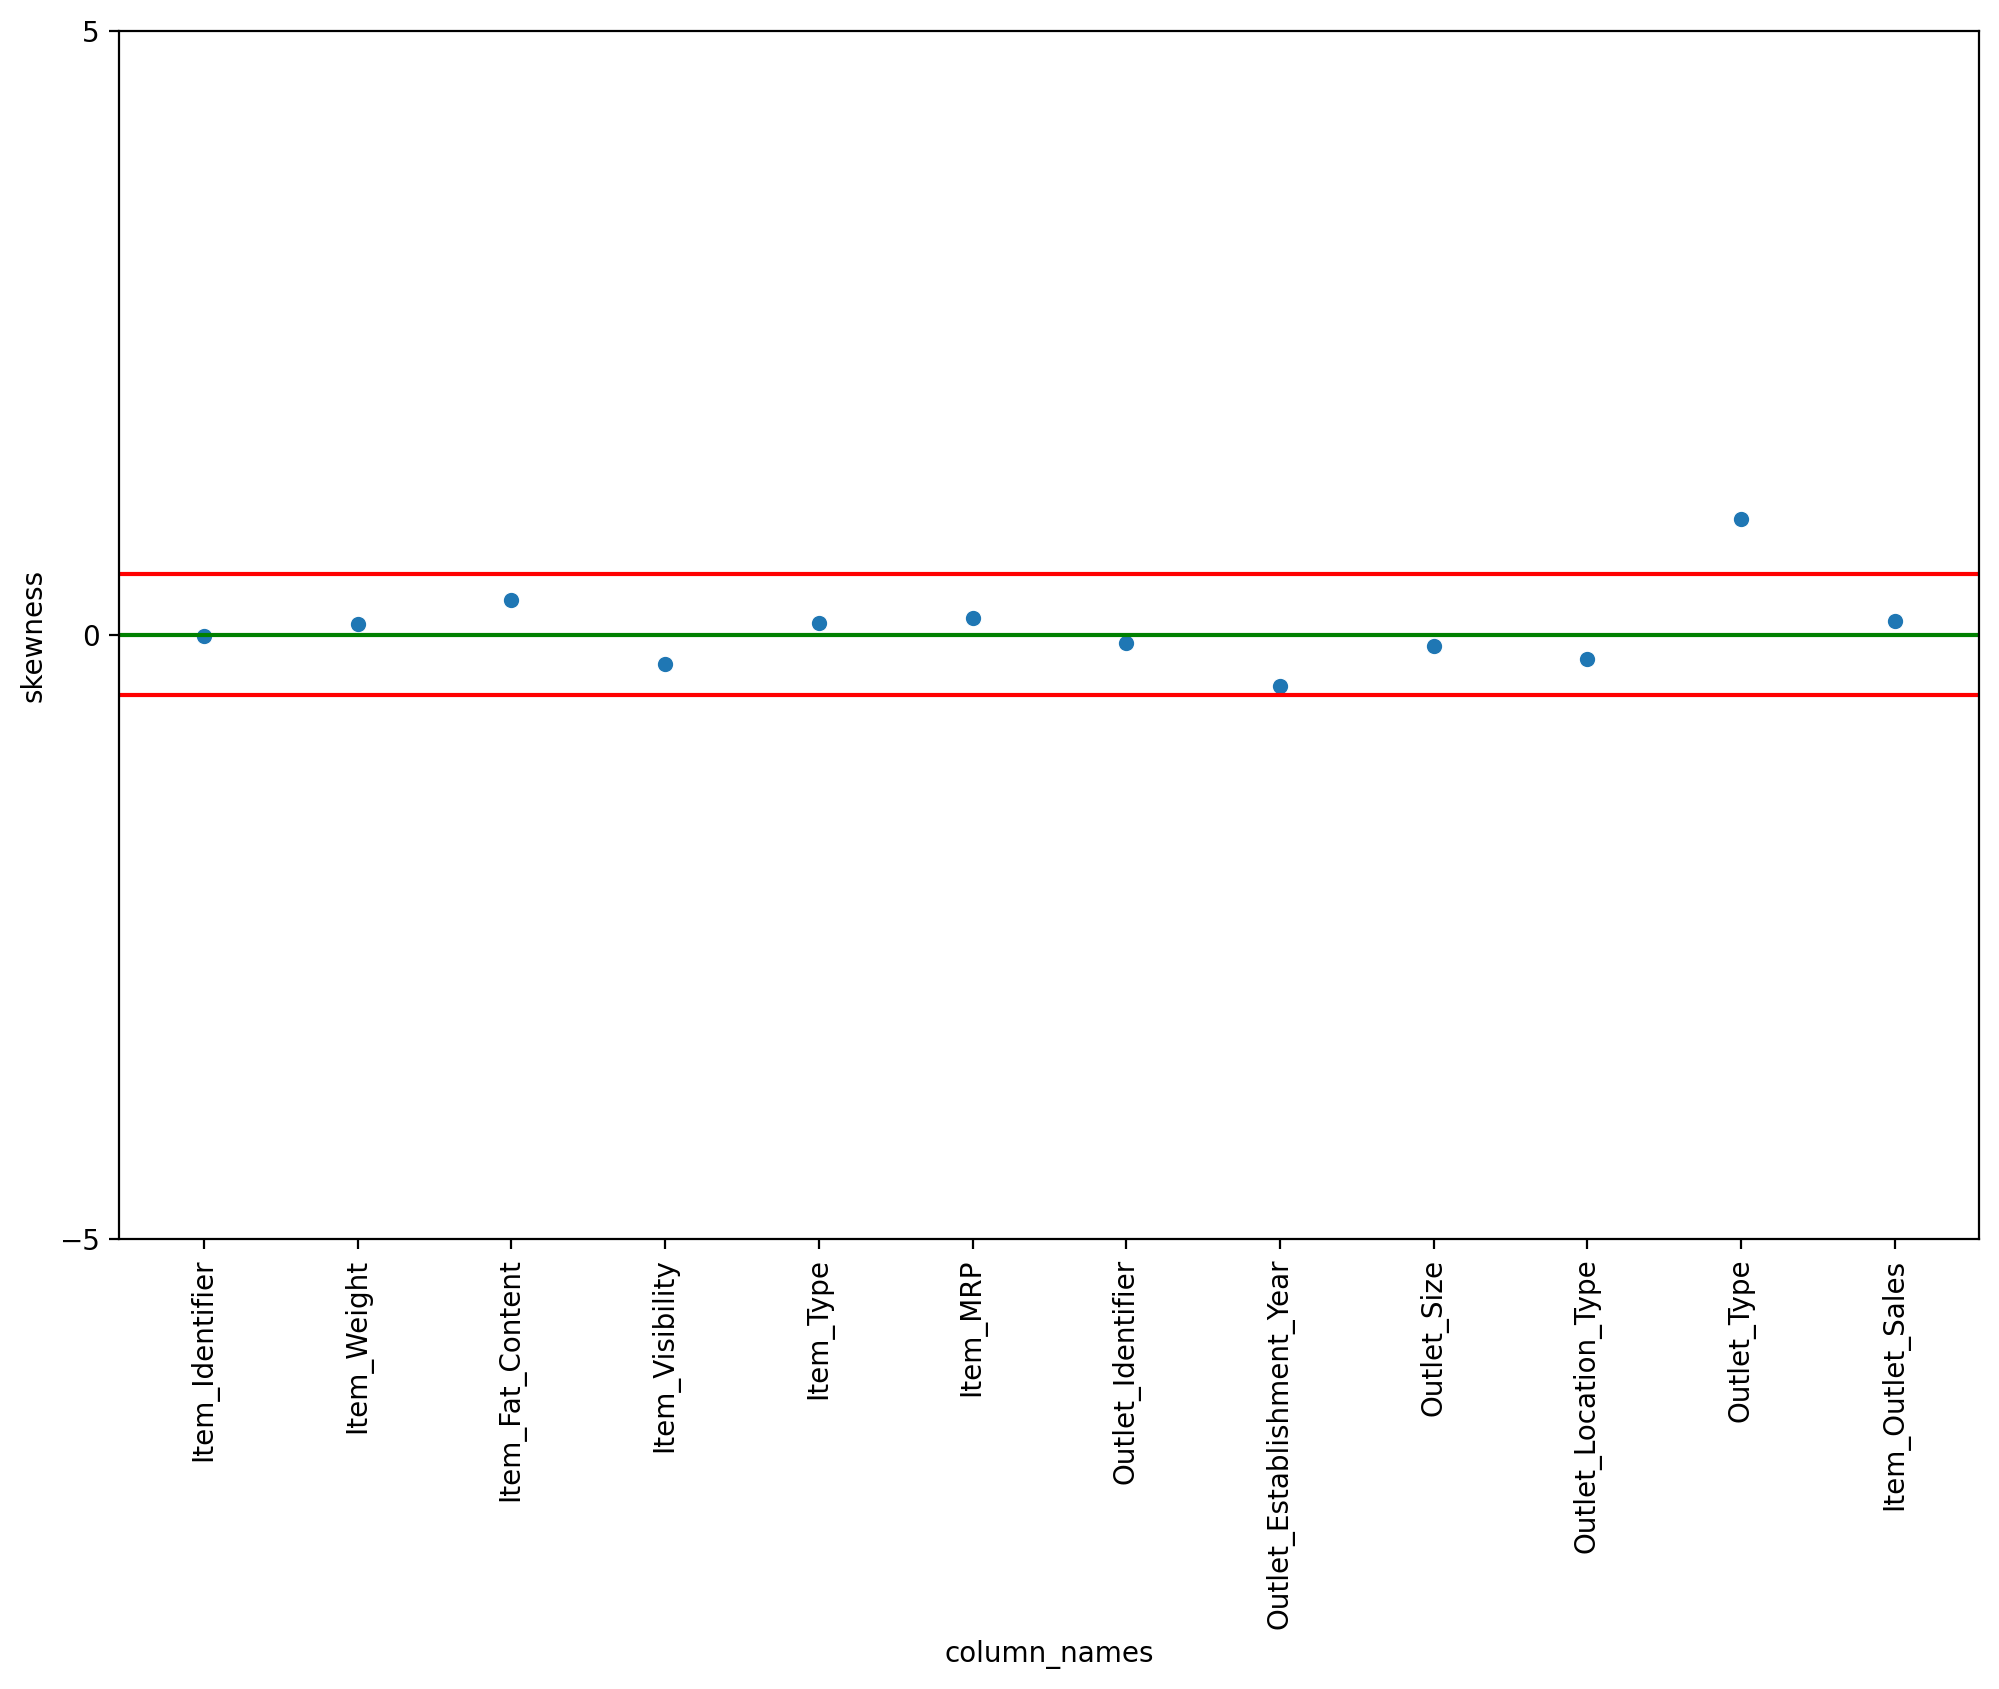

In [202]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skewness_after_adjustment,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 10, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

In [203]:
#list of categorical columns:-
catcols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [204]:
#list of numerical columns:-
numericols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

REMOVED  EXCESS SKEWNESS FOR THE TWO NUMERICAL COLUMNS BUT SKEWNESS IS NOT REQUIRED FOR CATEGORICAL COLUMNS SUCH AS OUTLET TYPE.

REMOVAL OF SKEWNESS IS NECESSARY FOR EFFECTIVE MODEL PERFORMANCE.

In [205]:
dfn.shape

(8222, 12)

In [206]:
#seperating the target lable and features:-
X=dfn.drop('Item_Outlet_Sales',axis=1) 
y=dfn['Item_Outlet_Sales']

SEPERATED THE TRAINING DATA INTO X AND y.

## MACHINE LEARNING PROCESS:-¶

### Importing the necessary models for regression tasks and cross validation:-

In [207]:
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

In [208]:
min_squared_error = 0
max_random_state = 0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model=DecisionTreeRegressor()
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test,pred))
    if root_mean_squared_error<min_squared_error:
        min_squared_error=root_mean_squared_error
        max_random_state=i
        
print('lowest error is: ',min_squared_error,' on random_state ',max_random_state)

lowest error is:  0  on random_state  0


In [209]:
en = ElasticNet()
dtr = DecisionTreeRegressor(random_state=0)
knr = KNeighborsRegressor()
rfr = RandomForestRegressor(random_state=0)
ar = AdaBoostRegressor(random_state=0)
gbr= GradientBoostingRegressor(random_state=0)
sr = SVR()
lgr=LGBMRegressor(random_state=0)


list2= [en,dtr,rfr,ar,gbr,sr,lgr]

In [210]:
#seperating the training data and test data:-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### SCALING AND STANDARDIZATION:-

In [211]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
sX_train = s.fit_transform(X_train)
sX_test = s.transform(X_test)

Only training data has been both fit and transformed but the test data has only been transformed. '.fit' means calculating necessary statistics from the data and '.transform' only scales the data. test data should not be fit because that would lead to assumption of the prior knowledge of the test data and test data is the data, machine learning model need to predict fairly without having any knowledge of the test data.

In [212]:
from sklearn.metrics import SCORERS
s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [213]:
for m in list2:
    m.fit(sX_train,y_train)
    preds = m.predict(sX_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    r2_SCORE=r2_score(y_test,preds)
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('R2_score: ',r2_SCORE)
    print('\n')
    print('cross validation scores below:--  ',m)
    print('root_mean_squared_error: ',cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('r2_score_cross_val_score: ',cross_val_score(m,X,y,cv=5,scoring='r2').mean())
    print('difference between model  RMSE score and cross validation score: ',-rmse-cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model  r2 score and cross validation  r2 score: ',r2_SCORE-cross_val_score(m,X,y,cv=5,scoring='r2').mean())
    print('\n')


ElasticNet()
Root_mean_squared_error:  12.806230112389176
R2_score:  0.4711696103974853


cross validation scores below:--   ElasticNet()
root_mean_squared_error:  -12.528454753548612
r2_score_cross_val_score:  0.4944259413259557
difference between model  RMSE score and cross validation score:  -0.2777753588405645
difference between model  r2 score and cross validation  r2 score:  -0.023256330928470403


DecisionTreeRegressor(random_state=0)
Root_mean_squared_error:  14.8927016689051
R2_score:  0.28481107401729666


cross validation scores below:--   DecisionTreeRegressor(random_state=0)
root_mean_squared_error:  -14.754760009675826
r2_score_cross_val_score:  0.2985564284840311
difference between model  RMSE score and cross validation score:  -0.13794165922927526
difference between model  r2 score and cross validation  r2 score:  -0.013745354466734416


RandomForestRegressor(random_state=0)
Root_mean_squared_error:  10.747014719372197
R2_score:  0.6275658562972205


cross validation sc

## GRID SEARCH CV AND RANDOMIZED SEARCH CV:-

In [215]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [216]:
rfprr = {'n_estimators':[100,150,200,300,160],'max_features':['auto','log2','sqrt']}
gbprr = {'n_estimators':[150,200,300,250],'learning_rate':[.001,.1,0.0002,0.0002,0.5,0.8],'max_depth':[5,6],
        'max_features':['auto','log2','sqrt']}
enpr ={'alpha':np.linspace(0.1,3,10),"l1_ratio": [0.1,0.5,1,0.3], 'max_iter':[10000,100000,1000000]}
adprr = {'n_estimators':[200,150,100,300],
         'learning_rate':[0.1,0.001,0.5,0.2,1],
         'loss':['linear','square','exponential']}

setting parameters for multiple models

In [217]:
g1r = GridSearchCV(estimator=rfr,param_grid=rfprr)
g2r = GridSearchCV(en,param_grid=enpr)
g4r=GridSearchCV(gbr,param_grid=gbprr)
g6r = GridSearchCV(ar,param_grid=adprr)

setting grid search for every model

In [82]:
print(g2r)
g2r.fit(sX_train,y_train)
y_pred=g2r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g2r.best_params_)
print('\n')

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1       , 0.42222222, 0.74444444, 1.06666667, 1.38888889,
       1.71111111, 2.03333333, 2.35555556, 2.67777778, 3.        ]),
                         'l1_ratio': [0.1, 0.5, 1, 0.3],
                         'max_iter': [10000, 100000, 1000000]})
Mean_absolute_error:  9.251383416100694
Mean_squared_error:  135.4141264425856
Root_mean_squared_error:  11.636757557094056
R2_score:  0.5633456670330664
{'alpha': 0.1, 'l1_ratio': 1, 'max_iter': 10000}




In [83]:
print(g1r)
g1r.fit(sX_train,y_train)
y_pred=g1r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g1r.best_params_)
print('\n')

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 150, 200, 300, 160]})
Mean_absolute_error:  8.13601309008524
Mean_squared_error:  110.4564246827733
Root_mean_squared_error:  10.509825149961978
R2_score:  0.6438238926112457
{'max_features': 'log2', 'n_estimators': 300}




In [91]:
print(g4r)
g4r.fit(sX_train,y_train)
y_pred=g4r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g4r.best_params_)
print('\n')

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.1, 0.0002, 0.0002, 0.5,
                                           0.8],
                         'max_depth': [5, 6],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [150, 200, 300, 250]})
Mean_absolute_error:  8.1033942515055
Mean_squared_error:  109.54798036638574
Root_mean_squared_error:  10.466517107729091
R2_score:  0.6467532483397118
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150}




In [92]:
print(g6r)
g6r.fit(sX_train,y_train)
y_pred=g6r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g6r.best_params_)
print('\n')

GridSearchCV(estimator=AdaBoostRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.001, 0.5, 0.2, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [200, 150, 100, 300]})
Mean_absolute_error:  8.145992331050945
Mean_squared_error:  110.46607018297426
Root_mean_squared_error:  10.510284020090715
R2_score:  0.643792789877971
{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}




In [91]:
#parameters for light gbm regressor
lgp = {'n_estimators':[100,200,300],'boosting':['gbdt','rf'] ,  'reg_alpha':[0,0.5,1,1.2],'reg_lambda':[1.2,0,1,0.6] ,
       'learning_rate':[0.1,0.001,0.2,0.3,0.5] }

In [92]:
#grid search model for light gbm regressor
g7r = GridSearchCV(lgr,param_grid=lgp,n_jobs=2)

In [93]:
print(g7r)
g7r.fit(sX_train,y_train)
y_pred=g7r.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print(g7r.best_params_)
print('\n')

GridSearchCV(estimator=LGBMRegressor(random_state=0), n_jobs=2,
             param_grid={'boosting': ['gbdt', 'rf'],
                         'learning_rate': [0.1, 0.001, 0.2, 0.3, 0.5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.5, 1, 1.2],
                         'reg_lambda': [1.2, 0, 1, 0.6]})
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Mean_absolute_error:  8.064615261473357
Mean_squared_error:  109.4120855538494
Root_mean_squared_error:  10.460023210005291
R2_score:  0.6471914526857472
{'boosting': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1.2}




LIGHT GBM REGRESSOR WAS THE BEST PERFORMER WITH GRID SEARCH AMONG ALL THE MODELS.

In [218]:
light_gbm_regressor_final_model = LGBMRegressor(boosting_type='gbdt',learning_rate=0.1,
                                                n_estimators=100,reg_alpha=0,reg_lambda=1.2,n_jobs=1)

In [219]:
print(light_gbm_regressor_final_model)
light_gbm_regressor_final_model.fit(sX_train,y_train)
y_pred=light_gbm_regressor_final_model.predict(sX_test)
print('Mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('Mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))
print('\n')

LGBMRegressor(n_jobs=1, reg_alpha=0, reg_lambda=1.2)
Mean_absolute_error:  8.064615261473357
Mean_squared_error:  109.4120855538494
Root_mean_squared_error:  10.460023210005291
R2_score:  0.6471914526857472




I assigned the variable to light gbm regressor final model after adding new parameters found from grid search cv.

### Imported the test data:-

In [220]:
df_test = pd.read_csv('test_data_bigmart.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Missing values Treatment:-

In [221]:
from sklearn.impute import SimpleImputer
imputer4 = SimpleImputer()
imputer5 = SimpleImputer(strategy='most_frequent')
df_test['Item_Weight']=imputer4.fit_transform(df_test['Item_Weight'].values.reshape(-1,1))[:,0]
df_test['Outlet_Size']=imputer5.fit_transform(df_test['Outlet_Size'].values.reshape(-1,1))[:,0]

In [222]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Now,there are no missing values in the test dataset.

ENCODING:-

In [223]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df_test['Item_Fat_Content'] = le.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type'] = le.fit_transform(df_test['Item_Type'])
df_test['Outlet_Identifier'] = le.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Size'] = le.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Type'] = le.fit_transform(df_test['Outlet_Type'])
df_test['Outlet_Location_Type'] = le.fit_transform(df_test['Outlet_Location_Type'])
df_test['Item_Identifier']=le.fit_transform(df_test['Item_Identifier'])

In [224]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int32  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 333.0 KB


OUTLIERS DETECTION AND REMOVAL:-

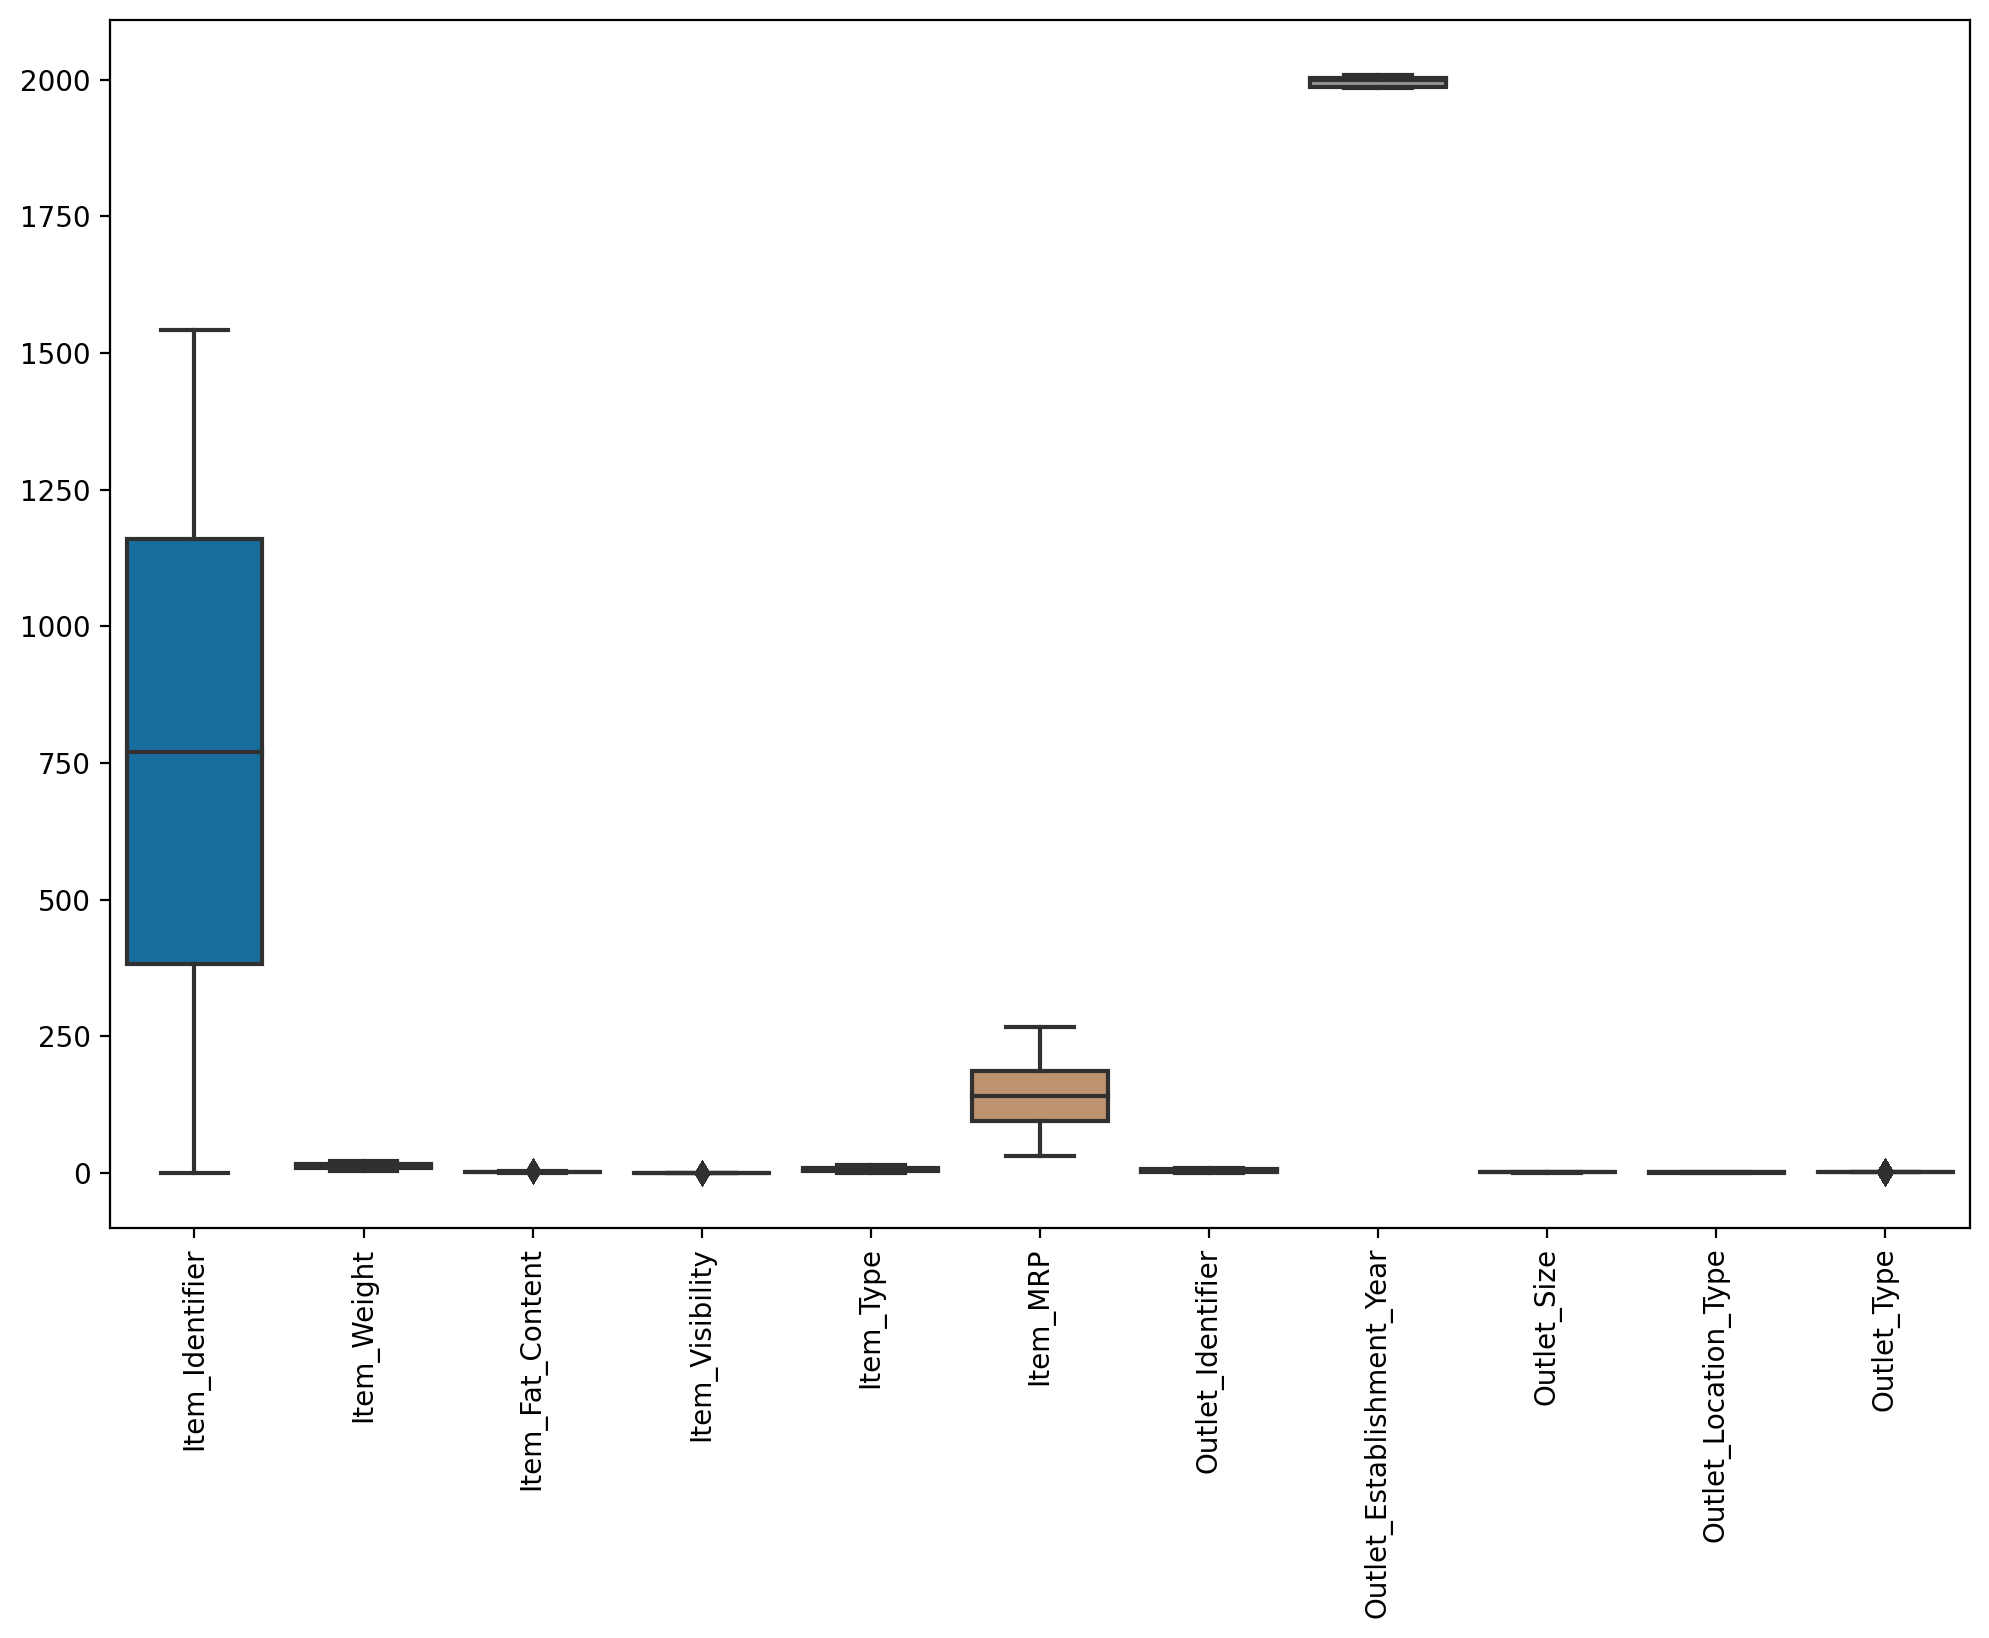

In [225]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(data=df_test,palette='colorblind')
plt.xticks(rotation=90);

In [226]:
#Outliers Removal:-ZSCORE METHOD
from scipy.stats import zscore
threshold=3
z=np.abs(zscore(df_test))
dfn_test=df_test[(z<3).all(axis=1)]
print(dfn_test.shape)
print(df_test.shape)

(5525, 11)
(5681, 11)


In [227]:
new_test_data=dfn_test
new_test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
5,461,9.800000,2,0.063817,6,117.1492,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1


In [228]:
new_test_data = new_test_data.reset_index(drop=True)

In [229]:
new_test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
2,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
3,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
4,461,9.800000,2,0.063817,6,117.1492,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5520,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5521,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5522,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1
5523,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1


SKEWNESS REMOVAL:-

In [230]:
new_test_data.skew()
test_skew = new_test_data.skew()

In [231]:
test_skew = test_skew.reset_index()
test_skew.rename(columns={'index':'column_names',0:'skewness'},inplace= True)
test_skew

,column_names,skewness
0,Item_Identifier,-0.004227
1,Item_Weight,0.139099
2,Item_Fat_Content,0.275609
3,Item_Visibility,0.786385
4,Item_Type,0.087677
5,Item_MRP,0.130290
6,Outlet_Identifier,-0.069567
7,Outlet_Establishment_Year,-0.413720
8,Outlet_Size,-0.080824
9,Outlet_Location_Type,-0.214502


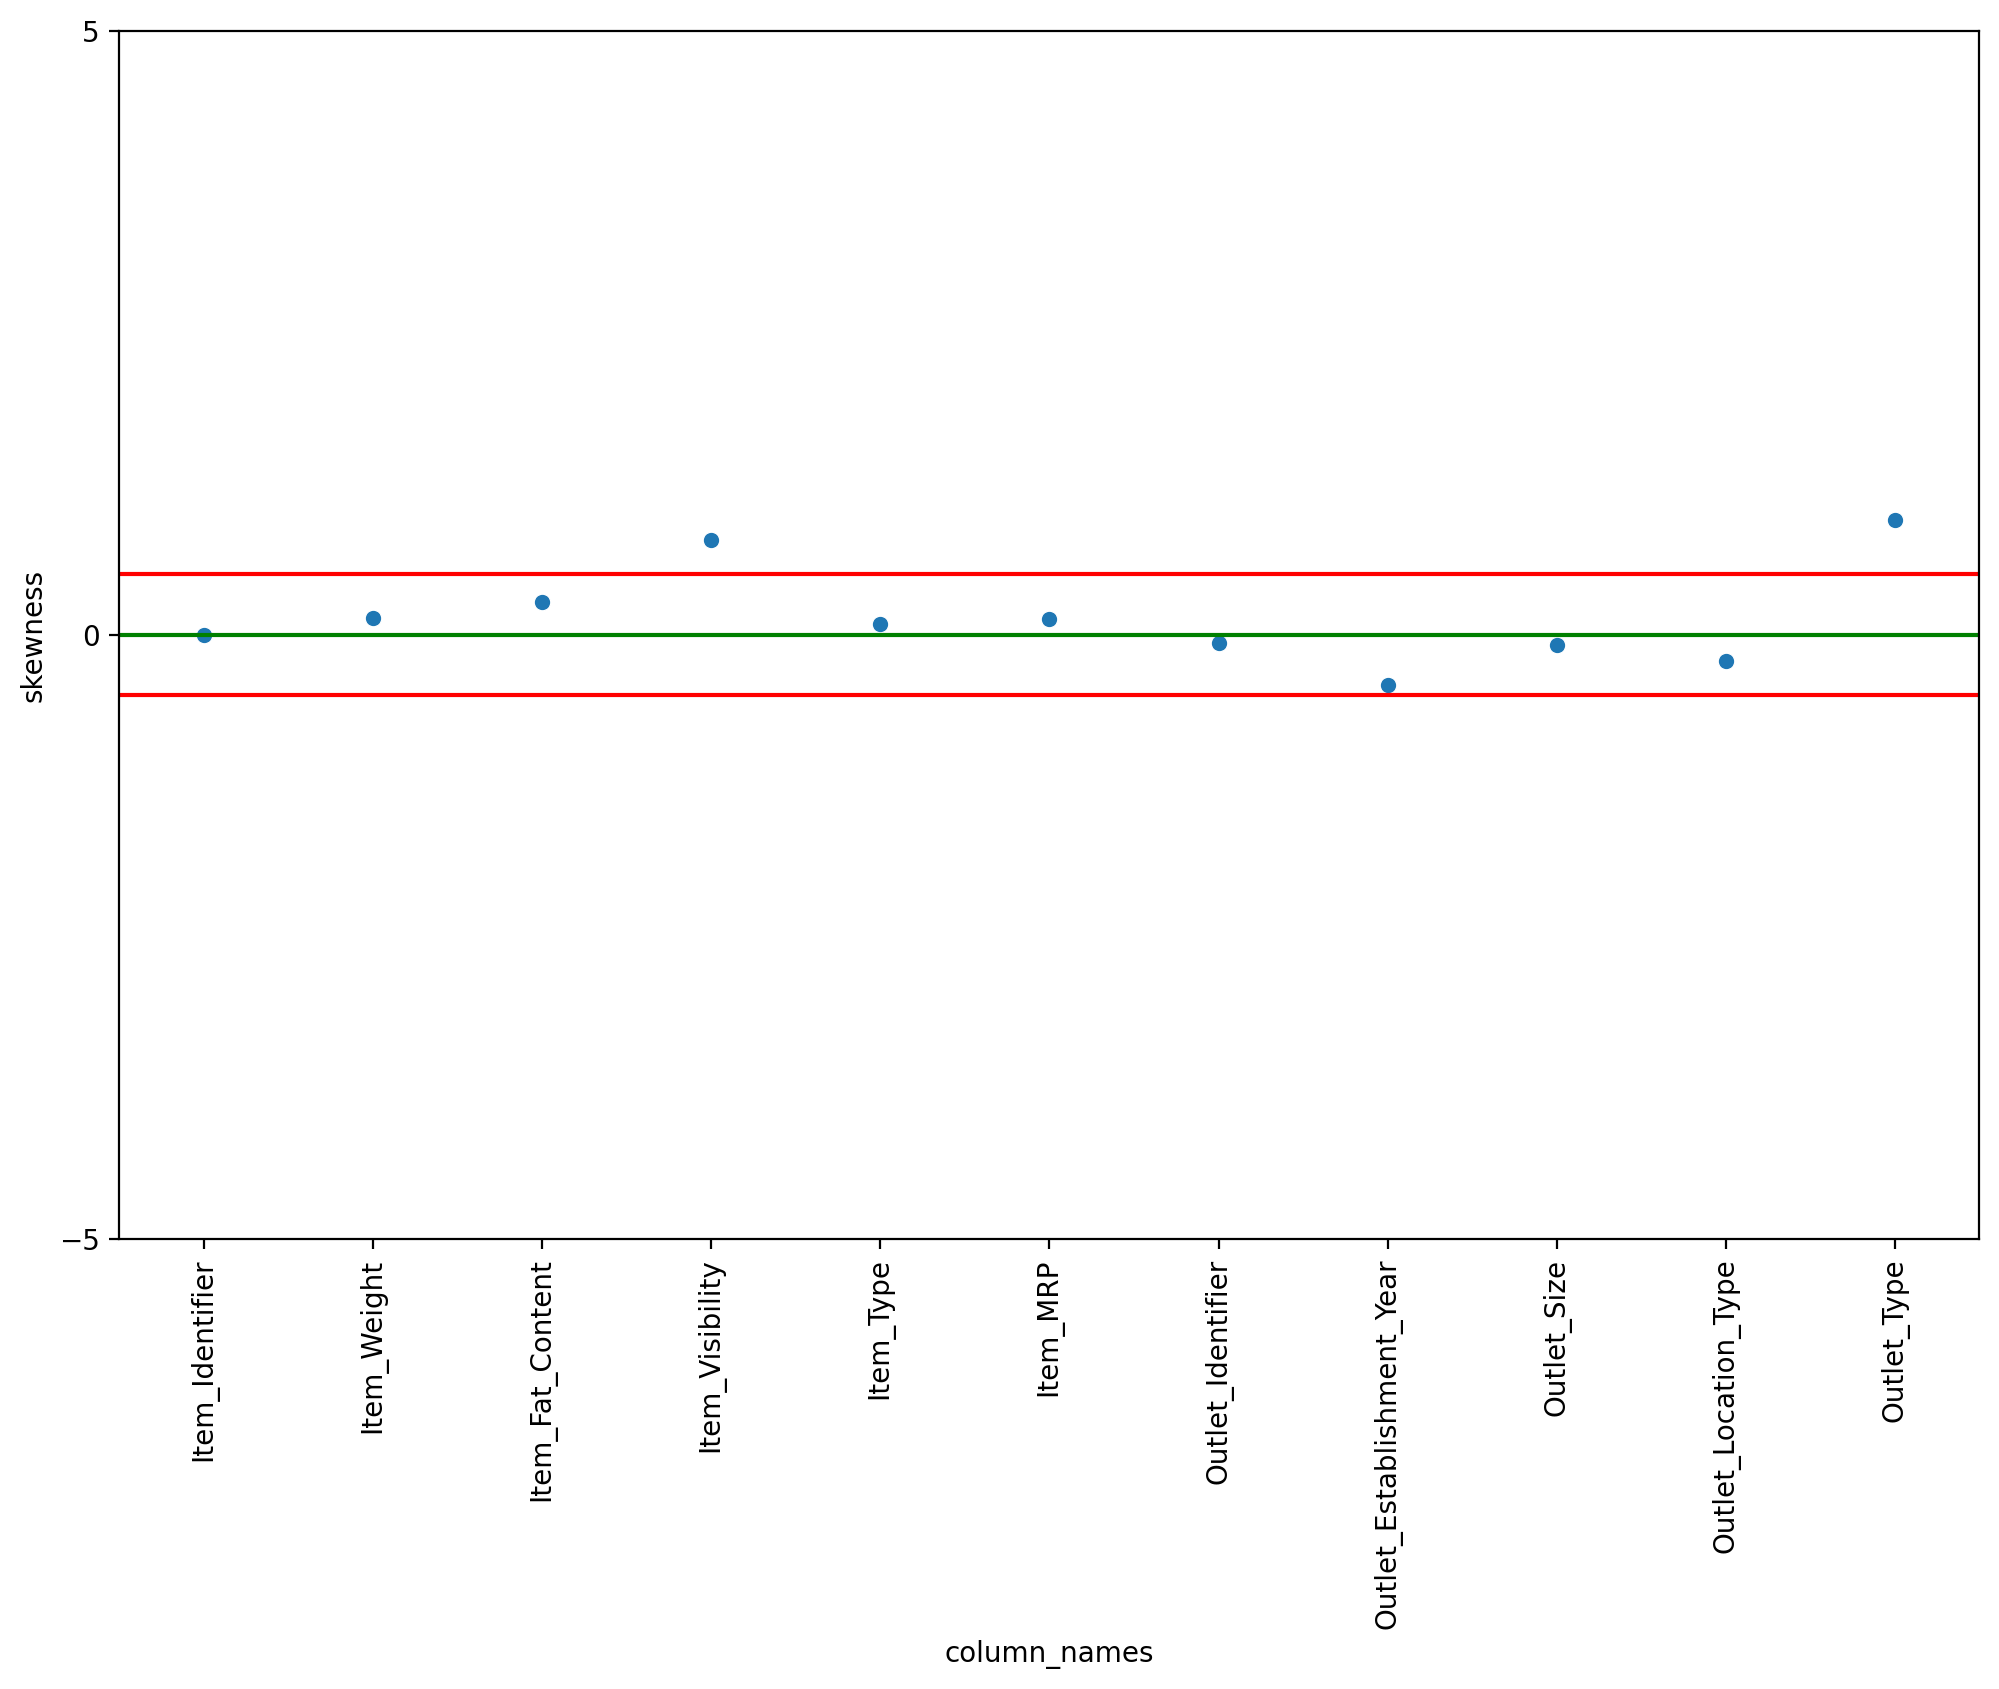

In [232]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=test_skew,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 10, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

In [233]:
new_test_data['Item_Visibility']=np.sqrt(new_test_data['Item_Visibility'])

In [234]:
skewness_for_test_after_adj = new_test_data.skew()
skewness_for_test_after_adj

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility             -0.285528
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                  0.949783
dtype: float64

In [235]:
skewness_for_test_after_adj=skewness_for_test_after_adj.reset_index()
skewness_for_test_after_adj

,index,0
0,Item_Identifier,-0.004227
1,Item_Weight,0.139099
2,Item_Fat_Content,0.275609
3,Item_Visibility,-0.285528
4,Item_Type,0.087677
5,Item_MRP,0.130290
6,Outlet_Identifier,-0.069567
7,Outlet_Establishment_Year,-0.413720
8,Outlet_Size,-0.080824
9,Outlet_Location_Type,-0.214502


In [236]:
skewness_for_test_after_adj.rename(columns={'index':'column_names',0:'skewness'},inplace= True)
skewness_for_test_after_adj

,column_names,skewness
0,Item_Identifier,-0.004227
1,Item_Weight,0.139099
2,Item_Fat_Content,0.275609
3,Item_Visibility,-0.285528
4,Item_Type,0.087677
5,Item_MRP,0.130290
6,Outlet_Identifier,-0.069567
7,Outlet_Establishment_Year,-0.413720
8,Outlet_Size,-0.080824
9,Outlet_Location_Type,-0.214502


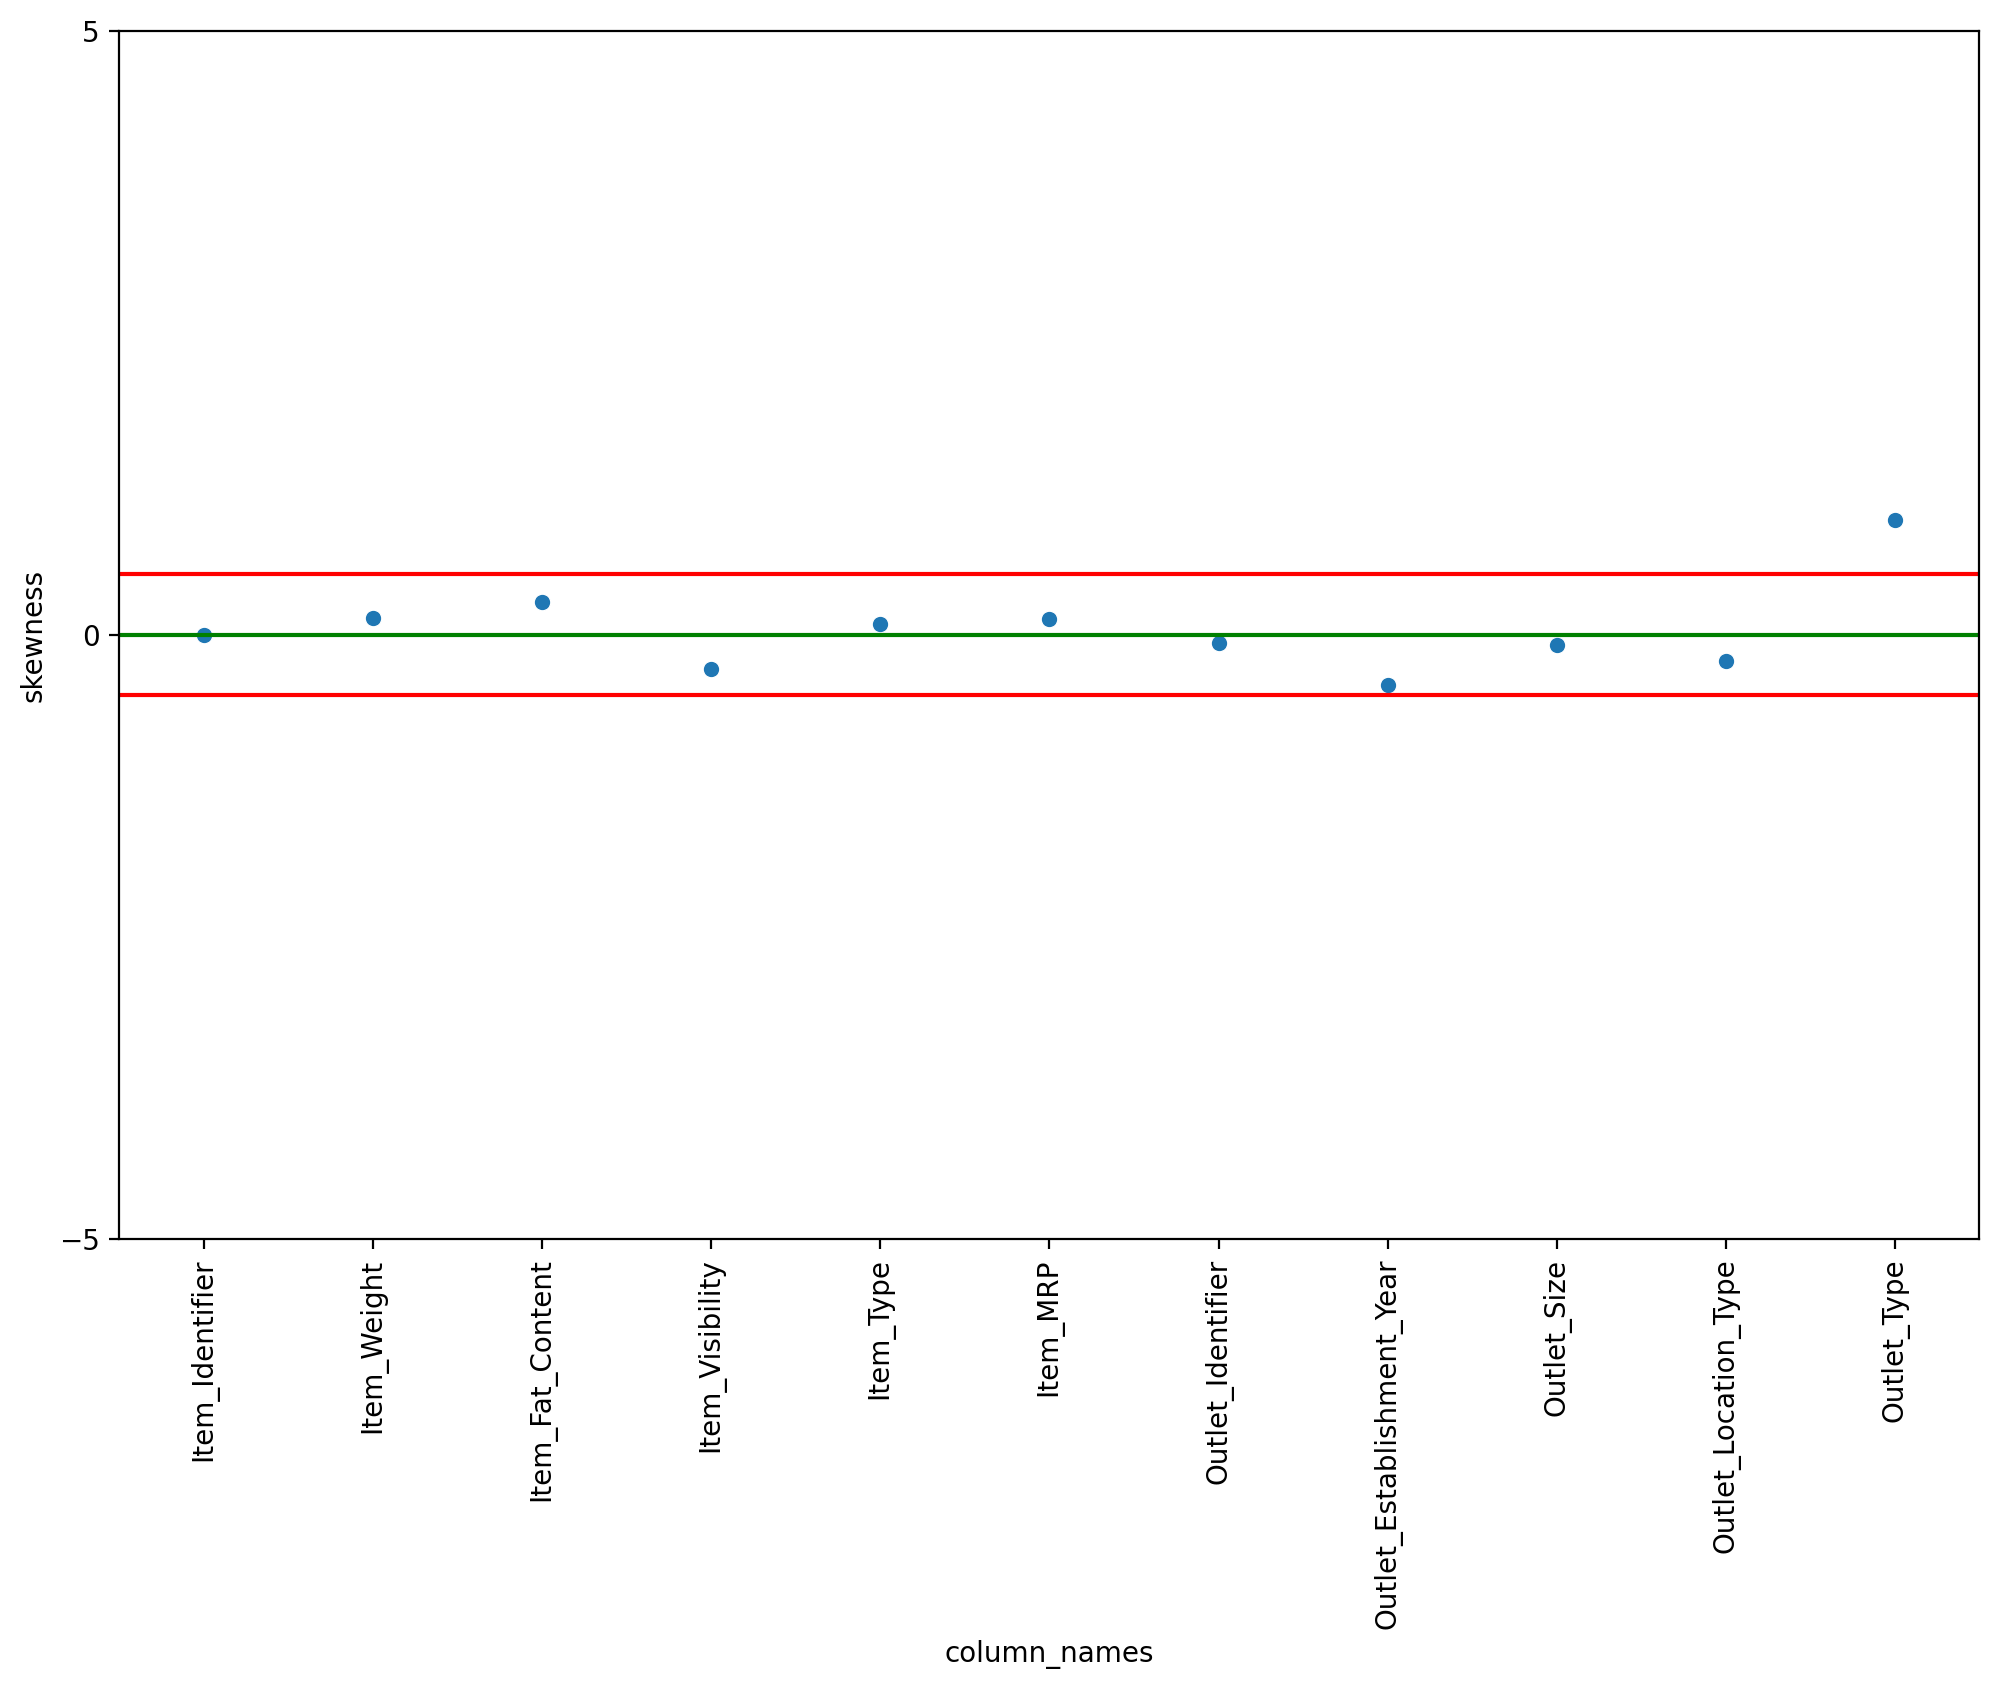

In [237]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skewness_for_test_after_adj,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 10, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

THE SKEWNESS FOR THE TEST DATASET HAS BEEN REMOVED FOR NUMERICAL COLUMNS BUT I SHOULD ADJUST SKEWNESS FOR THE CATEGORICAL COLUMNS.

### RETRAINING MODEL ON FULL DATA:-

In [238]:
light_gbm_regressor_final_model.fit(X,y)

LGBMRegressor(n_jobs=1, reg_alpha=0, reg_lambda=1.2)

## Deployment And Predictions And Saving the Model:--

In [239]:
y_hat = light_gbm_regressor_final_model.predict(X)
r2_score(y,y_hat)

0.7496507783137969

In [240]:
light_gbm_regressor_final_model.predict(new_test_data)

array([37.52085493, 23.19763461, 47.16836119, ..., 40.46540287,
       63.26772114, 36.57517805])

In [241]:
from joblib import dump,load

In [242]:
dump(light_gbm_regressor_final_model,'final_model_for_big_data_mart_sales.obj')

['final_model_for_big_data_mart_sales.obj']

In [243]:
loaded_model = load('final_model_for_big_data_mart_sales.obj')

In [244]:
loaded_model.predict(new_test_data)

array([37.52085493, 23.19763461, 47.16836119, ..., 40.46540287,
       63.26772114, 36.57517805])